# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

### Sentiment Analysis of Covid-19 tweets of Twitter users 😥😪😐🙂😃

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import math
import string

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, cross_validate
import pandas_profiling as pp
from wordcloud import WordCloud

import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold

In [2]:
pip install icecream

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [2]:
from icecream import ic
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import category_encoders as ce
from sklearn.model_selection import GridSearchCV
plt.style.use('bmh')
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier, Pool
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,classification_report,roc_curve,auc,f1_score,\
average_precision_score,accuracy_score,precision_score,recall_score,balanced_accuracy_score

from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\peddi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
#df=pd.read_csv('/content/drive/MyDrive/DataScience/Corona virus twitter analysis(Classification)/Coronavirus Tweets.csv',encoding='latin1')
#df.head()

In [3]:
import os
os.chdir('D:\Data science\Alma better\Corona Twitter sentiment analysis(Classification)')

In [4]:
df=pd.read_csv('Coronavirus Tweets.csv',encoding='latin1')
df.head()

UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral  
1  advice Talk to your neighbours family to excha...            Positive  
2  Coronavirus Australia: Woolworths to give elde...            Positive  
3  My food stock is not the only one which is emp...            Positive  
4  Me, ready to go at supermarket during the #COV...  Extremely Negative

In [5]:
df.shape

(41157, 6)

In [6]:
# Creating new dataframe for processing and original dataframe is stored for further reference 
tweet_df=df.copy()

## **Data Mining and Analysis**

In [7]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


### Missing value analysis
- There are two ways of dealing with missing values. They are either to drop it or impute them using statistical techniques like mean, median, mode or KNN Imputer or Random Imputation or using business knowledge
- Here are I'm imputing the missing values which are present in only Location variable using some domain knowledge like Location is not provided by the user so instead of introducing false values or misinterpretation I'm filling it as not provided.

In [8]:
tweet_df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [9]:
#percentage of missing values
(tweet_df.isnull().sum()/len(tweet_df))*100

UserName          0.000000
ScreenName        0.000000
Location         20.871298
TweetAt           0.000000
OriginalTweet     0.000000
Sentiment         0.000000
dtype: float64

In [9]:
tweet_df.shape

(41157, 6)

In [10]:
tweet_df.Location.value_counts()

London                          540
United States                   528
London, England                 520
New York, NY                    395
Washington, DC                  373
                               ... 
Jonesport, Me; Sea Cliff, NY      1
Mount Airy, MD                    1
Birmingham all my life            1
Damascus, OR                      1
Birmingham Ladywood               1
Name: Location, Length: 12220, dtype: int64

In [11]:
tweet_df.Location.unique()

array(['London', 'UK', 'Vagabonds', ..., 'Juba south sudan', 'OHIO',
       'i love you so much || he/him'], dtype=object)

In [12]:
len(tweet_df.Location.unique())

12221

In [13]:
tweet_df[(tweet_df['Location']=='i love you so much || he/him')]

UserName  ScreenName                      Location     TweetAt  \
41156     44955       89907  i love you so much || he/him  14-04-2020   

                                           OriginalTweet Sentiment  
41156  @TartiiCat Well new/used Rift S are going for ...  Negative

- The location of this data looks weird. The user has not revealed his/her location and have filled something else. Funny!!

In [14]:
tweet_df.replace(to_replace='i love you so much || he/him',value=np.nan,inplace=True)

In [15]:
tweet_df.iloc[41150:41159]

UserName  ScreenName                      Location     TweetAt  \
41150     44949       89901                          OHIO  14-04-2020   
41151     44950       89902                           NaN  14-04-2020   
41152     44951       89903  Wellington City, New Zealand  14-04-2020   
41153     44952       89904                           NaN  14-04-2020   
41154     44953       89905                           NaN  14-04-2020   
41155     44954       89906                           NaN  14-04-2020   
41156     44955       89907                           NaN  14-04-2020   

                                           OriginalTweet           Sentiment  
41150  I never that weÂd be in a situation &amp; wor...            Positive  
41151  @MrSilverScott you are definitely my man. I fe...  Extremely Positive  
41152  Airline pilots offering to stock supermarket s...             Neutral  
41153  Response to complaint not provided citing COVI...  Extremely Negative  
41154  You know itÂs getting tough when @KameronWild...            Positive  
41155  Is it wrong that the smell of hand sanitizer i...             Neutral  
41156  @TartiiCat Well new/used Rift S are going for ...            Negative

In [16]:
tweet_df.Location.fillna('Not disclosed/Not provided',inplace=True)

- There are missing values only in Location variable 
- The missing values in Location has been filled as not disclosed/not provided
- As location is missing instead of putting as nan or removing them we can keep as not provided so that other information can be used in making the prediction and also which avoid the loss of information problem

In [17]:
#tweet_df.dropna(inplace=True)

In [18]:
tweet_df.isnull().sum()

UserName         0
ScreenName       0
Location         0
TweetAt          0
OriginalTweet    0
Sentiment        0
dtype: int64

In [19]:
tweet_df.iloc[41150:41159]

UserName  ScreenName                      Location     TweetAt  \
41150     44949       89901                          OHIO  14-04-2020   
41151     44950       89902    Not disclosed/Not provided  14-04-2020   
41152     44951       89903  Wellington City, New Zealand  14-04-2020   
41153     44952       89904    Not disclosed/Not provided  14-04-2020   
41154     44953       89905    Not disclosed/Not provided  14-04-2020   
41155     44954       89906    Not disclosed/Not provided  14-04-2020   
41156     44955       89907    Not disclosed/Not provided  14-04-2020   

                                           OriginalTweet           Sentiment  
41150  I never that weÂd be in a situation &amp; wor...            Positive  
41151  @MrSilverScott you are definitely my man. I fe...  Extremely Positive  
41152  Airline pilots offering to stock supermarket s...             Neutral  
41153  Response to complaint not provided citing COVI...  Extremely Negative  
41154  You know itÂs getting tough when @KameronWild...            Positive  
41155  Is it wrong that the smell of hand sanitizer i...             Neutral  
41156  @TartiiCat Well new/used Rift S are going for ...            Negative

In [20]:
#tweet_df.reset_index(drop=True,inplace=True,)

In [21]:
tweet_df[(tweet_df['Location']=='Not disclosed/Not provided')]

UserName  ScreenName                    Location     TweetAt  \
3          3802       48754  Not disclosed/Not provided  16-03-2020   
4          3803       48755  Not disclosed/Not provided  16-03-2020   
14         3813       48765  Not disclosed/Not provided  16-03-2020   
22         3821       48773  Not disclosed/Not provided  16-03-2020   
23         3822       48774  Not disclosed/Not provided  16-03-2020   
...         ...         ...                         ...         ...   
41151     44950       89902  Not disclosed/Not provided  14-04-2020   
41153     44952       89904  Not disclosed/Not provided  14-04-2020   
41154     44953       89905  Not disclosed/Not provided  14-04-2020   
41155     44954       89906  Not disclosed/Not provided  14-04-2020   
41156     44955       89907  Not disclosed/Not provided  14-04-2020   

                                           OriginalTweet           Sentiment  
3      My food stock is not the only one which is emp...            Positive  
4      Me, ready to go at supermarket during the #COV...  Extremely Negative  
14     ADARA Releases COVID-19 Resource Center for Tr...            Positive  
22     We have AMAZING CHEAP DEALS! FOR THE #COVID201...  Extremely Positive  
23     We have AMAZING CHEAP DEALS! FOR THE #COVID201...  Extremely Positive  
...                                                  ...                 ...  
41151  @MrSilverScott you are definitely my man. I fe...  Extremely Positive  
41153  Response to complaint not provided citing COVI...  Extremely Negative  
41154  You know itÂs getting tough when @KameronWild...            Positive  
41155  Is it wrong that the smell of hand sanitizer i...             Neutral  
41156  @TartiiCat Well new/used Rift S are going for ...            Negative  

[8591 rows x 6 columns]

In [22]:
tweet_df.Sentiment.value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [23]:
tweet_df['TweetAt']=pd.to_datetime(tweet_df['TweetAt'],format='%Y%m%d',infer_datetime_format=True)

In [24]:
tweet_df.head(3)

UserName  ScreenName   Location    TweetAt  \
0      3799       48751     London 2020-03-16   
1      3800       48752         UK 2020-03-16   
2      3801       48753  Vagabonds 2020-03-16   

                                       OriginalTweet Sentiment  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...   Neutral  
1  advice Talk to your neighbours family to excha...  Positive  
2  Coronavirus Australia: Woolworths to give elde...  Positive

In [25]:
tweet_df.describe()

UserName    ScreenName
count  41157.000000  41157.000000
mean   24377.000000  69329.000000
std    11881.146851  11881.146851
min     3799.000000  48751.000000
25%    14088.000000  59040.000000
50%    24377.000000  69329.000000
75%    34666.000000  79618.000000
max    44955.000000  89907.000000

In [26]:
tweet_df.shape

(41157, 6)

In [27]:
tweet_df['Year']=tweet_df['TweetAt'].dt.year
tweet_df['Month']=tweet_df['TweetAt'].dt.month
tweet_df['Day']=tweet_df['TweetAt'].dt.day

In [28]:
tweet_df.head(3)

UserName  ScreenName   Location    TweetAt  \
0      3799       48751     London 2020-03-16   
1      3800       48752         UK 2020-03-16   
2      3801       48753  Vagabonds 2020-03-16   

                                       OriginalTweet Sentiment  Year  Month  \
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...   Neutral  2020      3   
1  advice Talk to your neighbours family to excha...  Positive  2020      3   
2  Coronavirus Australia: Woolworths to give elde...  Positive  2020      3   

   Day  
0   16  
1   16  
2   16

In [29]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   UserName       41157 non-null  int64         
 1   ScreenName     41157 non-null  int64         
 2   Location       41157 non-null  object        
 3   TweetAt        41157 non-null  datetime64[ns]
 4   OriginalTweet  41157 non-null  object        
 5   Sentiment      41157 non-null  object        
 6   Year           41157 non-null  int64         
 7   Month          41157 non-null  int64         
 8   Day            41157 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 2.8+ MB


In [30]:
ic(tweet_df.Year.unique())
ic(tweet_df.Month.unique());

ic| tweet_df.Year.unique(): array([2020], dtype=int64)
ic| tweet_df.Month.unique(): array([ 3,  1,  2,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)


In [31]:
tweet_df['length']=tweet_df['OriginalTweet'].apply(len)
tweet_df.head(3)

UserName  ScreenName   Location    TweetAt  \
0      3799       48751     London 2020-03-16   
1      3800       48752         UK 2020-03-16   
2      3801       48753  Vagabonds 2020-03-16   

                                       OriginalTweet Sentiment  Year  Month  \
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...   Neutral  2020      3   
1  advice Talk to your neighbours family to excha...  Positive  2020      3   
2  Coronavirus Australia: Woolworths to give elde...  Positive  2020      3   

   Day  length  
0   16     111  
1   16     237  
2   16     131

In [32]:
# preprocessing for working on text data
def text_process(msg):
    nopunc =[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [33]:
tweet_df['cleaned_tweet']=tweet_df['OriginalTweet'].apply(text_process)

In [34]:
tweet_df.head(3)

UserName  ScreenName   Location    TweetAt  \
0      3799       48751     London 2020-03-16   
1      3800       48752         UK 2020-03-16   
2      3801       48753  Vagabonds 2020-03-16   

                                       OriginalTweet Sentiment  Year  Month  \
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...   Neutral  2020      3   
1  advice Talk to your neighbours family to excha...  Positive  2020      3   
2  Coronavirus Australia: Woolworths to give elde...  Positive  2020      3   

   Day  length                                      cleaned_tweet  
0   16     111  MeNyrbie PhilGahan Chrisitv httpstcoiFz9FAn2Pa...  
1   16     237  advice Talk neighbours family exchange phone n...  
2   16     131  Coronavirus Australia Woolworths give elderly ...

In [35]:
tweet_df.drop('OriginalTweet',axis=1,inplace=True)

In [36]:
vectorizer=TfidfVectorizer(max_df=0.95,min_df=0.0007,)
X_tweet_vector=vectorizer.fit_transform(tweet_df['cleaned_tweet'])

In Tfidf vectorizer,
- occurred in too many documents is (max_df)

- occurred in too few documents is (min_df)

- were cut off by feature selection is (max_features).


In [37]:
X_tweet_vector

<41157x3266 sparse matrix of type '<class 'numpy.float64'>'
	with 568730 stored elements in Compressed Sparse Row format>

In [38]:
X_tweet_vector.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
X_tweet_vector.toarray()[3456]

array([0., 0., 0., ..., 0., 0., 0.])

In [40]:
X_tweet_vector.toarray().shape

(41157, 3266)

In [41]:
ic(X_tweet_vector);

ic| X_tweet_vector: <41157x3266 sparse matrix of type '<class 'numpy.float64'>'
                    	with 568730 stored elements in Compressed Sparse Row format>


In [42]:
ic(vectorizer.get_feature_names());

ic| vectorizer.get_feature_names(): ['000',
                                     '10',
                                     '100',
                                     '1000',
                                     '100000',
                                     '10downingstreet',
                                     '11',
                                     '12',
                                     '13',
                                     '14',
                                     '15',
                                     '150',
                                     '16',
                                     '17',
                                     '18',
                                     '19',
                                     '1st',
                                     '20',
                                     '200',
                                     '2000',
                                     '2008',
                                     '2018',
                        

                                     'body',
                                     'bog',
                                     'bonus',
                                     'book',
                                     'booked',
                                     'books',
                                     'boom',
                                     'booming',
                                     'boost',
                                     'border',
                                     'borders',
                                     'bored',
                                     'boris',
                                     'borisjohnson',
                                     'boss',
                                     'bottle',
                                     'bottles',
                                     'bottom',
                                     'bought',
                                     'box',
                                     'boxes',
                        

                                     'coughed',
                                     'coughing',
                                     'coughs',
                                     'could',
                                     'couldnt',
                                     'couldnâ',
                                     'council',
                                     'count',
                                     'counter',
                                     'countries',
                                     'country',
                                     'county',
                                     'couple',
                                     'course',
                                     'cover',
                                     'coverage',
                                     'covered',
                                     'covering',
                                     'covid',
                                     'covid19',
                                     'covid19au

                                     'evidence',
                                     'evolving',
                                     'exactly',
                                     'example',
                                     'examples',
                                     'excellent',
                                     'except',
                                     'excessive',
                                     'exchange',
                                     'excited',
                                     'exclusive',
                                     'excuse',
                                     'executive',
                                     'executives',
                                     'exercise',
                                     'existing',
                                     'exorbitant',
                                     'expect',
                                     'expectations',
                                     'expected',
                 

                                     'hell',
                                     'hello',
                                     'help',
                                     'helped',
                                     'helpful',
                                     'helping',
                                     'helps',
                                     'heres',
                                     'hereâ',
                                     'hero',
                                     'heroes',
                                     'hes',
                                     'hey',
                                     'heâ',
                                     'hi',
                                     'high',
                                     'higher',
                                     'highest',
                                     'highlight',
                                     'highlights',
                                     'highly',
                            

                                     'looked',
                                     'looking',
                                     'looks',
                                     'los',
                                     'lose',
                                     'losing',
                                     'loss',
                                     'losses',
                                     'lost',
                                     'lot',
                                     'lots',
                                     'love',
                                     'loved',
                                     'lovely',
                                     'low',
                                     'lower',
                                     'lowered',
                                     'lowering',
                                     'lowest',
                                     'lows',
                                     'luck',
                                   

                                     'past',
                                     'pasta',
                                     'patient',
                                     'patients',
                                     'patterns',
                                     'pay',
                                     'paying',
                                     'payment',
                                     'payments',
                                     'peak',
                                     'pennsylvania',
                                     'people',
                                     'peoples',
                                     'peopleâ',
                                     'per',
                                     'percent',
                                     'perfect',
                                     'perhaps',
                                     'period',
                                     'permanent',
                                     'person',
  

                                     'shipping',
                                     'shit',
                                     'shock',
                                     'shocked',
                                     'shocking',
                                     'shoes',
                                     'shop',
                                     'shoplocal',
                                     'shopper',
                                     'shoppers',
                                     'shopping',
                                     'shops',
                                     'short',
                                     'shortage',
                                     'shortages',
                                     'shot',
                                     'shouldnt',
                                     'shout',
                                     'show',
                                     'showing',
                                     'shown',
      

                                     'thru',
                                     'thursday',
                                     'ticket',
                                     'tickets',
                                     'till',
                                     'time',
                                     'times',
                                     'tinned',
                                     'tip',
                                     'tips',
                                     'tired',
                                     'tissue',
                                     'today',
                                     'todays',
                                     'todayâ',
                                     'together',
                                     'toilet',
                                     'toiletpaper',
                                     'toiletpaperapocalypse',
                                     'toiletpaperchallenge',
                                   

In [43]:
ic(tweet_df['length'][2345]);

In [44]:
ic(vectorizer.inverse_transform(X_tweet_vector[2345]));

In [45]:
ic(X_tweet_vector.shape);

In [46]:
ic(X_tweet_vector[1].toarray());

In [47]:
ic(tweet_df['cleaned_tweet'][2345]);

- The above example tells how the Tfidf vectorizer has done feature importance on the given sentence or tweet made by the users
- Tweet : ('Really hoping Google Apple Microsoft Facebook step help us fight COVID19 '
'sitting top much consumer data warn time someone practicing social '
'distancing Eg Maps warn users navigate barnight club')
- The tfidf vectorizer transformation : [array(['warn', 'navigate', 'eg', 'practicing', 'data', 'sitting', 'apple',
'google', 'step', 'club', 'hoping', 'much', 'really','facebook','distancing', 'social','someone','top','us','consumer','help','fight', 'time', 'covid19'], dtype='<U21')]

In [48]:
X_tweet_vector.toarray().shape

In [49]:
tweet_df.head()

In [50]:
# Defining independent and dependent variable for modelling
ind_vars=tweet_df.drop(columns=['UserName','ScreenName','TweetAt','Year','Month','Day','Sentiment'],axis=1)
dep_var=tweet_df['Sentiment']

In [51]:
ind_vars.shape

In [52]:
ind_vars.head(2)

In [53]:
dep_var

In [54]:
dep_var.shape

In [55]:
len(tweet_df.Location.value_counts())

In [56]:
tweet_df.describe()

In [57]:
pp.ProfileReport(tweet_df)

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Data Visualization

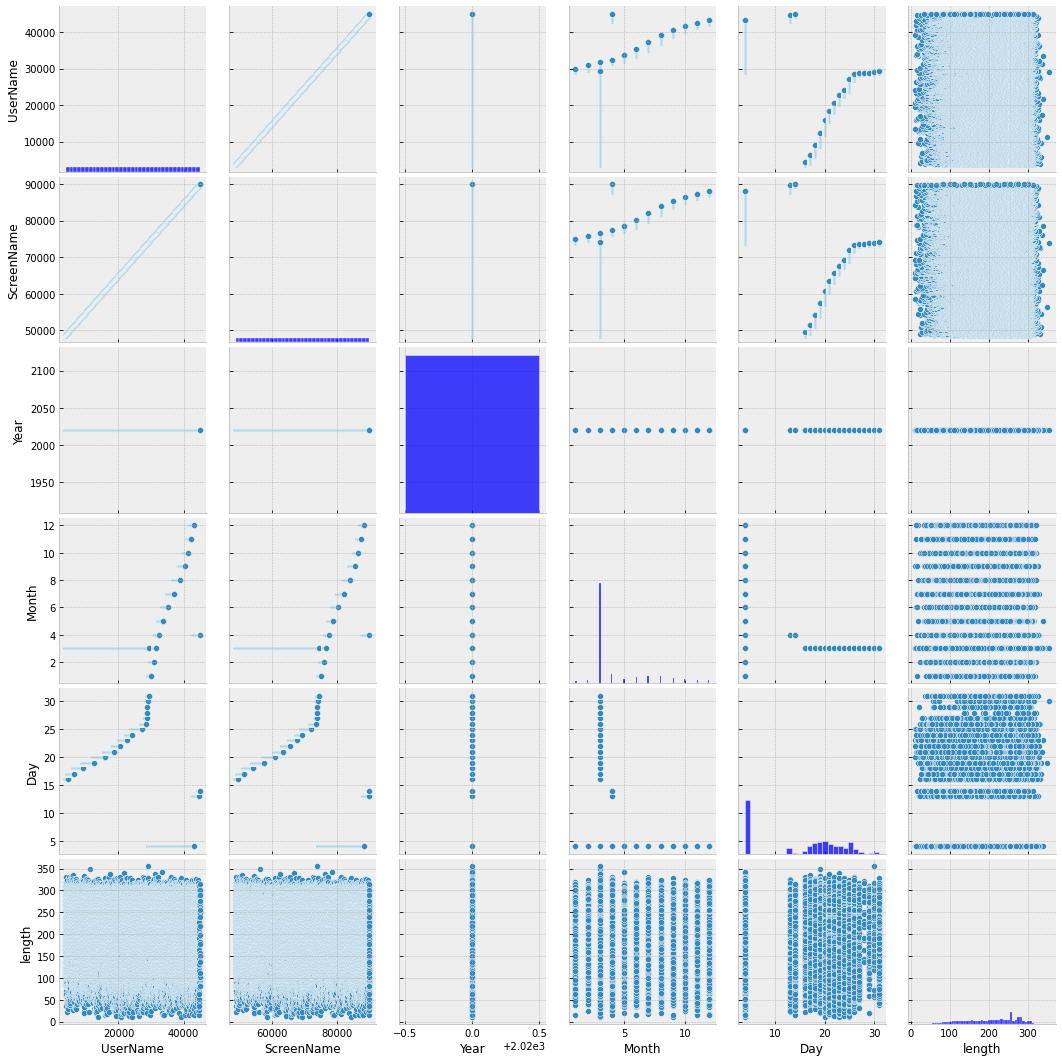

In [75]:
sns.pairplot(tweet_df)

<AxesSubplot:xlabel='Sentiment', ylabel='length'>

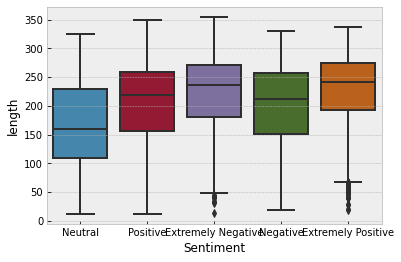

In [76]:
sns.boxplot(y='length',x='Sentiment',data=tweet_df)

- From the target variable Sentiment vs the length of the tweet, it can be said that the length of tweet is from 10-360 and the sentiment for the tweets and the corresponding length of the tweets and it range can be known from it.
- For ex, if Neutral tweets are taken the range of length of that tweets is less than thge extremley negative tweets in which users are writing less for nuetral comments whereas extremely negative comments length are more atleast we can see the range by which it is possible to put this. Then in neutral comments the length of the tweet are mostly from 100-240 and few crossing the Q1 and Q3 still are inliers(0-105,235-325) and there are no outliers in this plot.
- There are outliers in Extremely negative and extremely positive sentiment comments and not in any other sentiment comments.

<AxesSubplot:xlabel='length', ylabel='Sentiment'>

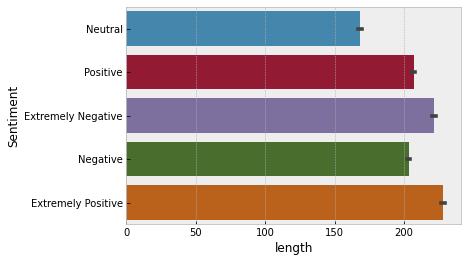

In [77]:
sns.barplot(x='length',y='Sentiment',data=tweet_df)

- The distribution of different sentiment tweets or distribution of target classes can be seen from the above plot. 
- It can be clearly seen that there are multiple classes in the target data and unevely distributed saying it is an imbalanced multi-class problem.
- There are more extremely positive comments and there are least neutral comments. Also extremely negative comments are approximately same as extremely positive tweets with slightest difference and same with negative and positive tweets.

<AxesSubplot:ylabel='Frequency'>

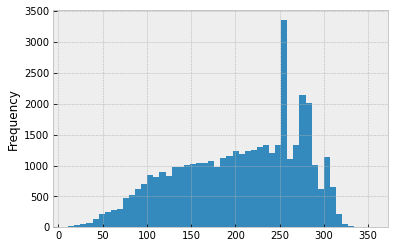

In [78]:
tweet_df['length'].plot(bins=50,kind='hist')

- From the histogram of length of tweets in the data, it can be seen that there are more tweets of length 250-255 and then from 260-275. Also it can said that this follows left tail distribution.

<AxesSubplot:xlabel='Sentiment', ylabel='TweetAt'>

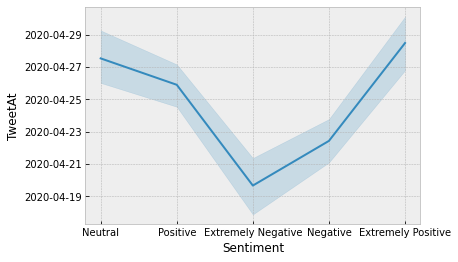

In [79]:
sns.lineplot(y='TweetAt',x='Sentiment',data=tweet_df,)

- From the lineplot we can see the time of tweets which are in the same year, month then the difference in the days. Also the tweets sentiment on the respective days.

<AxesSubplot:xlabel='Month', ylabel='count'>

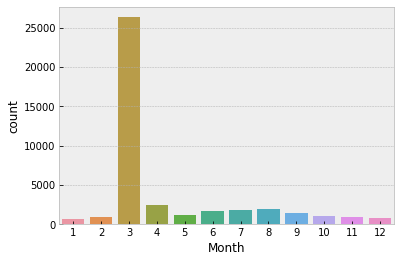

In [83]:
sns.countplot(x='Month',data=tweet_df)

- There are more tweets in the month of March than on any other month may due to the newly aroused covid crisis and when user’s situations have turned bad unexpectedly.

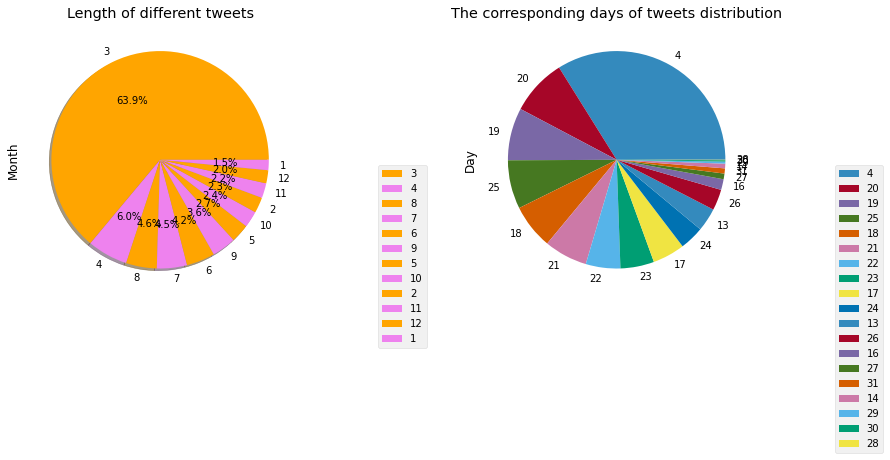

In [226]:
plt.subplot(1,2,1)
k=tweet_df['Month'].value_counts(sort=True);
colors = ["orange","violet"]
#explode = (0.2,0)
k.plot(kind='pie',figsize=(15,5),legend=True,colors=colors,autopct='%1.1f%%', shadow=True, startangle=0,);
plt.title('Length of different tweets')
plt.legend(loc=0,bbox_to_anchor=(1.5,0.5));
plt.subplot(1,2,2);
plt.title('The corresponding days of tweets distribution')
k=tweet_df['Day'].value_counts();
k.plot(kind='pie',figsize=(15,5),legend=True);
plt.legend(loc=0,bbox_to_anchor=(1.5,0.5));

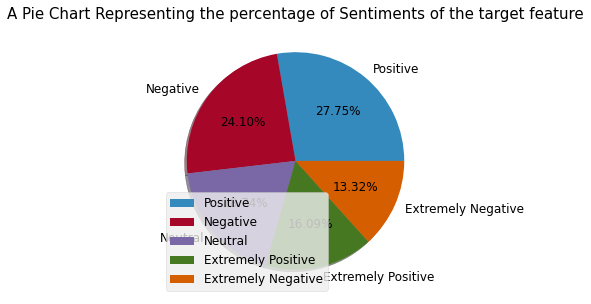

In [89]:
counts = list(tweet_df['Sentiment'].value_counts())
labels = 'Positive', 'Negative','Neutral','Extremely Positive','Extremely Negative'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (10,5)
plt.pie(counts, labels=labels, shadow=True, autopct="%.2f%%")
plt.title('A Pie Chart Representing the percentage of Sentiments of the target feature', fontsize=15)
plt.axis()
plt.legend(loc='lower left')
plt.show()

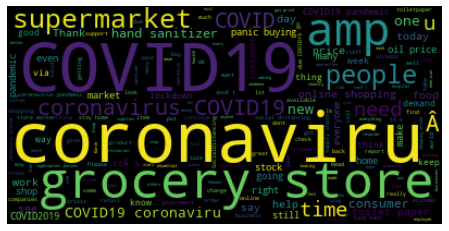

In [241]:
text = " ".join(review for review in tweet_df['cleaned_tweet'])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.figure(figsize=(8,4))
plt.imshow(wordcloud, interpolation='bilinear',cmap='gist_rainbow',)
plt.axis("off")
plt.show()

- The important terms from tweets which are used multiple times by different users are Coronavirus,Covid19,grocery store,amp,people,time,panic buying,hand sanitizer, work, market, price, thing, one, right, stock, going, work ..etc.
- There are different sentiments involved in this tweets eventhough the words are almost the same and people yelling on the pandemic and about provisions provided due to this hard situations. So there are a mix of extremely negative to extremely positive tweets happened mostly in the month of March.

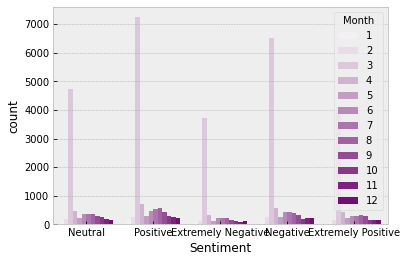

In [244]:
sns.countplot(x='Sentiment',hue='Month',data=tweet_df,color='purple');

- From the above it can be seen the different sentiment tweets and the month of tweets with their corresponding counts.
- It can be observed that most of the tweet are made in the first of the year and also mostly in the first quarter.

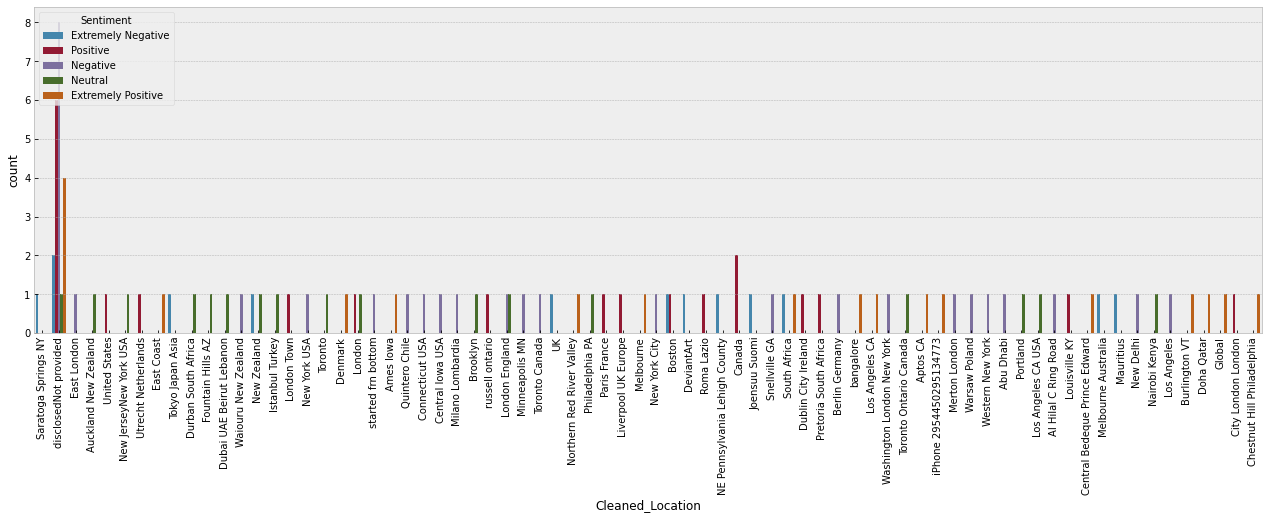

In [263]:
plt.figure(figsize=(22,6))
sns.countplot(x='Cleaned_Location',hue='Sentiment',data=ind_vars1.sample(n=100));
plt.xticks(rotation='vertical');

- I have plot this with sample data from the population in which it can be observed that the count of different Location tweets.
- There are many users who have not disclosed the location and after that Twitter users from Canada are the hightest with positive sentiment(red color) tweets.

<AxesSubplot:>

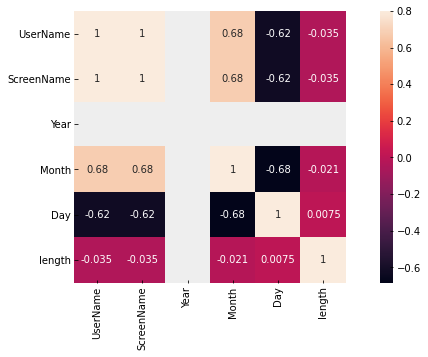

In [74]:
corr=tweet_df.corr()
f, ax = plt.subplots(figsize=(12, 5))
sns.heatmap(corr, vmax=.8, square=True,annot = True)

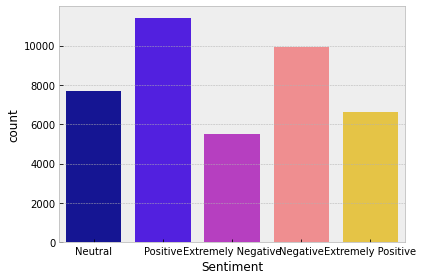

In [16]:
sns.countplot(tweet_df['Sentiment'],palette='gnuplot2');
plt.tight_layout();

- From the above plot imbalance in the dataset can be easily observed.
- There are more Positive Sentiment classes in the dataset
- There are less Extremely Negative Sentiment tweets in the given dataset.

### Feature Engineering and Feature Selection

In [58]:
#Creating cat model dataframe and features
cat_df=tweet_df.copy()

In [59]:
cat_df1=cat_df.copy()

In [60]:
cat_df.head()

UserName  ScreenName                    Location    TweetAt  \
0      3799       48751                      London 2020-03-16   
1      3800       48752                          UK 2020-03-16   
2      3801       48753                   Vagabonds 2020-03-16   
3      3802       48754  Not disclosed/Not provided 2020-03-16   
4      3803       48755  Not disclosed/Not provided 2020-03-16   

            Sentiment  Year  Month  Day  length  \
0             Neutral  2020      3   16     111   
1            Positive  2020      3   16     237   
2            Positive  2020      3   16     131   
3            Positive  2020      3   16     306   
4  Extremely Negative  2020      3   16     310   

                                       cleaned_tweet  
0  MeNyrbie PhilGahan Chrisitv httpstcoiFz9FAn2Pa...  
1  advice Talk neighbours family exchange phone n...  
2  Coronavirus Australia Woolworths give elderly ...  
3  food stock one empty PLEASE dont panic ENOUGH ...  
4  ready go supermarket COVID19 outbreak Im paran...

In [61]:
cat_df.drop(columns=['UserName','ScreenName','TweetAt','Day'],inplace=True)

In [62]:
cat_df.tail()

Location           Sentiment  Year  Month  length  \
41152  Wellington City, New Zealand             Neutral  2020      4     102   
41153    Not disclosed/Not provided  Extremely Negative  2020      4     138   
41154    Not disclosed/Not provided            Positive  2020      4     136   
41155    Not disclosed/Not provided             Neutral  2020      4     111   
41156    Not disclosed/Not provided            Negative  2020      4     255   

                                           cleaned_tweet  
41152  Airline pilots offering stock supermarket shel...  
41153  Response complaint provided citing COVID19 rel...  
41154  know itÂs getting tough KameronWilds rationin...  
41155  wrong smell hand sanitizer starting turn coron...  
41156  TartiiCat Well newused Rift going 70000 Amazon...

In [63]:
cat_df['Sentiment']=cat_df.Sentiment.map({'Positive':3,'Negative':1,'Neutral':2,'Extremely Positive':4,'Extremely Negative':0})

In [64]:
cat_df.tail()

Location  Sentiment  Year  Month  length  \
41152  Wellington City, New Zealand          2  2020      4     102   
41153    Not disclosed/Not provided          0  2020      4     138   
41154    Not disclosed/Not provided          3  2020      4     136   
41155    Not disclosed/Not provided          2  2020      4     111   
41156    Not disclosed/Not provided          1  2020      4     255   

                                           cleaned_tweet  
41152  Airline pilots offering stock supermarket shel...  
41153  Response complaint provided citing COVID19 rel...  
41154  know itÂs getting tough KameronWilds rationin...  
41155  wrong smell hand sanitizer starting turn coron...  
41156  TartiiCat Well newused Rift going 70000 Amazon...

In [65]:
cat_feat=['Location','Year','Month']
text_feat=['cleaned_tweet']

In [66]:
cat_x_train,cat_x_test,cat_y_train,cat_y_test=train_test_split(cat_df.drop(columns=['Sentiment'],axis=1),cat_df['Sentiment'],test_size=0.3,random_state=24,stratify=cat_df['Sentiment'])
print(cat_x_train.shape,cat_x_test.shape,cat_y_train.shape,cat_y_test.shape)

(28809, 5) (12348, 5) (28809,) (12348,)


In [67]:
cat_df_train=Pool(cat_x_train,cat_y_train,cat_features=cat_feat,text_features=text_feat,\
                  feature_names=list(cat_df.drop(columns=['Sentiment'],axis=1).columns))
cat_df_test=Pool(cat_x_test,cat_y_test,cat_features=cat_feat,text_features=text_feat,\
                  feature_names=list(cat_df.drop(columns=['Sentiment'],axis=1).columns))

In [68]:
ind_vars.head(4)

Location  length  \
0                      London     111   
1                          UK     237   
2                   Vagabonds     131   
3  Not disclosed/Not provided     306   

                                       cleaned_tweet  
0  MeNyrbie PhilGahan Chrisitv httpstcoiFz9FAn2Pa...  
1  advice Talk neighbours family exchange phone n...  
2  Coronavirus Australia Woolworths give elderly ...  
3  food stock one empty PLEASE dont panic ENOUGH ...

In [69]:
dep_var.value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [70]:
ind_vars['Cleaned_Location']=ind_vars['Location'].apply(text_process)

In [98]:
ind_vars.head()

Location  length  \
0                      London     111   
1                          UK     237   
2                   Vagabonds     131   
3  Not disclosed/Not provided     306   
4  Not disclosed/Not provided     310   

                                       cleaned_tweet       Cleaned_Location  
0  MeNyrbie PhilGahan Chrisitv httpstcoiFz9FAn2Pa...                 London  
1  advice Talk neighbours family exchange phone n...                     UK  
2  Coronavirus Australia Woolworths give elderly ...              Vagabonds  
3  food stock one empty PLEASE dont panic ENOUGH ...  disclosedNot provided  
4  ready go supermarket COVID19 outbreak Im paran...  disclosedNot provided

In [99]:
ind_vars.drop('Location',axis=1,inplace=True)

In [100]:
ind_vars1=ind_vars.copy()

In [101]:
ind_vars1['Sentiment']=dep_var

In [102]:
ind_vars1['Day']=tweet_df['Day']

In [103]:
ind_vars1.head()

length                                      cleaned_tweet  \
0     111  MeNyrbie PhilGahan Chrisitv httpstcoiFz9FAn2Pa...   
1     237  advice Talk neighbours family exchange phone n...   
2     131  Coronavirus Australia Woolworths give elderly ...   
3     306  food stock one empty PLEASE dont panic ENOUGH ...   
4     310  ready go supermarket COVID19 outbreak Im paran...   

        Cleaned_Location           Sentiment  Day  
0                 London             Neutral   16  
1                     UK            Positive   16  
2              Vagabonds            Positive   16  
3  disclosedNot provided            Positive   16  
4  disclosedNot provided  Extremely Negative   16

#### Encoding the categorical variables
- There are different types of encoding which can be done to the data. They are Label Encoding or Ordinal Encoding,One hot Encoding,Dummy Encoding,Effect Encoding,Binary Encoding,BaseN Encoding,Hash Encoding and Target Encoding etc.
- Here I am demonstrating both One hot encoding and Hash encoding
- As One hot ecoding is giving almost 10000 columns having high cardinality so I'm taking Hash encoding values for further processing.
 

In [104]:
loc_encode=pd.get_dummies(data=ind_vars['Cleaned_Location'],drop_first=True)
#loc_encode_test=pd.get_dummies(data=tweetx_test['Location'],drop_first=True)

In [105]:
loc_encode

0 BirdBrain LnNowheresville  0118 9690 839  01568 610 016  0886x  \
0                                0              0              0      0   
1                                0              0              0      0   
2                                0              0              0      0   
3                                0              0              0      0   
4                                0              0              0      0   
...                            ...            ...            ...    ...   
41152                            0              0              0      0   
41153                            0              0              0      0   
41154                            0              0              0      0   
41155                            0              0              0      0   
41156                            0              0              0      0   

       0x1337C4F3  0x514  1 AU  1 AU far away sun  1 Au Solis  \
0               0      0     0                  0           0   
1               0      0     0                  0           0   
2               0      0     0                  0           0   
3               0      0     0                  0           0   
4               0      0     0                  0           0   
...           ...    ...   ...                ...         ...   
41152           0      0     0                  0           0   
41153           0      0     0                  0           0   
41154           0      0     0                  0           0   
41155           0      0     0                  0           0   
41156           0      0     0                  0           0   

       1 King St W Toronto  ...  ÃT 51560275000859  ÃT 5156353008759  \
0                        0  ...                   0                  0   
1                        0  ...                   0                  0   
2                        0  ...                   0                  0   
3                        0  ...                   0                  0   
4                        0  ...                   0                  0   
...                    ...  ...                 ...                ...   
41152                    0  ...                   0                  0   
41153                    0  ...                   0                  0   
41154                    0  ...                   0                  0   
41155                    0  ...                   0                  0   
41156                    0  ...                   0                  0   

       ÃT 538398560436773  ÃT 549754551595362  ÃT 591940817620422  \
0                        0                    0                    0   
1                        0                    0                    0   
2                        0                    0                    0   
3                        0                    0                    0   
4                        0                    0                    0   
...                    ...                  ...                  ...   
41152                    0                    0                    0   
41153                    0                    0                    0   
41154                    0                    0                    0   
41155                    0                    0                    0   
41156                    0                    0                    0   

       ÃT 6167606106828639  ÃT 6202795106828593  Ã  Ã­ Ã­ Ã­  Ã¯  
0                         0                     0   0         0   0  
1                         0                     0   0         0   0  
2                         0                     0   0         0   0  
3                         0                     0   0         0   0  
4                         0                     0   0         0   0  
...                     ...                   ...  ..       ...  ..  
41152                     0                     0   0         0   0  
41153      

In [106]:
#Create object for hash encoder
encoder=ce.HashingEncoder(cols='Cleaned_Location',n_components=100,).fit(ind_vars['Cleaned_Location'],dep_var)
#Fit and Transform Data
loc_encoder=encoder.fit_transform(X=ind_vars,y=dep_var,)
#loc_test_encoder=encoder.fit_transform(X=tweetx_test['Location'],y=tweety_test)

In [107]:
loc_encoder.head(4)

col_0  col_1  col_2  col_3  col_4  col_5  col_6  col_7  col_8  col_9  ...  \
0      0      0      0      0      0      0      0      0      0      0  ...   
1      0      0      0      0      0      0      0      0      0      0  ...   
2      0      0      0      0      0      0      0      0      0      1  ...   
3      0      0      0      0      0      0      0      0      0      0  ...   

   col_92  col_93  col_94  col_95  col_96  col_97  col_98  col_99  length  \
0       0       0       0       0       0       0       0       0     111   
1       0       0       0       0       0       0       0       0     237   
2       0       0       0       0       0       0       0       0     131   
3       0       0       0       0       0       0       0       0     306   

                                       cleaned_tweet  
0  MeNyrbie PhilGahan Chrisitv httpstcoiFz9FAn2Pa...  
1  advice Talk neighbours family exchange phone n...  
2  Coronavirus Australia Woolworths give elderly ...  
3  food stock one empty PLEASE dont panic ENOUGH ...  

[4 rows x 102 columns]

In [108]:
X_tweet_vector_array=X_tweet_vector.toarray()
ic(X_tweet_vector_array);
ic(X_tweet_vector_array.shape);

ic| X_tweet_vector_array: array([[0., 0., 0., ..., 0., 0., 0.],
                                 [0., 0., 0., ..., 0., 0., 0.],
                                 [0., 0., 0., ..., 0., 0., 0.],
                                 ...,
                                 [0., 0., 0., ..., 0., 0., 0.],
                                 [0., 0., 0., ..., 0., 0., 0.],
                                 [0., 0., 0., ..., 0., 0., 0.]])
ic| X_tweet_vector_array.shape: (41157, 3266)


In [109]:
len(vectorizer.get_feature_names())

3266

In [110]:
text_df=pd.DataFrame(data=X_tweet_vector_array)
text_df.columns=vectorizer.get_feature_names()
text_df.head()

000   10  100  1000  100000  10downingstreet   11   12   13   14  ...  \
0  0.0  0.0  0.0   0.0     0.0              0.0  0.0  0.0  0.0  0.0  ...   
1  0.0  0.0  0.0   0.0     0.0              0.0  0.0  0.0  0.0  0.0  ...   
2  0.0  0.0  0.0   0.0     0.0              0.0  0.0  0.0  0.0  0.0  ...   
3  0.0  0.0  0.0   0.0     0.0              0.0  0.0  0.0  0.0  0.0  ...   
4  0.0  0.0  0.0   0.0     0.0              0.0  0.0  0.0  0.0  0.0  ...   

   york  youll  young  youre  youtube  youve  youâ   yâ  zealand  zero  
0   0.0    0.0    0.0    0.0      0.0    0.0   0.0  0.0      0.0   0.0  
1   0.0    0.0    0.0    0.0      0.0    0.0   0.0  0.0      0.0   0.0  
2   0.0    0.0    0.0    0.0      0.0    0.0   0.0  0.0      0.0   0.0  
3   0.0    0.0    0.0    0.0      0.0    0.0   0.0  0.0      0.0   0.0  
4   0.0    0.0    0.0    0.0      0.0    0.0   0.0  0.0      0.0   0.0  

[5 rows x 3266 columns]

In [111]:
ic(text_df.shape);

ic| text_df.shape: (41157, 3266)


In [113]:
tweet_df1=pd.concat([loc_encoder,text_df],axis=1)
tweet_df1.head()

col_0  col_1  col_2  col_3  col_4  col_5  col_6  col_7  col_8  col_9  ...  \
0      0      0      0      0      0      0      0      0      0      0  ...   
1      0      0      0      0      0      0      0      0      0      0  ...   
2      0      0      0      0      0      0      0      0      0      1  ...   
3      0      0      0      0      0      0      0      0      0      0  ...   
4      0      0      0      0      0      0      0      0      0      0  ...   

   york  youll  young  youre  youtube  youve  youâ   yâ  zealand  zero  
0   0.0    0.0    0.0    0.0      0.0    0.0   0.0  0.0      0.0   0.0  
1   0.0    0.0    0.0    0.0      0.0    0.0   0.0  0.0      0.0   0.0  
2   0.0    0.0    0.0    0.0      0.0    0.0   0.0  0.0      0.0   0.0  
3   0.0    0.0    0.0    0.0      0.0    0.0   0.0  0.0      0.0   0.0  
4   0.0    0.0    0.0    0.0      0.0    0.0   0.0  0.0      0.0   0.0  

[5 rows x 3368 columns]

In [114]:
tweet_df1.drop(columns='cleaned_tweet',axis=1,inplace=True)

In [115]:
tweet_df1.shape

(41157, 3367)

In [116]:
tweet_df.Sentiment.value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [117]:
target=tweet_df.Sentiment.map({'Positive':1,'Negative':-1,'Neutral':0,'Extremely Positive':2,'Extremely Negative':-2},)

In [118]:
# Now dividing X and y for independent and dependent variables for train test split and further processing
X=tweet_df1
y=target

In [119]:
X.head(3)

col_0  col_1  col_2  col_3  col_4  col_5  col_6  col_7  col_8  col_9  ...  \
0      0      0      0      0      0      0      0      0      0      0  ...   
1      0      0      0      0      0      0      0      0      0      0  ...   
2      0      0      0      0      0      0      0      0      0      1  ...   

   york  youll  young  youre  youtube  youve  youâ   yâ  zealand  zero  
0   0.0    0.0    0.0    0.0      0.0    0.0   0.0  0.0      0.0   0.0  
1   0.0    0.0    0.0    0.0      0.0    0.0   0.0  0.0      0.0   0.0  
2   0.0    0.0    0.0    0.0      0.0    0.0   0.0  0.0      0.0   0.0  

[3 rows x 3367 columns]

In [120]:
y.value_counts()

 1    11422
-1     9917
 0     7713
 2     6624
-2     5481
Name: Sentiment, dtype: int64

In [121]:
tweetx_train,tweetx_test,tweety_train,tweety_test=train_test_split(X,y,test_size=0.3,random_state=24,stratify=y,)
print(tweetx_train.shape,tweetx_test.shape,tweety_train.shape,tweety_test.shape)

(28809, 3367) (12348, 3367) (28809,) (12348,)


In [122]:
tweetx_train.head(3)

col_0  col_1  col_2  col_3  col_4  col_5  col_6  col_7  col_8  col_9  \
2172       0      0      0      0      0      0      0      0      0      0   
31192      0      0      0      0      0      0      0      0      0      0   
34041      0      0      0      0      0      0      0      0      0      0   

       ...  york  youll  young  youre  youtube  youve  youâ   yâ  zealand  \
2172   ...   0.0    0.0    0.0    0.0      0.0    0.0   0.0  0.0      0.0   
31192  ...   0.0    0.0    0.0    0.0      0.0    0.0   0.0  0.0      0.0   
34041  ...   0.0    0.0    0.0    0.0      0.0    0.0   0.0  0.0      0.0   

       zero  
2172    0.0  
31192   0.0  
34041   0.0  

[3 rows x 3367 columns]

In [123]:
tweety_train.value_counts()

 1    7995
-1    6942
 0    5399
 2    4637
-2    3836
Name: Sentiment, dtype: int64

In [124]:
tweetx_test.head(3)

col_0  col_1  col_2  col_3  col_4  col_5  col_6  col_7  col_8  col_9  \
33688      0      0      0      0      0      0      0      0      0      0   
5884       0      0      0      0      0      0      0      0      0      0   
30562      0      0      0      0      0      0      0      0      0      0   

       ...  york  youll  young  youre  youtube  youve  youâ   yâ  zealand  \
33688  ...   0.0    0.0    0.0    0.0      0.0    0.0   0.0  0.0      0.0   
5884   ...   0.0    0.0    0.0    0.0      0.0    0.0   0.0  0.0      0.0   
30562  ...   0.0    0.0    0.0    0.0      0.0    0.0   0.0  0.0      0.0   

       zero  
33688   0.0  
5884    0.0  
30562   0.0  

[3 rows x 3367 columns]

In [125]:
tweety_test

33688   -1
5884     1
30562    2
17168   -1
4785    -1
        ..
39278   -1
35368   -1
20263    0
36899    2
16690    2
Name: Sentiment, Length: 12348, dtype: int64

#### Balancing the dataset 
- Balancing the target variable when there is uneven distribution is required otgerwise there is a chance that the model gives only majority class as its prediction. So to avoid it balancing is a good option.
- There are many ways in which this can be done like using Random Sampling, Adasyn, Smote...
- Here I used Smote technique.
- Point to be noted is I only used balanced data for training and not for testing. Using it for testing may not be correct choice to do if it is done it may show wrong results on other data.

In [126]:
%%time
from imblearn.over_sampling import SMOTE
#SMOTE:-
sm = SMOTE(random_state=10)
#Generating synthetic data points
tweetx_strain,tweety_strain=sm.fit_resample(tweetx_train,tweety_train)
tweetx_stest,tweety_stest=sm.fit_resample(tweetx_test,tweety_test)

Wall time: 18.8 s


In [127]:
tweety_strain.value_counts()

 0    7995
 1    7995
 2    7995
-2    7995
-1    7995
Name: Sentiment, dtype: int64

In [128]:
tweety_stest.value_counts()

 0    3427
 1    3427
 2    3427
-2    3427
-1    3427
Name: Sentiment, dtype: int64

## **Modelling**

### 1. Decision Tree Classifier

In [110]:
dt_model=DecisionTreeClassifier(random_state=45,)
dt_model.fit(tweetx_train,tweety_train)

DecisionTreeClassifier(random_state=45)

In [111]:
dt_pred=dt_model.predict(tweetx_test)
dt_pred

array([ 0,  1,  2, ..., -2,  1,  1], dtype=int64)

In [112]:
dt_pred.reshape(-1,1).shape

(12348, 1)

In [113]:
dt_pred_proba=dt_model.predict_proba(tweetx_test)

In [114]:
dt_pred_proba.shape

(12348, 5)

In [115]:
#Confusion matrix:-
cm_dt=confusion_matrix(tweety_test,dt_pred)
cm_dt=pd.crosstab(tweety_test,dt_pred)
#ROC_AUC SCORE:-
dt_roc_score=roc_auc_score(tweety_test,dt_pred_proba,multi_class='ovo',average='macro')
print('Decision Tree Classifier ROC score:',dt_roc_score)

Decision Tree Classifier ROC score: 0.6305403204525649


In [116]:
cm_dt

col_0       -2    -1     0     1    2
Sentiment                            
-2         581   497   180   278  109
-1         454  1027   603   668  223
 0         100   446  1193   466  109
 1         202   655   608  1390  572
 2          64   204   159   716  844

In [117]:
#Classification Report:-
dt_scores=classification_report(tweety_test,dt_pred)
print(dt_scores)

              precision    recall  f1-score   support

          -2       0.41      0.35      0.38      1645
          -1       0.36      0.35      0.35      2975
           0       0.43      0.52      0.47      2314
           1       0.40      0.41      0.40      3427
           2       0.45      0.42      0.44      1987

    accuracy                           0.41     12348
   macro avg       0.41      0.41      0.41     12348
weighted avg       0.41      0.41      0.41     12348



In [118]:
tweet_df.Sentiment.unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [119]:
tweety_test.values.reshape(-1,1).shape

(12348, 1)

In [120]:
from sklearn.preprocessing import label_binarize
y1_test = label_binarize(tweety_test.values.reshape(-1,1),classes=[0,1,-2,-1,2] )#classes=['Neutral', 'Positive', 'Extremely Negative', 'Negative','Extremely Positive'])

In [121]:
tweety_test.values

array([-1,  1,  2, ...,  0,  2,  2], dtype=int64)

In [122]:
y1_test

array([[0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]])

In [123]:
n_classes=y1_test.shape[1]
n_classes

5

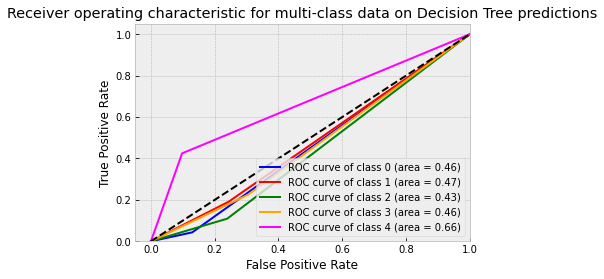

In [124]:
from itertools import cycle
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y1_test[:,i], dt_pred_proba[:, i],)
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green','orange','magenta'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data on Decision Tree predictions')
plt.legend(loc="lower right")
plt.show()

In [125]:
y.unique()

array([ 0,  1, -2, -1,  2], dtype=int64)

In [126]:
tweet_df.Sentiment.unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [127]:
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
from IPython.display import Image

In [128]:
feature_name=list(tweet_df1.columns)
class_name = list(tweet_df.Sentiment.unique())
# create a dot_file which stores the tree structure
dot_data = export_graphviz(dt_model,rounded = True,filled = True,feature_names=feature_name,
                           class_names=class_name)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
#graph.write_png("tree.png")
# Show graph
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.149386 to fit



In [129]:
dt_smodel=DecisionTreeClassifier(random_state=45,)
dt_smodel.fit(tweetx_strain,tweety_strain)

DecisionTreeClassifier(random_state=45)

In [130]:
dt_spred=dt_smodel.predict(tweetx_test)
dt_spred

array([1, 0, 1, ..., 2, 1, 1], dtype=int64)

In [131]:
dt_spred_proba=dt_smodel.predict_proba(tweetx_test)

In [132]:
#Confusion matrix:-
cm_sdt=confusion_matrix(tweety_test,dt_spred)
cm_sdt=pd.crosstab(tweety_test,dt_spred)
#ROC_AUC SCORE:-
dt_sroc_score=roc_auc_score(tweety_test,dt_spred_proba,multi_class='ovo',average='macro')
print('Decision Tree Classifier after applying SMOTE ROC score:',dt_sroc_score)

Decision Tree Classifier after applying SMOTE ROC score: 0.630662594318182


### 2. Random Forest Classifier

In [133]:
rf_smodel=RandomForestClassifier(n_estimators=500,max_depth=1000,random_state=234,)
rf_smodel.fit(tweetx_strain,tweety_strain)

RandomForestClassifier(max_depth=1000, n_estimators=500, random_state=234)

In [134]:
rf_spred=rf_smodel.predict(tweetx_test)
rf_spred_proba=rf_smodel.predict_proba(tweetx_test)

In [135]:
#Confusion matrix:-
cm_srf=confusion_matrix(tweety_test,rf_spred)
cm_srf=pd.crosstab(tweety_test,rf_spred)
#ROC_AUC SCORE:-
rf_sroc_score=roc_auc_score(tweety_test,rf_spred_proba,multi_class='ovo',average='macro')
print('Random Forest Classifier After applying SMOTE ROC score:',rf_sroc_score)

Random Forest Classifier After applying SMOTE ROC score: 0.8234807864938798


In [136]:
#Classification Report:-
rfs_scores=classification_report(tweety_test,rf_spred)
print(rfs_scores)

              precision    recall  f1-score   support

          -2       0.56      0.54      0.55      1645
          -1       0.48      0.38      0.43      2975
           0       0.51      0.73      0.60      2314
           1       0.50      0.44      0.46      3427
           2       0.56      0.59      0.57      1987

    accuracy                           0.52     12348
   macro avg       0.52      0.54      0.52     12348
weighted avg       0.51      0.52      0.51     12348



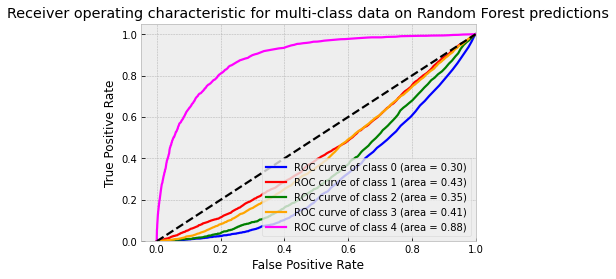

In [137]:
from itertools import cycle
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y1_test[:,i], rf_spred_proba[:, i],)
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green','orange','magenta'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2.2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2.2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data on Random Forest predictions')
plt.legend(loc="lower right")
plt.show()

In [138]:
features=pd.DataFrame()
features['Features']=tweet_df1.columns
features['Support']=rf_smodel.feature_importances_
features.sort_values('Support',ascending=False,inplace=True)
features.set_index('Features',inplace=True)

In [139]:
features

Support
Features             
length       0.026203
crisis       0.017107
coronavirus  0.014729
panic        0.014270
covid19      0.011868
...               ...
7am          0.000024
2021         0.000024
oversupply   0.000023
cbd          0.000021
reopen       0.000020

[3367 rows x 1 columns]

In [140]:
features.shape

(3367, 1)

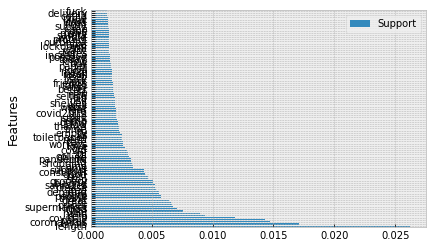

In [141]:
features.iloc[0:100].plot(kind='barh');
plt.rcParams['figure.figsize']=[35,25];
plt.show();

<AxesSubplot:xlabel='col_0', ylabel='Sentiment'>

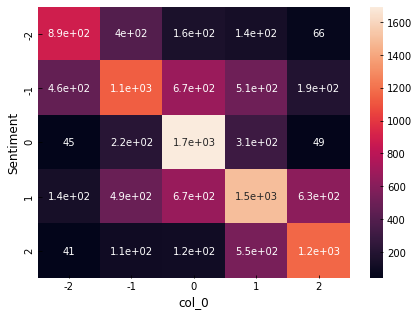

In [142]:
plt.figure(figsize=(7,5))
sns.heatmap(cm_srf, annot=True,fmt='.2g',)

### 3. Naive Bayes Classifier

In [143]:
nb_smodel=MultinomialNB()
nb_smodel.fit(tweetx_strain,tweety_strain)

MultinomialNB()

In [144]:
nb_spred=nb_smodel.predict(tweetx_test)
nb_spred_proba=nb_smodel.predict_proba(tweetx_test)

In [145]:
#Confusion matrix:-
cm_snb=confusion_matrix(tweety_test,nb_spred)
cm_snb=pd.crosstab(tweety_test,nb_spred)
#ROC_AUC SCORE:-
nb_sroc_score=roc_auc_score(tweety_test,nb_spred_proba,multi_class='ovo',average='macro')
print('Multinomial NB Classifier after applying SMOTE ROC score:',nb_sroc_score)

Multinomial NB Classifier after applying SMOTE ROC score: 0.7935739522188501


In [146]:
#Classification Report:-
nb_scores=classification_report(tweety_test,nb_spred)
print(nb_scores)

              precision    recall  f1-score   support

          -2       0.45      0.53      0.49      1645
          -1       0.43      0.37      0.40      2975
           0       0.55      0.60      0.57      2314
           1       0.44      0.36      0.40      3427
           2       0.47      0.60      0.53      1987

    accuracy                           0.47     12348
   macro avg       0.47      0.49      0.48     12348
weighted avg       0.47      0.47      0.46     12348



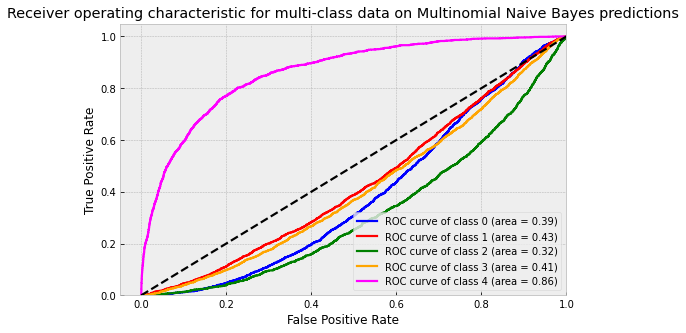

In [147]:
from itertools import cycle
fpr = dict()
tpr = dict()
roc_auc = dict()
plt.figure(figsize=(8,5))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y1_test[:,i], nb_spred_proba[:, i],)
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green','orange','magenta'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2.2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2.2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data on Multinomial Naive Bayes predictions')
plt.legend(loc="lower right")
plt.show()

In [148]:
snb_model=GaussianNB()
snb_model.fit(tweetx_strain,tweety_strain)

GaussianNB()

In [149]:
snb_pred=snb_model.predict(tweetx_test)
snb_pred_proba=snb_model.predict_proba(tweetx_test)

In [150]:
#Confusion matrix:-
cm_snb=confusion_matrix(tweety_test,snb_pred)
cm_snb=pd.crosstab(tweety_test,snb_pred)
#ROC_AUC SCORE:-
snb_roc_score=roc_auc_score(tweety_test,snb_pred_proba,multi_class='ovo',average='macro')
print('Gaussian NB Classifier ROC score:',snb_roc_score)

Gaussian NB Classifier ROC score: 0.7001513833854494


### 4. KNN Classifier

In [151]:
knn_model=KNeighborsClassifier()
knn_model.fit(tweetx_strain,tweety_strain)

KNeighborsClassifier()

In [152]:
knn_pred=knn_model.predict(tweetx_test)
knn_pred_proba=knn_model.predict_proba(tweetx_test)

In [153]:
#Confusion matrix:-
cm_knn=confusion_matrix(tweety_test,knn_pred)
cm_knn=pd.crosstab(tweety_test,knn_pred)
#ROC_AUC SCORE:-
knn_roc_score=roc_auc_score(tweety_test,knn_pred_proba,multi_class='ovo',average='macro')
print('KNN Classifier after applying SMOTE, ROC score:',knn_roc_score)

KNN Classifier after applying SMOTE, ROC score: 0.5552969865188343


In [154]:
#Classification Report:-
knn_scores=classification_report(tweety_test,knn_pred)
print(knn_scores)

              precision    recall  f1-score   support

          -2       0.16      0.53      0.25      1645
          -1       0.25      0.10      0.14      2975
           0       0.28      0.36      0.31      2314
           1       0.28      0.03      0.05      3427
           2       0.23      0.28      0.25      1987

    accuracy                           0.21     12348
   macro avg       0.24      0.26      0.20     12348
weighted avg       0.25      0.21      0.18     12348



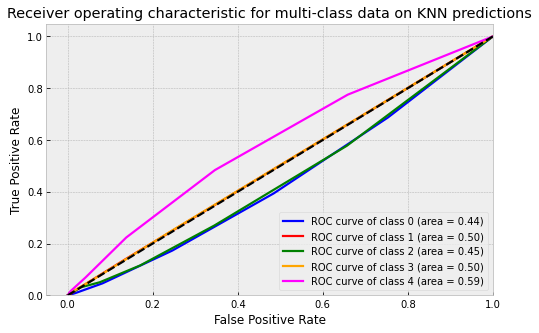

In [155]:
from itertools import cycle
fpr = dict()
tpr = dict()
roc_auc = dict()
plt.figure(figsize=(8,5))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y1_test[:,i], knn_pred_proba[:, i],)
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green','orange','magenta'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2.2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2.2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data on KNN predictions')
plt.legend(loc="lower right")
plt.show()

### 5. XG Boost Classifier

In [156]:
xgb_model=XGBClassifier(random_state=56,objective='multi:softprob')
xgb_model.fit(tweetx_strain,tweety_strain)

[13:32:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=56, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [157]:
xgb_model.classes_

array([-2, -1,  0,  1,  2], dtype=int64)

In [158]:
xgb_model.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=56, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)>

In [159]:
xgb_pred=xgb_model.predict(tweetx_test)
xgb_pred_proba=xgb_model.predict_proba(tweetx_test)

In [160]:
#Confusion matrix:-
cm_xgb=confusion_matrix(tweety_test,xgb_pred)
cm_xgb=pd.crosstab(tweety_test,xgb_pred)
#ROC_AUC SCORE:-
xgb_roc_score=roc_auc_score(tweety_test,xgb_pred_proba,multi_class='ovo',average='macro')
print('XG Boost Classifier ROC score:',xgb_roc_score)

XG Boost Classifier ROC score: 0.8296316738514082


In [161]:
#Classification Report:-
xgb_scores=classification_report(tweety_test,xgb_pred)
print(xgb_scores)

              precision    recall  f1-score   support

          -2       0.58      0.50      0.53      1645
          -1       0.49      0.41      0.45      2975
           0       0.54      0.73      0.62      2314
           1       0.49      0.51      0.50      3427
           2       0.65      0.57      0.60      1987

    accuracy                           0.54     12348
   macro avg       0.55      0.54      0.54     12348
weighted avg       0.54      0.54      0.53     12348



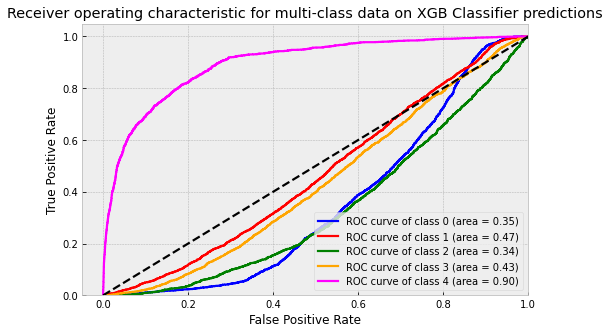

In [162]:
from itertools import cycle
fpr = dict()
tpr = dict()
roc_auc = dict()
plt.figure(figsize=(8,5))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y1_test[:,i], xgb_pred_proba[:, i],)
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green','orange','magenta'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2.2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2.2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data on XGB Classifier predictions')
plt.legend(loc="lower right")
plt.show()

In [163]:
xgb_model.feature_importances_

array([0.00023042, 0.        , 0.        , ..., 0.        , 0.        ,
       0.        ], dtype=float32)

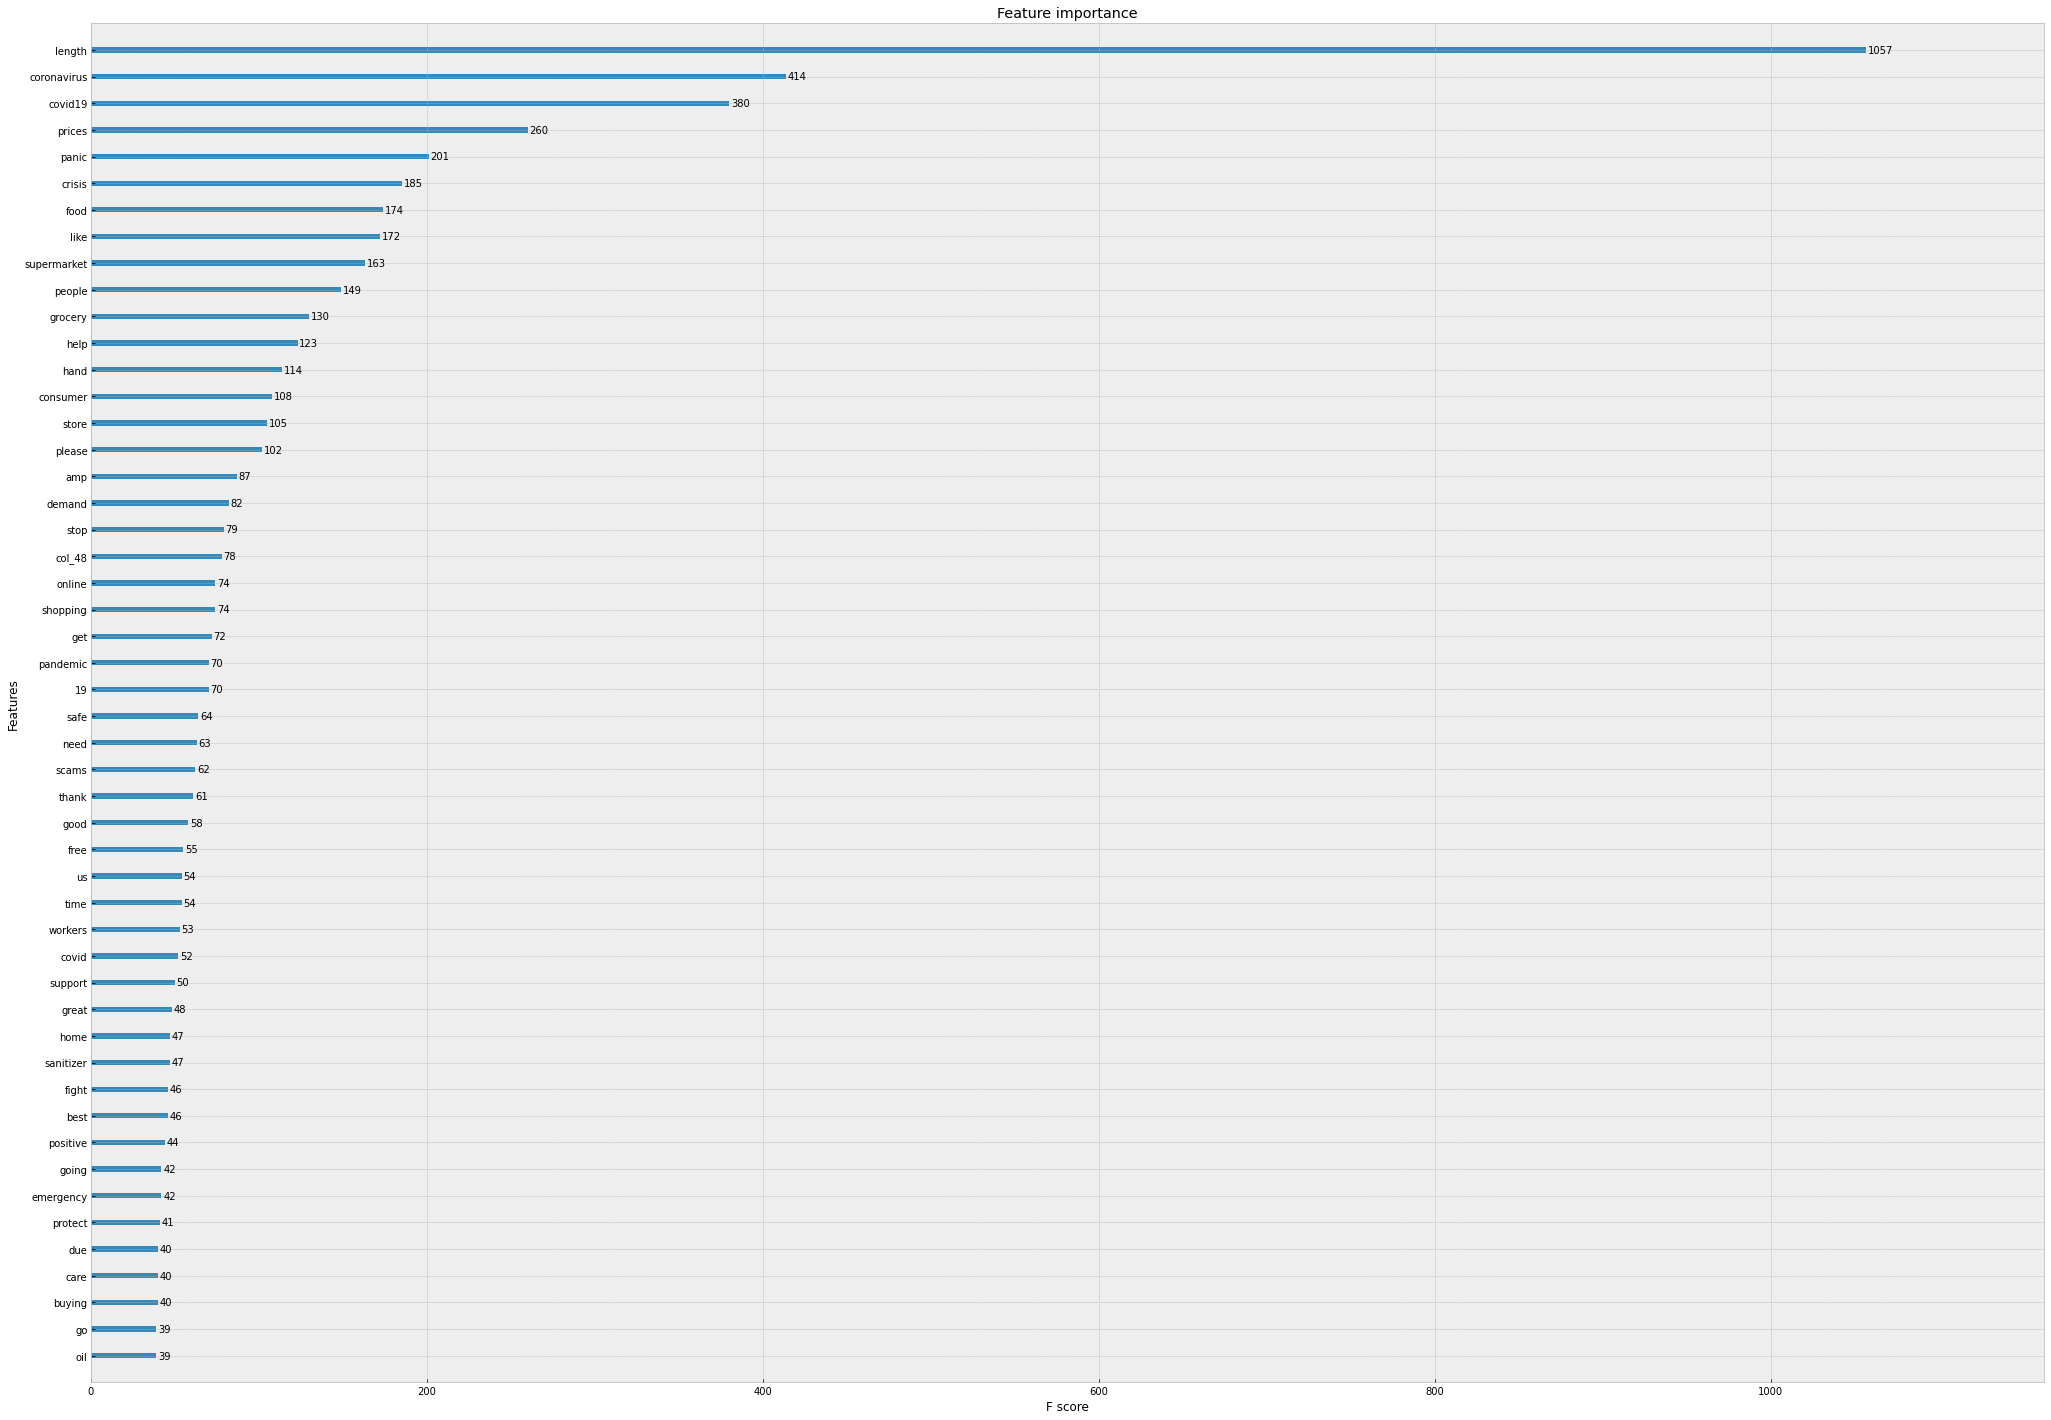

In [164]:
xgb.plot_importance(xgb_model,max_num_features=50);
plt.rcParams['figure.figsize']=[25,13]
plt.show();

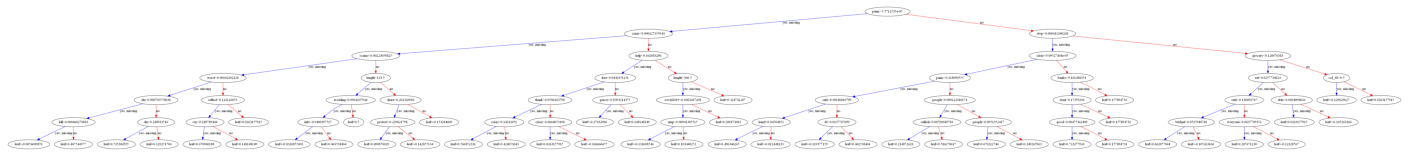

In [165]:
#plt.figure(figsize=(15,13));
xgb.plot_tree(xgb_model);
plt.rcParams['figure.figsize']=[50,10]
plt.show();

### 6. Cat Boost Classifier

In [166]:
cat_model=CatBoostClassifier(loss_function='MultiClass',n_estimators=5000,)
cat_model.fit(tweetx_strain,tweety_strain)

Learning rate set to 0.024512
0:	learn: 1.5984438	total: 1.24s	remaining: 1h 43m 24s
1:	learn: 1.5891062	total: 2.32s	remaining: 1h 36m 28s
2:	learn: 1.5799638	total: 3.4s	remaining: 1h 34m 31s
3:	learn: 1.5713611	total: 4.47s	remaining: 1h 32m 58s
4:	learn: 1.5641347	total: 5.56s	remaining: 1h 32m 35s
5:	learn: 1.5561695	total: 6.64s	remaining: 1h 32m 4s
6:	learn: 1.5487175	total: 7.71s	remaining: 1h 31m 38s
7:	learn: 1.5415807	total: 8.84s	remaining: 1h 31m 56s
8:	learn: 1.5352587	total: 9.92s	remaining: 1h 31m 40s
9:	learn: 1.5285953	total: 11.1s	remaining: 1h 31m 58s
10:	learn: 1.5226601	total: 12.2s	remaining: 1h 32m 23s
11:	learn: 1.5171360	total: 13.3s	remaining: 1h 32m 27s
12:	learn: 1.5119564	total: 14.4s	remaining: 1h 32m 19s
13:	learn: 1.5067780	total: 15.5s	remaining: 1h 32m 14s
14:	learn: 1.5016495	total: 16.7s	remaining: 1h 32m 21s
15:	learn: 1.4965753	total: 17.8s	remaining: 1h 32m 29s
16:	learn: 1.4918651	total: 18.9s	remaining: 1h 32m 34s
17:	learn: 1.4874200	total: 20

145:	learn: 1.2787988	total: 2m 48s	remaining: 1h 33m 34s
146:	learn: 1.2780169	total: 2m 50s	remaining: 1h 33m 39s
147:	learn: 1.2772255	total: 2m 51s	remaining: 1h 33m 41s
148:	learn: 1.2763902	total: 2m 52s	remaining: 1h 33m 43s
149:	learn: 1.2755687	total: 2m 54s	remaining: 1h 33m 48s
150:	learn: 1.2747233	total: 2m 55s	remaining: 1h 33m 51s
151:	learn: 1.2738930	total: 2m 56s	remaining: 1h 33m 56s
152:	learn: 1.2730730	total: 2m 57s	remaining: 1h 33m 58s
153:	learn: 1.2725867	total: 2m 59s	remaining: 1h 34m 3s
154:	learn: 1.2714529	total: 3m	remaining: 1h 34m 9s
155:	learn: 1.2706327	total: 3m 1s	remaining: 1h 34m 10s
156:	learn: 1.2698853	total: 3m 3s	remaining: 1h 34m 10s
157:	learn: 1.2692180	total: 3m 4s	remaining: 1h 34m 10s
158:	learn: 1.2686411	total: 3m 5s	remaining: 1h 34m 15s
159:	learn: 1.2678712	total: 3m 6s	remaining: 1h 34m 12s
160:	learn: 1.2671942	total: 3m 7s	remaining: 1h 34m 9s
161:	learn: 1.2664893	total: 3m 9s	remaining: 1h 34m 5s
162:	learn: 1.2657122	total: 

288:	learn: 1.1965528	total: 5m 29s	remaining: 1h 29m 37s
289:	learn: 1.1960816	total: 5m 30s	remaining: 1h 29m 34s
290:	learn: 1.1953684	total: 5m 31s	remaining: 1h 29m 30s
291:	learn: 1.1949385	total: 5m 32s	remaining: 1h 29m 26s
292:	learn: 1.1945706	total: 5m 33s	remaining: 1h 29m 22s
293:	learn: 1.1939021	total: 5m 34s	remaining: 1h 29m 20s
294:	learn: 1.1935343	total: 5m 35s	remaining: 1h 29m 15s
295:	learn: 1.1930550	total: 5m 36s	remaining: 1h 29m 11s
296:	learn: 1.1926547	total: 5m 37s	remaining: 1h 29m 6s
297:	learn: 1.1922406	total: 5m 38s	remaining: 1h 29m 1s
298:	learn: 1.1918450	total: 5m 39s	remaining: 1h 28m 58s
299:	learn: 1.1913310	total: 5m 40s	remaining: 1h 28m 53s
300:	learn: 1.1909764	total: 5m 41s	remaining: 1h 28m 48s
301:	learn: 1.1906289	total: 5m 42s	remaining: 1h 28m 43s
302:	learn: 1.1902255	total: 5m 43s	remaining: 1h 28m 39s
303:	learn: 1.1897745	total: 5m 44s	remaining: 1h 28m 35s
304:	learn: 1.1894338	total: 5m 45s	remaining: 1h 28m 30s
305:	learn: 1.18

431:	learn: 1.1436475	total: 8m 1s	remaining: 1h 24m 53s
432:	learn: 1.1432776	total: 8m 2s	remaining: 1h 24m 50s
433:	learn: 1.1428741	total: 8m 3s	remaining: 1h 24m 46s
434:	learn: 1.1424226	total: 8m 4s	remaining: 1h 24m 44s
435:	learn: 1.1420826	total: 8m 5s	remaining: 1h 24m 40s
436:	learn: 1.1417649	total: 8m 6s	remaining: 1h 24m 36s
437:	learn: 1.1414332	total: 8m 7s	remaining: 1h 24m 33s
438:	learn: 1.1410767	total: 8m 7s	remaining: 1h 24m 29s
439:	learn: 1.1406396	total: 8m 8s	remaining: 1h 24m 26s
440:	learn: 1.1403429	total: 8m 9s	remaining: 1h 24m 22s
441:	learn: 1.1400076	total: 8m 10s	remaining: 1h 24m 18s
442:	learn: 1.1396885	total: 8m 11s	remaining: 1h 24m 15s
443:	learn: 1.1393769	total: 8m 12s	remaining: 1h 24m 12s
444:	learn: 1.1390272	total: 8m 13s	remaining: 1h 24m 9s
445:	learn: 1.1387162	total: 8m 14s	remaining: 1h 24m 5s
446:	learn: 1.1384127	total: 8m 15s	remaining: 1h 24m 2s
447:	learn: 1.1380910	total: 8m 15s	remaining: 1h 23m 59s
448:	learn: 1.1377995	total

573:	learn: 1.0998032	total: 10m 43s	remaining: 1h 22m 44s
574:	learn: 1.0995651	total: 10m 45s	remaining: 1h 22m 45s
575:	learn: 1.0991610	total: 10m 46s	remaining: 1h 22m 46s
576:	learn: 1.0987802	total: 10m 48s	remaining: 1h 22m 48s
577:	learn: 1.0984898	total: 10m 49s	remaining: 1h 22m 49s
578:	learn: 1.0982339	total: 10m 51s	remaining: 1h 22m 51s
579:	learn: 1.0979997	total: 10m 52s	remaining: 1h 22m 51s
580:	learn: 1.0977348	total: 10m 53s	remaining: 1h 22m 52s
581:	learn: 1.0974507	total: 10m 55s	remaining: 1h 22m 53s
582:	learn: 1.0972002	total: 10m 56s	remaining: 1h 22m 55s
583:	learn: 1.0969599	total: 10m 57s	remaining: 1h 22m 55s
584:	learn: 1.0965626	total: 10m 59s	remaining: 1h 22m 54s
585:	learn: 1.0963151	total: 11m	remaining: 1h 22m 53s
586:	learn: 1.0960815	total: 11m 1s	remaining: 1h 22m 52s
587:	learn: 1.0958185	total: 11m 2s	remaining: 1h 22m 51s
588:	learn: 1.0955643	total: 11m 3s	remaining: 1h 22m 49s
589:	learn: 1.0953375	total: 11m 4s	remaining: 1h 22m 48s
590:	

713:	learn: 1.0668664	total: 13m 28s	remaining: 1h 20m 54s
714:	learn: 1.0666994	total: 13m 30s	remaining: 1h 20m 55s
715:	learn: 1.0665068	total: 13m 31s	remaining: 1h 20m 55s
716:	learn: 1.0662477	total: 13m 32s	remaining: 1h 20m 54s
717:	learn: 1.0660498	total: 13m 33s	remaining: 1h 20m 52s
718:	learn: 1.0658669	total: 13m 34s	remaining: 1h 20m 52s
719:	learn: 1.0657117	total: 13m 36s	remaining: 1h 20m 51s
720:	learn: 1.0655029	total: 13m 37s	remaining: 1h 20m 50s
721:	learn: 1.0652874	total: 13m 38s	remaining: 1h 20m 49s
722:	learn: 1.0650753	total: 13m 39s	remaining: 1h 20m 48s
723:	learn: 1.0648815	total: 13m 40s	remaining: 1h 20m 46s
724:	learn: 1.0646919	total: 13m 41s	remaining: 1h 20m 44s
725:	learn: 1.0645415	total: 13m 42s	remaining: 1h 20m 42s
726:	learn: 1.0643445	total: 13m 43s	remaining: 1h 20m 40s
727:	learn: 1.0641420	total: 13m 44s	remaining: 1h 20m 41s
728:	learn: 1.0639676	total: 13m 46s	remaining: 1h 20m 41s
729:	learn: 1.0638117	total: 13m 47s	remaining: 1h 20m 3

853:	learn: 1.0410254	total: 16m 1s	remaining: 1h 17m 46s
854:	learn: 1.0408957	total: 16m 2s	remaining: 1h 17m 45s
855:	learn: 1.0407425	total: 16m 3s	remaining: 1h 17m 43s
856:	learn: 1.0405665	total: 16m 4s	remaining: 1h 17m 42s
857:	learn: 1.0404223	total: 16m 5s	remaining: 1h 17m 41s
858:	learn: 1.0402791	total: 16m 6s	remaining: 1h 17m 39s
859:	learn: 1.0401288	total: 16m 7s	remaining: 1h 17m 37s
860:	learn: 1.0400118	total: 16m 8s	remaining: 1h 17m 36s
861:	learn: 1.0398824	total: 16m 9s	remaining: 1h 17m 34s
862:	learn: 1.0395913	total: 16m 10s	remaining: 1h 17m 34s
863:	learn: 1.0394354	total: 16m 11s	remaining: 1h 17m 32s
864:	learn: 1.0391986	total: 16m 13s	remaining: 1h 17m 31s
865:	learn: 1.0390208	total: 16m 14s	remaining: 1h 17m 30s
866:	learn: 1.0389006	total: 16m 15s	remaining: 1h 17m 29s
867:	learn: 1.0387078	total: 16m 16s	remaining: 1h 17m 28s
868:	learn: 1.0385768	total: 16m 17s	remaining: 1h 17m 26s
869:	learn: 1.0384424	total: 16m 18s	remaining: 1h 17m 24s
870:	l

993:	learn: 1.0204076	total: 18m 10s	remaining: 1h 13m 15s
994:	learn: 1.0202605	total: 18m 11s	remaining: 1h 13m 14s
995:	learn: 1.0201189	total: 18m 13s	remaining: 1h 13m 14s
996:	learn: 1.0199871	total: 18m 14s	remaining: 1h 13m 14s
997:	learn: 1.0198130	total: 18m 15s	remaining: 1h 13m 14s
998:	learn: 1.0197370	total: 18m 16s	remaining: 1h 13m 13s
999:	learn: 1.0196331	total: 18m 18s	remaining: 1h 13m 12s
1000:	learn: 1.0195323	total: 18m 19s	remaining: 1h 13m 11s
1001:	learn: 1.0193066	total: 18m 20s	remaining: 1h 13m 11s
1002:	learn: 1.0192339	total: 18m 21s	remaining: 1h 13m 10s
1003:	learn: 1.0191090	total: 18m 22s	remaining: 1h 13m 9s
1004:	learn: 1.0189835	total: 18m 23s	remaining: 1h 13m 8s
1005:	learn: 1.0188448	total: 18m 24s	remaining: 1h 13m 7s
1006:	learn: 1.0187127	total: 18m 26s	remaining: 1h 13m 5s
1007:	learn: 1.0186008	total: 18m 27s	remaining: 1h 13m 4s
1008:	learn: 1.0184643	total: 18m 28s	remaining: 1h 13m 3s
1009:	learn: 1.0183517	total: 18m 29s	remaining: 1h 1

1131:	learn: 1.0030119	total: 20m 24s	remaining: 1h 9m 43s
1132:	learn: 1.0029085	total: 20m 25s	remaining: 1h 9m 43s
1133:	learn: 1.0027635	total: 20m 26s	remaining: 1h 9m 42s
1134:	learn: 1.0026593	total: 20m 28s	remaining: 1h 9m 41s
1135:	learn: 1.0025253	total: 20m 29s	remaining: 1h 9m 41s
1136:	learn: 1.0024259	total: 20m 30s	remaining: 1h 9m 41s
1137:	learn: 1.0023271	total: 20m 31s	remaining: 1h 9m 40s
1138:	learn: 1.0022398	total: 20m 33s	remaining: 1h 9m 40s
1139:	learn: 1.0020832	total: 20m 34s	remaining: 1h 9m 40s
1140:	learn: 1.0019509	total: 20m 35s	remaining: 1h 9m 39s
1141:	learn: 1.0018780	total: 20m 37s	remaining: 1h 9m 39s
1142:	learn: 1.0017594	total: 20m 38s	remaining: 1h 9m 38s
1143:	learn: 1.0015994	total: 20m 39s	remaining: 1h 9m 37s
1144:	learn: 1.0015272	total: 20m 40s	remaining: 1h 9m 37s
1145:	learn: 1.0014300	total: 20m 42s	remaining: 1h 9m 36s
1146:	learn: 1.0013006	total: 20m 43s	remaining: 1h 9m 36s
1147:	learn: 1.0012151	total: 20m 44s	remaining: 1h 9m 3

1271:	learn: 0.9875246	total: 22m 47s	remaining: 1h 6m 48s
1272:	learn: 0.9874299	total: 22m 48s	remaining: 1h 6m 47s
1273:	learn: 0.9872746	total: 22m 49s	remaining: 1h 6m 45s
1274:	learn: 0.9871873	total: 22m 50s	remaining: 1h 6m 44s
1275:	learn: 0.9870586	total: 22m 51s	remaining: 1h 6m 43s
1276:	learn: 0.9869636	total: 22m 52s	remaining: 1h 6m 41s
1277:	learn: 0.9868721	total: 22m 53s	remaining: 1h 6m 39s
1278:	learn: 0.9867894	total: 22m 54s	remaining: 1h 6m 38s
1279:	learn: 0.9866928	total: 22m 55s	remaining: 1h 6m 36s
1280:	learn: 0.9865722	total: 22m 56s	remaining: 1h 6m 35s
1281:	learn: 0.9864502	total: 22m 56s	remaining: 1h 6m 33s
1282:	learn: 0.9863623	total: 22m 57s	remaining: 1h 6m 31s
1283:	learn: 0.9862274	total: 22m 58s	remaining: 1h 6m 30s
1284:	learn: 0.9861381	total: 22m 59s	remaining: 1h 6m 28s
1285:	learn: 0.9860800	total: 23m	remaining: 1h 6m 26s
1286:	learn: 0.9859625	total: 23m 1s	remaining: 1h 6m 25s
1287:	learn: 0.9858659	total: 23m 2s	remaining: 1h 6m 23s
128

1411:	learn: 0.9738832	total: 25m 5s	remaining: 1h 3m 45s
1412:	learn: 0.9737876	total: 25m 6s	remaining: 1h 3m 44s
1413:	learn: 0.9737141	total: 25m 7s	remaining: 1h 3m 42s
1414:	learn: 0.9736045	total: 25m 8s	remaining: 1h 3m 41s
1415:	learn: 0.9735483	total: 25m 9s	remaining: 1h 3m 39s
1416:	learn: 0.9734714	total: 25m 9s	remaining: 1h 3m 37s
1417:	learn: 0.9733977	total: 25m 10s	remaining: 1h 3m 36s
1418:	learn: 0.9733044	total: 25m 11s	remaining: 1h 3m 34s
1419:	learn: 0.9732104	total: 25m 12s	remaining: 1h 3m 33s
1420:	learn: 0.9731328	total: 25m 13s	remaining: 1h 3m 31s
1421:	learn: 0.9730697	total: 25m 14s	remaining: 1h 3m 29s
1422:	learn: 0.9729714	total: 25m 14s	remaining: 1h 3m 28s
1423:	learn: 0.9728845	total: 25m 15s	remaining: 1h 3m 26s
1424:	learn: 0.9728147	total: 25m 16s	remaining: 1h 3m 24s
1425:	learn: 0.9727165	total: 25m 17s	remaining: 1h 3m 23s
1426:	learn: 0.9726425	total: 25m 18s	remaining: 1h 3m 21s
1427:	learn: 0.9725426	total: 25m 19s	remaining: 1h 3m 20s
142

1552:	learn: 0.9620526	total: 27m 21s	remaining: 1h 44s
1553:	learn: 0.9619782	total: 27m 22s	remaining: 1h 42s
1554:	learn: 0.9618919	total: 27m 23s	remaining: 1h 41s
1555:	learn: 0.9618011	total: 27m 24s	remaining: 1h 39s
1556:	learn: 0.9617272	total: 27m 25s	remaining: 1h 38s
1557:	learn: 0.9616667	total: 27m 26s	remaining: 1h 36s
1558:	learn: 0.9615862	total: 27m 27s	remaining: 1h 35s
1559:	learn: 0.9615296	total: 27m 27s	remaining: 1h 34s
1560:	learn: 0.9614393	total: 27m 28s	remaining: 1h 32s
1561:	learn: 0.9613704	total: 27m 29s	remaining: 1h 31s
1562:	learn: 0.9612499	total: 27m 30s	remaining: 1h 29s
1563:	learn: 0.9611496	total: 27m 31s	remaining: 1h 28s
1564:	learn: 0.9610875	total: 27m 32s	remaining: 1h 26s
1565:	learn: 0.9609874	total: 27m 33s	remaining: 1h 25s
1566:	learn: 0.9609326	total: 27m 34s	remaining: 1h 23s
1567:	learn: 0.9608299	total: 27m 35s	remaining: 1h 22s
1568:	learn: 0.9607732	total: 27m 35s	remaining: 1h 21s
1569:	learn: 0.9606822	total: 27m 36s	remaining:

1698:	learn: 0.9502787	total: 29m 43s	remaining: 57m 45s
1699:	learn: 0.9502148	total: 29m 44s	remaining: 57m 44s
1700:	learn: 0.9501673	total: 29m 45s	remaining: 57m 43s
1701:	learn: 0.9501114	total: 29m 46s	remaining: 57m 42s
1702:	learn: 0.9500499	total: 29m 48s	remaining: 57m 41s
1703:	learn: 0.9499330	total: 29m 49s	remaining: 57m 40s
1704:	learn: 0.9498777	total: 29m 50s	remaining: 57m 39s
1705:	learn: 0.9498029	total: 29m 51s	remaining: 57m 38s
1706:	learn: 0.9497165	total: 29m 52s	remaining: 57m 38s
1707:	learn: 0.9496560	total: 29m 53s	remaining: 57m 37s
1708:	learn: 0.9495611	total: 29m 55s	remaining: 57m 36s
1709:	learn: 0.9494961	total: 29m 56s	remaining: 57m 36s
1710:	learn: 0.9494294	total: 29m 57s	remaining: 57m 35s
1711:	learn: 0.9493562	total: 29m 59s	remaining: 57m 35s
1712:	learn: 0.9492704	total: 30m	remaining: 57m 35s
1713:	learn: 0.9491929	total: 30m 1s	remaining: 57m 34s
1714:	learn: 0.9491466	total: 30m 2s	remaining: 57m 33s
1715:	learn: 0.9490309	total: 30m 4s	

1843:	learn: 0.9402906	total: 32m 14s	remaining: 55m 10s
1844:	learn: 0.9402153	total: 32m 15s	remaining: 55m 9s
1845:	learn: 0.9401485	total: 32m 16s	remaining: 55m 8s
1846:	learn: 0.9400735	total: 32m 17s	remaining: 55m 7s
1847:	learn: 0.9400059	total: 32m 18s	remaining: 55m 7s
1848:	learn: 0.9399372	total: 32m 20s	remaining: 55m 6s
1849:	learn: 0.9398719	total: 32m 21s	remaining: 55m 5s
1850:	learn: 0.9397844	total: 32m 22s	remaining: 55m 4s
1851:	learn: 0.9397111	total: 32m 23s	remaining: 55m 3s
1852:	learn: 0.9396573	total: 32m 24s	remaining: 55m 2s
1853:	learn: 0.9395851	total: 32m 25s	remaining: 55m 1s
1854:	learn: 0.9395169	total: 32m 26s	remaining: 55m
1855:	learn: 0.9394719	total: 32m 27s	remaining: 54m 59s
1856:	learn: 0.9394142	total: 32m 28s	remaining: 54m 58s
1857:	learn: 0.9393619	total: 32m 29s	remaining: 54m 57s
1858:	learn: 0.9393205	total: 32m 30s	remaining: 54m 56s
1859:	learn: 0.9392487	total: 32m 31s	remaining: 54m 55s
1860:	learn: 0.9391821	total: 32m 32s	remaini

1988:	learn: 0.9308841	total: 34m 38s	remaining: 52m 26s
1989:	learn: 0.9308373	total: 34m 39s	remaining: 52m 25s
1990:	learn: 0.9307929	total: 34m 40s	remaining: 52m 24s
1991:	learn: 0.9307060	total: 34m 41s	remaining: 52m 22s
1992:	learn: 0.9306417	total: 34m 42s	remaining: 52m 21s
1993:	learn: 0.9305777	total: 34m 43s	remaining: 52m 20s
1994:	learn: 0.9305405	total: 34m 44s	remaining: 52m 19s
1995:	learn: 0.9304774	total: 34m 44s	remaining: 52m 17s
1996:	learn: 0.9304438	total: 34m 45s	remaining: 52m 16s
1997:	learn: 0.9303911	total: 34m 46s	remaining: 52m 15s
1998:	learn: 0.9303083	total: 34m 47s	remaining: 52m 13s
1999:	learn: 0.9302633	total: 34m 48s	remaining: 52m 12s
2000:	learn: 0.9301829	total: 34m 49s	remaining: 52m 11s
2001:	learn: 0.9301433	total: 34m 50s	remaining: 52m 10s
2002:	learn: 0.9300906	total: 34m 51s	remaining: 52m 8s
2003:	learn: 0.9300413	total: 34m 52s	remaining: 52m 7s
2004:	learn: 0.9299617	total: 34m 52s	remaining: 52m 6s
2005:	learn: 0.9299312	total: 34m 

2133:	learn: 0.9223853	total: 37m	remaining: 49m 42s
2134:	learn: 0.9223384	total: 37m 1s	remaining: 49m 40s
2135:	learn: 0.9223059	total: 37m 2s	remaining: 49m 39s
2136:	learn: 0.9222596	total: 37m 2s	remaining: 49m 38s
2137:	learn: 0.9222327	total: 37m 3s	remaining: 49m 36s
2138:	learn: 0.9221028	total: 37m 4s	remaining: 49m 35s
2139:	learn: 0.9220571	total: 37m 5s	remaining: 49m 34s
2140:	learn: 0.9220000	total: 37m 6s	remaining: 49m 33s
2141:	learn: 0.9219603	total: 37m 7s	remaining: 49m 31s
2142:	learn: 0.9218837	total: 37m 8s	remaining: 49m 30s
2143:	learn: 0.9218337	total: 37m 9s	remaining: 49m 29s
2144:	learn: 0.9217960	total: 37m 10s	remaining: 49m 28s
2145:	learn: 0.9217516	total: 37m 11s	remaining: 49m 27s
2146:	learn: 0.9217075	total: 37m 11s	remaining: 49m 25s
2147:	learn: 0.9216333	total: 37m 12s	remaining: 49m 24s
2148:	learn: 0.9215862	total: 37m 13s	remaining: 49m 23s
2149:	learn: 0.9215395	total: 37m 14s	remaining: 49m 22s
2150:	learn: 0.9215030	total: 37m 15s	remaini

2279:	learn: 0.9143190	total: 39m 23s	remaining: 46m 59s
2280:	learn: 0.9142845	total: 39m 24s	remaining: 46m 58s
2281:	learn: 0.9142112	total: 39m 25s	remaining: 46m 57s
2282:	learn: 0.9141746	total: 39m 26s	remaining: 46m 56s
2283:	learn: 0.9141243	total: 39m 27s	remaining: 46m 55s
2284:	learn: 0.9140781	total: 39m 29s	remaining: 46m 54s
2285:	learn: 0.9140380	total: 39m 30s	remaining: 46m 54s
2286:	learn: 0.9139802	total: 39m 31s	remaining: 46m 53s
2287:	learn: 0.9139540	total: 39m 32s	remaining: 46m 52s
2288:	learn: 0.9139281	total: 39m 33s	remaining: 46m 51s
2289:	learn: 0.9139052	total: 39m 34s	remaining: 46m 50s
2290:	learn: 0.9138567	total: 39m 35s	remaining: 46m 49s
2291:	learn: 0.9138044	total: 39m 37s	remaining: 46m 48s
2292:	learn: 0.9137287	total: 39m 38s	remaining: 46m 47s
2293:	learn: 0.9136552	total: 39m 39s	remaining: 46m 46s
2294:	learn: 0.9136131	total: 39m 40s	remaining: 46m 45s
2295:	learn: 0.9135502	total: 39m 41s	remaining: 46m 44s
2296:	learn: 0.9134753	total: 3

2424:	learn: 0.9067967	total: 41m 51s	remaining: 44m 26s
2425:	learn: 0.9067682	total: 41m 52s	remaining: 44m 25s
2426:	learn: 0.9067030	total: 41m 53s	remaining: 44m 24s
2427:	learn: 0.9066833	total: 41m 54s	remaining: 44m 23s
2428:	learn: 0.9066352	total: 41m 55s	remaining: 44m 22s
2429:	learn: 0.9066147	total: 41m 57s	remaining: 44m 22s
2430:	learn: 0.9065584	total: 41m 58s	remaining: 44m 21s
2431:	learn: 0.9064913	total: 41m 59s	remaining: 44m 20s
2432:	learn: 0.9064623	total: 42m	remaining: 44m 19s
2433:	learn: 0.9064347	total: 42m 1s	remaining: 44m 18s
2434:	learn: 0.9063848	total: 42m 2s	remaining: 44m 17s
2435:	learn: 0.9063062	total: 42m 3s	remaining: 44m 16s
2436:	learn: 0.9062345	total: 42m 4s	remaining: 44m 15s
2437:	learn: 0.9061890	total: 42m 5s	remaining: 44m 14s
2438:	learn: 0.9061198	total: 42m 6s	remaining: 44m 13s
2439:	learn: 0.9060664	total: 42m 7s	remaining: 44m 12s
2440:	learn: 0.9060291	total: 42m 8s	remaining: 44m 11s
2441:	learn: 0.9059804	total: 42m 9s	remain

2569:	learn: 0.8997871	total: 44m 16s	remaining: 41m 51s
2570:	learn: 0.8997460	total: 44m 17s	remaining: 41m 50s
2571:	learn: 0.8997095	total: 44m 18s	remaining: 41m 49s
2572:	learn: 0.8996341	total: 44m 19s	remaining: 41m 48s
2573:	learn: 0.8995686	total: 44m 20s	remaining: 41m 47s
2574:	learn: 0.8995167	total: 44m 21s	remaining: 41m 46s
2575:	learn: 0.8994890	total: 44m 22s	remaining: 41m 45s
2576:	learn: 0.8994341	total: 44m 23s	remaining: 41m 43s
2577:	learn: 0.8993836	total: 44m 23s	remaining: 41m 42s
2578:	learn: 0.8993301	total: 44m 24s	remaining: 41m 41s
2579:	learn: 0.8993007	total: 44m 25s	remaining: 41m 40s
2580:	learn: 0.8992518	total: 44m 26s	remaining: 41m 39s
2581:	learn: 0.8991778	total: 44m 27s	remaining: 41m 38s
2582:	learn: 0.8991131	total: 44m 28s	remaining: 41m 36s
2583:	learn: 0.8990747	total: 44m 29s	remaining: 41m 35s
2584:	learn: 0.8990309	total: 44m 30s	remaining: 41m 34s
2585:	learn: 0.8989988	total: 44m 31s	remaining: 41m 33s
2586:	learn: 0.8989717	total: 4

2714:	learn: 0.8931003	total: 46m 40s	remaining: 39m 17s
2715:	learn: 0.8930537	total: 46m 41s	remaining: 39m 15s
2716:	learn: 0.8930266	total: 46m 42s	remaining: 39m 14s
2717:	learn: 0.8929949	total: 46m 43s	remaining: 39m 13s
2718:	learn: 0.8929176	total: 46m 44s	remaining: 39m 12s
2719:	learn: 0.8928513	total: 46m 45s	remaining: 39m 11s
2720:	learn: 0.8928015	total: 46m 46s	remaining: 39m 10s
2721:	learn: 0.8927375	total: 46m 47s	remaining: 39m 9s
2722:	learn: 0.8927062	total: 46m 48s	remaining: 39m 8s
2723:	learn: 0.8926511	total: 46m 49s	remaining: 39m 7s
2724:	learn: 0.8926079	total: 46m 49s	remaining: 39m 5s
2725:	learn: 0.8925803	total: 46m 50s	remaining: 39m 4s
2726:	learn: 0.8925527	total: 46m 51s	remaining: 39m 3s
2727:	learn: 0.8925278	total: 46m 52s	remaining: 39m 2s
2728:	learn: 0.8924987	total: 46m 53s	remaining: 39m 1s
2729:	learn: 0.8924437	total: 46m 54s	remaining: 39m
2730:	learn: 0.8924116	total: 46m 55s	remaining: 38m 59s
2731:	learn: 0.8923681	total: 46m 56s	remai

2859:	learn: 0.8869093	total: 49m 5s	remaining: 36m 43s
2860:	learn: 0.8868512	total: 49m 6s	remaining: 36m 42s
2861:	learn: 0.8867543	total: 49m 7s	remaining: 36m 41s
2862:	learn: 0.8867045	total: 49m 8s	remaining: 36m 40s
2863:	learn: 0.8866509	total: 49m 9s	remaining: 36m 39s
2864:	learn: 0.8865951	total: 49m 10s	remaining: 36m 39s
2865:	learn: 0.8865642	total: 49m 12s	remaining: 36m 38s
2866:	learn: 0.8865342	total: 49m 13s	remaining: 36m 37s
2867:	learn: 0.8864972	total: 49m 14s	remaining: 36m 36s
2868:	learn: 0.8864690	total: 49m 15s	remaining: 36m 35s
2869:	learn: 0.8864329	total: 49m 16s	remaining: 36m 34s
2870:	learn: 0.8863550	total: 49m 18s	remaining: 36m 33s
2871:	learn: 0.8863130	total: 49m 19s	remaining: 36m 32s
2872:	learn: 0.8862695	total: 49m 20s	remaining: 36m 31s
2873:	learn: 0.8861967	total: 49m 21s	remaining: 36m 30s
2874:	learn: 0.8861541	total: 49m 22s	remaining: 36m 29s
2875:	learn: 0.8861033	total: 49m 24s	remaining: 36m 29s
2876:	learn: 0.8860616	total: 49m 25

3004:	learn: 0.8810050	total: 51m 35s	remaining: 34m 15s
3005:	learn: 0.8809736	total: 51m 37s	remaining: 34m 14s
3006:	learn: 0.8809421	total: 51m 38s	remaining: 34m 13s
3007:	learn: 0.8809227	total: 51m 39s	remaining: 34m 12s
3008:	learn: 0.8808966	total: 51m 40s	remaining: 34m 11s
3009:	learn: 0.8808540	total: 51m 41s	remaining: 34m 10s
3010:	learn: 0.8808121	total: 51m 42s	remaining: 34m 9s
3011:	learn: 0.8807822	total: 51m 43s	remaining: 34m 8s
3012:	learn: 0.8807455	total: 51m 44s	remaining: 34m 7s
3013:	learn: 0.8806918	total: 51m 45s	remaining: 34m 6s
3014:	learn: 0.8806623	total: 51m 46s	remaining: 34m 5s
3015:	learn: 0.8806039	total: 51m 47s	remaining: 34m 4s
3016:	learn: 0.8805620	total: 51m 48s	remaining: 34m 3s
3017:	learn: 0.8805346	total: 51m 49s	remaining: 34m 2s
3018:	learn: 0.8805111	total: 51m 50s	remaining: 34m 1s
3019:	learn: 0.8804666	total: 51m 51s	remaining: 34m
3020:	learn: 0.8804373	total: 51m 52s	remaining: 33m 59s
3021:	learn: 0.8804205	total: 51m 53s	remain

3149:	learn: 0.8755669	total: 54m 1s	remaining: 31m 43s
3150:	learn: 0.8755342	total: 54m 2s	remaining: 31m 42s
3151:	learn: 0.8754963	total: 54m 3s	remaining: 31m 41s
3152:	learn: 0.8754678	total: 54m 3s	remaining: 31m 40s
3153:	learn: 0.8754399	total: 54m 4s	remaining: 31m 39s
3154:	learn: 0.8754136	total: 54m 5s	remaining: 31m 38s
3155:	learn: 0.8753689	total: 54m 6s	remaining: 31m 36s
3156:	learn: 0.8753207	total: 54m 7s	remaining: 31m 35s
3157:	learn: 0.8752818	total: 54m 8s	remaining: 31m 34s
3158:	learn: 0.8752586	total: 54m 9s	remaining: 31m 33s
3159:	learn: 0.8752408	total: 54m 9s	remaining: 31m 32s
3160:	learn: 0.8751991	total: 54m 10s	remaining: 31m 31s
3161:	learn: 0.8751735	total: 54m 11s	remaining: 31m 30s
3162:	learn: 0.8751514	total: 54m 12s	remaining: 31m 28s
3163:	learn: 0.8751169	total: 54m 13s	remaining: 31m 27s
3164:	learn: 0.8750844	total: 54m 14s	remaining: 31m 26s
3165:	learn: 0.8750665	total: 54m 14s	remaining: 31m 25s
3166:	learn: 0.8750173	total: 54m 15s	rema

3294:	learn: 0.8704395	total: 56m 23s	remaining: 29m 10s
3295:	learn: 0.8704035	total: 56m 24s	remaining: 29m 9s
3296:	learn: 0.8703759	total: 56m 25s	remaining: 29m 8s
3297:	learn: 0.8703362	total: 56m 26s	remaining: 29m 7s
3298:	learn: 0.8702974	total: 56m 27s	remaining: 29m 6s
3299:	learn: 0.8702839	total: 56m 28s	remaining: 29m 5s
3300:	learn: 0.8702407	total: 56m 29s	remaining: 29m 4s
3301:	learn: 0.8702062	total: 56m 30s	remaining: 29m 3s
3302:	learn: 0.8701646	total: 56m 31s	remaining: 29m 2s
3303:	learn: 0.8701287	total: 56m 32s	remaining: 29m 1s
3304:	learn: 0.8700963	total: 56m 33s	remaining: 29m
3305:	learn: 0.8700682	total: 56m 34s	remaining: 28m 59s
3306:	learn: 0.8700584	total: 56m 35s	remaining: 28m 58s
3307:	learn: 0.8700371	total: 56m 36s	remaining: 28m 57s
3308:	learn: 0.8699980	total: 56m 37s	remaining: 28m 56s
3309:	learn: 0.8699571	total: 56m 38s	remaining: 28m 55s
3310:	learn: 0.8698871	total: 56m 39s	remaining: 28m 54s
3311:	learn: 0.8698530	total: 56m 41s	remain

3439:	learn: 0.8651628	total: 58m 52s	remaining: 26m 42s
3440:	learn: 0.8651106	total: 58m 54s	remaining: 26m 41s
3441:	learn: 0.8650821	total: 58m 55s	remaining: 26m 40s
3442:	learn: 0.8650652	total: 58m 56s	remaining: 26m 39s
3443:	learn: 0.8650401	total: 58m 57s	remaining: 26m 38s
3444:	learn: 0.8650070	total: 58m 58s	remaining: 26m 37s
3445:	learn: 0.8649758	total: 58m 59s	remaining: 26m 35s
3446:	learn: 0.8649495	total: 59m	remaining: 26m 34s
3447:	learn: 0.8649206	total: 59m 1s	remaining: 26m 33s
3448:	learn: 0.8648723	total: 59m 2s	remaining: 26m 32s
3449:	learn: 0.8648268	total: 59m 3s	remaining: 26m 31s
3450:	learn: 0.8648038	total: 59m 4s	remaining: 26m 30s
3451:	learn: 0.8647736	total: 59m 5s	remaining: 26m 29s
3452:	learn: 0.8647379	total: 59m 5s	remaining: 26m 28s
3453:	learn: 0.8646961	total: 59m 6s	remaining: 26m 27s
3454:	learn: 0.8646803	total: 59m 7s	remaining: 26m 26s
3455:	learn: 0.8646468	total: 59m 8s	remaining: 26m 25s
3456:	learn: 0.8645904	total: 59m 9s	remaini

3585:	learn: 0.8601017	total: 1h 1m 20s	remaining: 24m 11s
3586:	learn: 0.8600913	total: 1h 1m 21s	remaining: 24m 10s
3587:	learn: 0.8600565	total: 1h 1m 22s	remaining: 24m 9s
3588:	learn: 0.8600259	total: 1h 1m 23s	remaining: 24m 8s
3589:	learn: 0.8600134	total: 1h 1m 24s	remaining: 24m 7s
3590:	learn: 0.8599504	total: 1h 1m 25s	remaining: 24m 5s
3591:	learn: 0.8598836	total: 1h 1m 26s	remaining: 24m 4s
3592:	learn: 0.8598670	total: 1h 1m 26s	remaining: 24m 3s
3593:	learn: 0.8598429	total: 1h 1m 27s	remaining: 24m 2s
3594:	learn: 0.8597953	total: 1h 1m 28s	remaining: 24m 1s
3595:	learn: 0.8597800	total: 1h 1m 29s	remaining: 24m
3596:	learn: 0.8597434	total: 1h 1m 30s	remaining: 23m 59s
3597:	learn: 0.8597153	total: 1h 1m 31s	remaining: 23m 58s
3598:	learn: 0.8596768	total: 1h 1m 32s	remaining: 23m 57s
3599:	learn: 0.8596408	total: 1h 1m 33s	remaining: 23m 56s
3600:	learn: 0.8596094	total: 1h 1m 34s	remaining: 23m 55s
3601:	learn: 0.8595461	total: 1h 1m 34s	remaining: 23m 54s
3602:	lea

3725:	learn: 0.8552060	total: 1h 3m 36s	remaining: 21m 44s
3726:	learn: 0.8551684	total: 1h 3m 37s	remaining: 21m 43s
3727:	learn: 0.8551463	total: 1h 3m 38s	remaining: 21m 42s
3728:	learn: 0.8551030	total: 1h 3m 39s	remaining: 21m 41s
3729:	learn: 0.8550789	total: 1h 3m 40s	remaining: 21m 40s
3730:	learn: 0.8550319	total: 1h 3m 41s	remaining: 21m 39s
3731:	learn: 0.8550104	total: 1h 3m 41s	remaining: 21m 38s
3732:	learn: 0.8549947	total: 1h 3m 42s	remaining: 21m 37s
3733:	learn: 0.8549530	total: 1h 3m 43s	remaining: 21m 36s
3734:	learn: 0.8549284	total: 1h 3m 44s	remaining: 21m 35s
3735:	learn: 0.8548804	total: 1h 3m 45s	remaining: 21m 34s
3736:	learn: 0.8548407	total: 1h 3m 46s	remaining: 21m 33s
3737:	learn: 0.8548025	total: 1h 3m 47s	remaining: 21m 32s
3738:	learn: 0.8547854	total: 1h 3m 48s	remaining: 21m 31s
3739:	learn: 0.8547461	total: 1h 3m 49s	remaining: 21m 30s
3740:	learn: 0.8547181	total: 1h 3m 50s	remaining: 21m 28s
3741:	learn: 0.8546705	total: 1h 3m 51s	remaining: 21m 2

3865:	learn: 0.8507451	total: 1h 5m 56s	remaining: 19m 20s
3866:	learn: 0.8507218	total: 1h 5m 57s	remaining: 19m 19s
3867:	learn: 0.8506876	total: 1h 5m 58s	remaining: 19m 18s
3868:	learn: 0.8506618	total: 1h 5m 59s	remaining: 19m 17s
3869:	learn: 0.8506403	total: 1h 6m	remaining: 19m 16s
3870:	learn: 0.8506104	total: 1h 6m 1s	remaining: 19m 15s
3871:	learn: 0.8505938	total: 1h 6m 2s	remaining: 19m 14s
3872:	learn: 0.8505490	total: 1h 6m 3s	remaining: 19m 13s
3873:	learn: 0.8505127	total: 1h 6m 4s	remaining: 19m 12s
3874:	learn: 0.8504817	total: 1h 6m 5s	remaining: 19m 11s
3875:	learn: 0.8504705	total: 1h 6m 6s	remaining: 19m 10s
3876:	learn: 0.8504418	total: 1h 6m 7s	remaining: 19m 9s
3877:	learn: 0.8504244	total: 1h 6m 8s	remaining: 19m 8s
3878:	learn: 0.8503740	total: 1h 6m 10s	remaining: 19m 7s
3879:	learn: 0.8503456	total: 1h 6m 11s	remaining: 19m 6s
3880:	learn: 0.8503157	total: 1h 6m 12s	remaining: 19m 5s
3881:	learn: 0.8502936	total: 1h 6m 13s	remaining: 19m 4s
3882:	learn: 0.

4006:	learn: 0.8466990	total: 1h 8m 23s	remaining: 16m 56s
4007:	learn: 0.8466693	total: 1h 8m 24s	remaining: 16m 55s
4008:	learn: 0.8466298	total: 1h 8m 25s	remaining: 16m 54s
4009:	learn: 0.8465918	total: 1h 8m 27s	remaining: 16m 53s
4010:	learn: 0.8465744	total: 1h 8m 28s	remaining: 16m 52s
4011:	learn: 0.8465507	total: 1h 8m 29s	remaining: 16m 51s
4012:	learn: 0.8465229	total: 1h 8m 30s	remaining: 16m 50s
4013:	learn: 0.8464767	total: 1h 8m 31s	remaining: 16m 49s
4014:	learn: 0.8464489	total: 1h 8m 32s	remaining: 16m 48s
4015:	learn: 0.8464087	total: 1h 8m 33s	remaining: 16m 47s
4016:	learn: 0.8463809	total: 1h 8m 34s	remaining: 16m 46s
4017:	learn: 0.8463534	total: 1h 8m 35s	remaining: 16m 45s
4018:	learn: 0.8463215	total: 1h 8m 36s	remaining: 16m 44s
4019:	learn: 0.8462757	total: 1h 8m 37s	remaining: 16m 43s
4020:	learn: 0.8462469	total: 1h 8m 38s	remaining: 16m 42s
4021:	learn: 0.8462148	total: 1h 8m 39s	remaining: 16m 41s
4022:	learn: 0.8462007	total: 1h 8m 40s	remaining: 16m 4

4146:	learn: 0.8425864	total: 1h 10m 42s	remaining: 14m 32s
4147:	learn: 0.8425576	total: 1h 10m 43s	remaining: 14m 31s
4148:	learn: 0.8425402	total: 1h 10m 44s	remaining: 14m 30s
4149:	learn: 0.8425044	total: 1h 10m 45s	remaining: 14m 29s
4150:	learn: 0.8424755	total: 1h 10m 46s	remaining: 14m 28s
4151:	learn: 0.8424566	total: 1h 10m 47s	remaining: 14m 27s
4152:	learn: 0.8424451	total: 1h 10m 47s	remaining: 14m 26s
4153:	learn: 0.8424025	total: 1h 10m 48s	remaining: 14m 25s
4154:	learn: 0.8423867	total: 1h 10m 49s	remaining: 14m 24s
4155:	learn: 0.8423515	total: 1h 10m 50s	remaining: 14m 23s
4156:	learn: 0.8423339	total: 1h 10m 51s	remaining: 14m 22s
4157:	learn: 0.8423005	total: 1h 10m 52s	remaining: 14m 21s
4158:	learn: 0.8422807	total: 1h 10m 53s	remaining: 14m 20s
4159:	learn: 0.8422735	total: 1h 10m 54s	remaining: 14m 19s
4160:	learn: 0.8422183	total: 1h 10m 55s	remaining: 14m 17s
4161:	learn: 0.8422040	total: 1h 10m 55s	remaining: 14m 16s
4162:	learn: 0.8421794	total: 1h 10m 56s

4284:	learn: 0.8386970	total: 1h 12m 57s	remaining: 12m 10s
4285:	learn: 0.8386674	total: 1h 12m 58s	remaining: 12m 9s
4286:	learn: 0.8386244	total: 1h 12m 59s	remaining: 12m 8s
4287:	learn: 0.8385986	total: 1h 13m	remaining: 12m 7s
4288:	learn: 0.8385743	total: 1h 13m 1s	remaining: 12m 6s
4289:	learn: 0.8385353	total: 1h 13m 2s	remaining: 12m 5s
4290:	learn: 0.8385241	total: 1h 13m 4s	remaining: 12m 4s
4291:	learn: 0.8385022	total: 1h 13m 5s	remaining: 12m 3s
4292:	learn: 0.8384564	total: 1h 13m 6s	remaining: 12m 2s
4293:	learn: 0.8384290	total: 1h 13m 7s	remaining: 12m 1s
4294:	learn: 0.8384129	total: 1h 13m 8s	remaining: 12m
4295:	learn: 0.8383892	total: 1h 13m 9s	remaining: 11m 59s
4296:	learn: 0.8383430	total: 1h 13m 10s	remaining: 11m 58s
4297:	learn: 0.8383117	total: 1h 13m 11s	remaining: 11m 57s
4298:	learn: 0.8382957	total: 1h 13m 13s	remaining: 11m 56s
4299:	learn: 0.8382779	total: 1h 13m 14s	remaining: 11m 55s
4300:	learn: 0.8382541	total: 1h 13m 15s	remaining: 11m 54s
4301:

4423:	learn: 0.8349141	total: 1h 15m 20s	remaining: 9m 48s
4424:	learn: 0.8348517	total: 1h 15m 21s	remaining: 9m 47s
4425:	learn: 0.8347807	total: 1h 15m 22s	remaining: 9m 46s
4426:	learn: 0.8347282	total: 1h 15m 24s	remaining: 9m 45s
4427:	learn: 0.8347135	total: 1h 15m 25s	remaining: 9m 44s
4428:	learn: 0.8346887	total: 1h 15m 26s	remaining: 9m 43s
4429:	learn: 0.8346455	total: 1h 15m 27s	remaining: 9m 42s
4430:	learn: 0.8346061	total: 1h 15m 28s	remaining: 9m 41s
4431:	learn: 0.8345659	total: 1h 15m 29s	remaining: 9m 40s
4432:	learn: 0.8345485	total: 1h 15m 30s	remaining: 9m 39s
4433:	learn: 0.8345359	total: 1h 15m 31s	remaining: 9m 38s
4434:	learn: 0.8345040	total: 1h 15m 32s	remaining: 9m 37s
4435:	learn: 0.8344899	total: 1h 15m 34s	remaining: 9m 36s
4436:	learn: 0.8344751	total: 1h 15m 35s	remaining: 9m 35s
4437:	learn: 0.8344405	total: 1h 15m 36s	remaining: 9m 34s
4438:	learn: 0.8344147	total: 1h 15m 37s	remaining: 9m 33s
4439:	learn: 0.8343875	total: 1h 15m 38s	remaining: 9m 3

4563:	learn: 0.8308291	total: 1h 17m 42s	remaining: 7m 25s
4564:	learn: 0.8307908	total: 1h 17m 43s	remaining: 7m 24s
4565:	learn: 0.8307508	total: 1h 17m 44s	remaining: 7m 23s
4566:	learn: 0.8306913	total: 1h 17m 45s	remaining: 7m 22s
4567:	learn: 0.8306796	total: 1h 17m 46s	remaining: 7m 21s
4568:	learn: 0.8306583	total: 1h 17m 47s	remaining: 7m 20s
4569:	learn: 0.8306344	total: 1h 17m 48s	remaining: 7m 19s
4570:	learn: 0.8306261	total: 1h 17m 49s	remaining: 7m 18s
4571:	learn: 0.8305887	total: 1h 17m 50s	remaining: 7m 17s
4572:	learn: 0.8305713	total: 1h 17m 51s	remaining: 7m 16s
4573:	learn: 0.8305553	total: 1h 17m 52s	remaining: 7m 15s
4574:	learn: 0.8305421	total: 1h 17m 54s	remaining: 7m 14s
4575:	learn: 0.8305285	total: 1h 17m 55s	remaining: 7m 13s
4576:	learn: 0.8305158	total: 1h 17m 56s	remaining: 7m 12s
4577:	learn: 0.8305000	total: 1h 17m 57s	remaining: 7m 11s
4578:	learn: 0.8304652	total: 1h 17m 58s	remaining: 7m 10s
4579:	learn: 0.8304512	total: 1h 17m 59s	remaining: 7m 9

4703:	learn: 0.8272086	total: 1h 20m 3s	remaining: 5m 2s
4704:	learn: 0.8271918	total: 1h 20m 4s	remaining: 5m 1s
4705:	learn: 0.8271330	total: 1h 20m 5s	remaining: 5m
4706:	learn: 0.8271037	total: 1h 20m 6s	remaining: 4m 59s
4707:	learn: 0.8270733	total: 1h 20m 7s	remaining: 4m 58s
4708:	learn: 0.8270618	total: 1h 20m 8s	remaining: 4m 57s
4709:	learn: 0.8270402	total: 1h 20m 8s	remaining: 4m 56s
4710:	learn: 0.8270116	total: 1h 20m 9s	remaining: 4m 55s
4711:	learn: 0.8270010	total: 1h 20m 10s	remaining: 4m 54s
4712:	learn: 0.8269789	total: 1h 20m 11s	remaining: 4m 53s
4713:	learn: 0.8269469	total: 1h 20m 12s	remaining: 4m 51s
4714:	learn: 0.8269341	total: 1h 20m 13s	remaining: 4m 50s
4715:	learn: 0.8269184	total: 1h 20m 14s	remaining: 4m 49s
4716:	learn: 0.8269054	total: 1h 20m 15s	remaining: 4m 48s
4717:	learn: 0.8268953	total: 1h 20m 16s	remaining: 4m 47s
4718:	learn: 0.8268477	total: 1h 20m 17s	remaining: 4m 46s
4719:	learn: 0.8268260	total: 1h 20m 18s	remaining: 4m 45s
4720:	learn

4843:	learn: 0.8236385	total: 1h 22m 22s	remaining: 2m 39s
4844:	learn: 0.8236151	total: 1h 22m 23s	remaining: 2m 38s
4845:	learn: 0.8235694	total: 1h 22m 23s	remaining: 2m 37s
4846:	learn: 0.8235559	total: 1h 22m 24s	remaining: 2m 36s
4847:	learn: 0.8235337	total: 1h 22m 25s	remaining: 2m 35s
4848:	learn: 0.8235114	total: 1h 22m 26s	remaining: 2m 34s
4849:	learn: 0.8234879	total: 1h 22m 27s	remaining: 2m 33s
4850:	learn: 0.8234573	total: 1h 22m 28s	remaining: 2m 31s
4851:	learn: 0.8234397	total: 1h 22m 29s	remaining: 2m 30s
4852:	learn: 0.8234197	total: 1h 22m 29s	remaining: 2m 29s
4853:	learn: 0.8233640	total: 1h 22m 30s	remaining: 2m 28s
4854:	learn: 0.8233377	total: 1h 22m 31s	remaining: 2m 27s
4855:	learn: 0.8233225	total: 1h 22m 32s	remaining: 2m 26s
4856:	learn: 0.8232789	total: 1h 22m 33s	remaining: 2m 25s
4857:	learn: 0.8232380	total: 1h 22m 34s	remaining: 2m 24s
4858:	learn: 0.8231969	total: 1h 22m 35s	remaining: 2m 23s
4859:	learn: 0.8231698	total: 1h 22m 35s	remaining: 2m 2

4984:	learn: 0.8201006	total: 1h 24m 40s	remaining: 15.3s
4985:	learn: 0.8200783	total: 1h 24m 41s	remaining: 14.3s
4986:	learn: 0.8200666	total: 1h 24m 42s	remaining: 13.2s
4987:	learn: 0.8200373	total: 1h 24m 43s	remaining: 12.2s
4988:	learn: 0.8200242	total: 1h 24m 44s	remaining: 11.2s
4989:	learn: 0.8199926	total: 1h 24m 45s	remaining: 10.2s
4990:	learn: 0.8199709	total: 1h 24m 46s	remaining: 9.17s
4991:	learn: 0.8199641	total: 1h 24m 47s	remaining: 8.15s
4992:	learn: 0.8199471	total: 1h 24m 48s	remaining: 7.13s
4993:	learn: 0.8199211	total: 1h 24m 49s	remaining: 6.11s
4994:	learn: 0.8199094	total: 1h 24m 50s	remaining: 5.09s
4995:	learn: 0.8198860	total: 1h 24m 51s	remaining: 4.08s
4996:	learn: 0.8198435	total: 1h 24m 52s	remaining: 3.06s
4997:	learn: 0.8198336	total: 1h 24m 53s	remaining: 2.04s
4998:	learn: 0.8198264	total: 1h 24m 54s	remaining: 1.02s
4999:	learn: 0.8198080	total: 1h 24m 55s	remaining: 0us


In [167]:
cat_pred=cat_model.predict(tweetx_test)
cat_pred_proba=cat_model.predict_proba(tweetx_test)

In [168]:
cat_pred.reshape(-1)

array([ 0,  1,  2, ..., -2,  2,  1], dtype=int64)

In [169]:
tweety_test

33688   -1
5884     1
30562    2
17168   -1
4785    -1
        ..
39278   -1
35368   -1
20263    0
36899    2
16690    2
Name: Sentiment, Length: 12348, dtype: int64

In [170]:
#Confusion matrix:-
cm_cat=confusion_matrix(tweety_test,cat_pred.reshape(-1))
cm_cat=pd.crosstab(tweety_test,cat_pred.reshape(-1))
#ROC_AUC SCORE:-
cat_roc_score=roc_auc_score(tweety_test,cat_pred_proba,multi_class='ovo',average='macro')
print('Cat Boost Classifier ROC score:',cat_roc_score)

Cat Boost Classifier ROC score: 0.8574486174270982


In [171]:
#Classification Report:-
cat_scores=classification_report(tweety_test,cat_pred)
print(cat_scores)

              precision    recall  f1-score   support

          -2       0.59      0.52      0.56      1645
          -1       0.53      0.46      0.49      2975
           0       0.56      0.79      0.66      2314
           1       0.56      0.53      0.54      3427
           2       0.66      0.62      0.64      1987

    accuracy                           0.57     12348
   macro avg       0.58      0.58      0.58     12348
weighted avg       0.57      0.57      0.57     12348



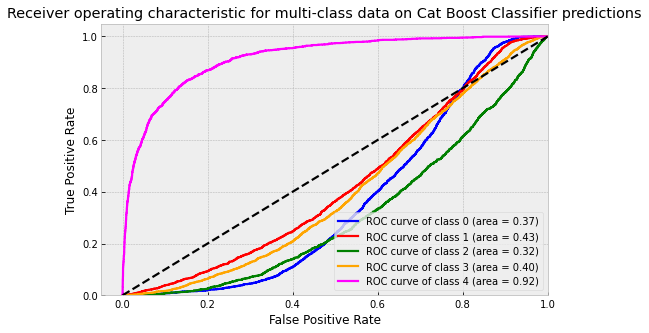

In [172]:
from itertools import cycle
fpr = dict()
tpr = dict()
roc_auc = dict()
plt.figure(figsize=(8,5))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y1_test[:,i], cat_pred_proba[:, i],)
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green','orange','magenta'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2.2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2.2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data on Cat Boost Classifier predictions')
plt.legend(loc="lower right")
plt.show()

In [173]:
tweety_test

33688   -1
5884     1
30562    2
17168   -1
4785    -1
        ..
39278   -1
35368   -1
20263    0
36899    2
16690    2
Name: Sentiment, Length: 12348, dtype: int64

In [174]:
tweet_df.Sentiment

0                   Neutral
1                  Positive
2                  Positive
3                  Positive
4        Extremely Negative
                ...        
41152               Neutral
41153    Extremely Negative
41154              Positive
41155               Neutral
41156              Negative
Name: Sentiment, Length: 41157, dtype: object

In [176]:
y1_test

array([[0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]])

In [177]:
cat_pred_proba

array([[0.04988727, 0.21271031, 0.54449392, 0.15697991, 0.03592859],
       [0.07442002, 0.28892213, 0.20276554, 0.29077986, 0.14311244],
       [0.01762394, 0.07253907, 0.03161377, 0.32364105, 0.55458218],
       ...,
       [0.38961105, 0.33463174, 0.05365779, 0.15540971, 0.0666897 ],
       [0.02427298, 0.06241705, 0.02964082, 0.3257839 , 0.55788524],
       [0.04861181, 0.21489349, 0.08661798, 0.40670556, 0.24317116]])

#### Catboost Classifier with balanced class weights and after tuning

In [94]:
cat_model2=CatBoostClassifier(loss_function='MultiClass',n_estimators=5000,\
                              auto_class_weights='SqrtBalanced',\
                              early_stopping_rounds=30,learning_rate=0.25,depth=3)  #5000
cat_model2.fit(cat_df_train,eval_set=cat_df_test,)

0:	learn: 1.5684719	test: 1.5713031	best: 1.5713031 (0)	total: 123ms	remaining: 10m 15s
1:	learn: 1.5448446	test: 1.5480919	best: 1.5480919 (1)	total: 263ms	remaining: 10m 57s
2:	learn: 1.5246189	test: 1.5292103	best: 1.5292103 (2)	total: 381ms	remaining: 10m 34s
3:	learn: 1.5109000	test: 1.5160633	best: 1.5160633 (3)	total: 521ms	remaining: 10m 50s
4:	learn: 1.5021651	test: 1.5091170	best: 1.5091170 (4)	total: 630ms	remaining: 10m 28s
5:	learn: 1.4911715	test: 1.4978751	best: 1.4978751 (5)	total: 750ms	remaining: 10m 24s
6:	learn: 1.4907588	test: 1.4972106	best: 1.4972106 (6)	total: 878ms	remaining: 10m 26s
7:	learn: 1.4820213	test: 1.4885912	best: 1.4885912 (7)	total: 991ms	remaining: 10m 18s
8:	learn: 1.4818220	test: 1.4880726	best: 1.4880726 (8)	total: 1.12s	remaining: 10m 20s
9:	learn: 1.4725696	test: 1.4770632	best: 1.4770632 (9)	total: 1.26s	remaining: 10m 27s
10:	learn: 1.4644911	test: 1.4691732	best: 1.4691732 (10)	total: 1.38s	remaining: 10m 26s
11:	learn: 1.4594498	test: 1.4

92:	learn: 1.3034325	test: 1.3219653	best: 1.3218342 (91)	total: 11.3s	remaining: 9m 54s
93:	learn: 1.3018092	test: 1.3206898	best: 1.3206898 (93)	total: 11.4s	remaining: 9m 53s
94:	learn: 1.3004675	test: 1.3194886	best: 1.3194886 (94)	total: 11.5s	remaining: 9m 52s
95:	learn: 1.2998664	test: 1.3191285	best: 1.3191285 (95)	total: 11.6s	remaining: 9m 51s
96:	learn: 1.2984312	test: 1.3175568	best: 1.3175568 (96)	total: 11.7s	remaining: 9m 51s
97:	learn: 1.2977433	test: 1.3169220	best: 1.3169220 (97)	total: 11.8s	remaining: 9m 50s
98:	learn: 1.2964965	test: 1.3158463	best: 1.3158463 (98)	total: 11.9s	remaining: 9m 49s
99:	learn: 1.2954789	test: 1.3151557	best: 1.3151557 (99)	total: 12s	remaining: 9m 49s
100:	learn: 1.2938761	test: 1.3140845	best: 1.3140845 (100)	total: 12.1s	remaining: 9m 48s
101:	learn: 1.2931683	test: 1.3134694	best: 1.3134694 (101)	total: 12.2s	remaining: 9m 47s
102:	learn: 1.2925701	test: 1.3129022	best: 1.3129022 (102)	total: 12.4s	remaining: 9m 47s
103:	learn: 1.291

184:	learn: 1.2265742	test: 1.2555995	best: 1.2555995 (184)	total: 21.5s	remaining: 9m 18s
185:	learn: 1.2262519	test: 1.2556912	best: 1.2555995 (184)	total: 21.6s	remaining: 9m 19s
186:	learn: 1.2253980	test: 1.2548817	best: 1.2548817 (186)	total: 21.8s	remaining: 9m 19s
187:	learn: 1.2243946	test: 1.2540746	best: 1.2540746 (187)	total: 21.9s	remaining: 9m 20s
188:	learn: 1.2238057	test: 1.2535259	best: 1.2535259 (188)	total: 22s	remaining: 9m 20s
189:	learn: 1.2228980	test: 1.2527578	best: 1.2527578 (189)	total: 22.2s	remaining: 9m 21s
190:	learn: 1.2222343	test: 1.2521221	best: 1.2521221 (190)	total: 22.3s	remaining: 9m 21s
191:	learn: 1.2214333	test: 1.2514676	best: 1.2514676 (191)	total: 22.4s	remaining: 9m 21s
192:	learn: 1.2207499	test: 1.2509780	best: 1.2509780 (192)	total: 22.6s	remaining: 9m 22s
193:	learn: 1.2199384	test: 1.2501661	best: 1.2501661 (193)	total: 22.7s	remaining: 9m 22s
194:	learn: 1.2197015	test: 1.2501786	best: 1.2501661 (193)	total: 22.8s	remaining: 9m 23s
1

276:	learn: 1.1828284	test: 1.2217942	best: 1.2217942 (276)	total: 34.4s	remaining: 9m 47s
277:	learn: 1.1824276	test: 1.2215224	best: 1.2215224 (277)	total: 34.6s	remaining: 9m 47s
278:	learn: 1.1821306	test: 1.2213538	best: 1.2213538 (278)	total: 34.7s	remaining: 9m 47s
279:	learn: 1.1816993	test: 1.2210862	best: 1.2210862 (279)	total: 34.9s	remaining: 9m 47s
280:	learn: 1.1814548	test: 1.2208914	best: 1.2208914 (280)	total: 35s	remaining: 9m 47s
281:	learn: 1.1812347	test: 1.2207866	best: 1.2207866 (281)	total: 35.1s	remaining: 9m 47s
282:	learn: 1.1810135	test: 1.2207237	best: 1.2207237 (282)	total: 35.3s	remaining: 9m 47s
283:	learn: 1.1803625	test: 1.2201539	best: 1.2201539 (283)	total: 35.4s	remaining: 9m 47s
284:	learn: 1.1799949	test: 1.2199192	best: 1.2199192 (284)	total: 35.5s	remaining: 9m 47s
285:	learn: 1.1795420	test: 1.2197597	best: 1.2197597 (285)	total: 35.7s	remaining: 9m 47s
286:	learn: 1.1794301	test: 1.2197402	best: 1.2197402 (286)	total: 35.8s	remaining: 9m 48s
2

367:	learn: 1.1520143	test: 1.2011591	best: 1.2011591 (367)	total: 47s	remaining: 9m 51s
368:	learn: 1.1516953	test: 1.2008300	best: 1.2008300 (368)	total: 47.1s	remaining: 9m 51s
369:	learn: 1.1514010	test: 1.2006376	best: 1.2006376 (369)	total: 47.2s	remaining: 9m 51s
370:	learn: 1.1509960	test: 1.2003999	best: 1.2003999 (370)	total: 47.4s	remaining: 9m 51s
371:	learn: 1.1509228	test: 1.2002849	best: 1.2002849 (371)	total: 47.5s	remaining: 9m 51s
372:	learn: 1.1508695	test: 1.2004357	best: 1.2002849 (371)	total: 47.6s	remaining: 9m 51s
373:	learn: 1.1505922	test: 1.2001885	best: 1.2001885 (373)	total: 47.8s	remaining: 9m 51s
374:	learn: 1.1504448	test: 1.2000883	best: 1.2000883 (374)	total: 47.9s	remaining: 9m 50s
375:	learn: 1.1501357	test: 1.1997497	best: 1.1997497 (375)	total: 48.1s	remaining: 9m 50s
376:	learn: 1.1500088	test: 1.1999284	best: 1.1997497 (375)	total: 48.2s	remaining: 9m 50s
377:	learn: 1.1496330	test: 1.1997691	best: 1.1997497 (375)	total: 48.3s	remaining: 9m 50s
3

459:	learn: 1.1301502	test: 1.1869182	best: 1.1869182 (459)	total: 59.6s	remaining: 9m 47s
460:	learn: 1.1299303	test: 1.1867405	best: 1.1867405 (460)	total: 59.7s	remaining: 9m 47s
461:	learn: 1.1295753	test: 1.1866084	best: 1.1866084 (461)	total: 59.8s	remaining: 9m 47s
462:	learn: 1.1293639	test: 1.1864627	best: 1.1864627 (462)	total: 60s	remaining: 9m 47s
463:	learn: 1.1291480	test: 1.1863691	best: 1.1863691 (463)	total: 1m	remaining: 9m 47s
464:	learn: 1.1287757	test: 1.1862603	best: 1.1862603 (464)	total: 1m	remaining: 9m 47s
465:	learn: 1.1284728	test: 1.1858277	best: 1.1858277 (465)	total: 1m	remaining: 9m 47s
466:	learn: 1.1284121	test: 1.1858686	best: 1.1858277 (465)	total: 1m	remaining: 9m 47s
467:	learn: 1.1281639	test: 1.1856309	best: 1.1856309 (467)	total: 1m	remaining: 9m 47s
468:	learn: 1.1279653	test: 1.1855005	best: 1.1855005 (468)	total: 1m	remaining: 9m 47s
469:	learn: 1.1276789	test: 1.1853054	best: 1.1853054 (469)	total: 1m	remaining: 9m 47s
470:	learn: 1.1274772	

551:	learn: 1.1114977	test: 1.1758909	best: 1.1758198 (549)	total: 1m 12s	remaining: 9m 42s
552:	learn: 1.1113609	test: 1.1759719	best: 1.1758198 (549)	total: 1m 12s	remaining: 9m 42s
553:	learn: 1.1112271	test: 1.1758782	best: 1.1758198 (549)	total: 1m 12s	remaining: 9m 42s
554:	learn: 1.1109916	test: 1.1756131	best: 1.1756131 (554)	total: 1m 12s	remaining: 9m 42s
555:	learn: 1.1108586	test: 1.1755957	best: 1.1755957 (555)	total: 1m 12s	remaining: 9m 42s
556:	learn: 1.1107598	test: 1.1756072	best: 1.1755957 (555)	total: 1m 12s	remaining: 9m 42s
557:	learn: 1.1107103	test: 1.1755678	best: 1.1755678 (557)	total: 1m 13s	remaining: 9m 42s
558:	learn: 1.1104652	test: 1.1753539	best: 1.1753539 (558)	total: 1m 13s	remaining: 9m 41s
559:	learn: 1.1103009	test: 1.1753443	best: 1.1753443 (559)	total: 1m 13s	remaining: 9m 41s
560:	learn: 1.1099809	test: 1.1750493	best: 1.1750493 (560)	total: 1m 13s	remaining: 9m 41s
561:	learn: 1.1097779	test: 1.1750362	best: 1.1750362 (561)	total: 1m 13s	remain

641:	learn: 1.0966969	test: 1.1681172	best: 1.1681172 (641)	total: 1m 24s	remaining: 9m 35s
642:	learn: 1.0965259	test: 1.1678500	best: 1.1678500 (642)	total: 1m 24s	remaining: 9m 35s
643:	learn: 1.0963534	test: 1.1678257	best: 1.1678257 (643)	total: 1m 25s	remaining: 9m 35s
644:	learn: 1.0959978	test: 1.1677946	best: 1.1677946 (644)	total: 1m 25s	remaining: 9m 35s
645:	learn: 1.0957227	test: 1.1675848	best: 1.1675848 (645)	total: 1m 25s	remaining: 9m 35s
646:	learn: 1.0954984	test: 1.1674887	best: 1.1674887 (646)	total: 1m 25s	remaining: 9m 35s
647:	learn: 1.0953838	test: 1.1675258	best: 1.1674887 (646)	total: 1m 25s	remaining: 9m 35s
648:	learn: 1.0952324	test: 1.1672768	best: 1.1672768 (648)	total: 1m 25s	remaining: 9m 35s
649:	learn: 1.0951732	test: 1.1672708	best: 1.1672708 (649)	total: 1m 25s	remaining: 9m 35s
650:	learn: 1.0950117	test: 1.1670706	best: 1.1670706 (650)	total: 1m 26s	remaining: 9m 35s
651:	learn: 1.0949339	test: 1.1670832	best: 1.1670706 (650)	total: 1m 26s	remain

731:	learn: 1.0822522	test: 1.1608332	best: 1.1608240 (730)	total: 1m 37s	remaining: 9m 28s
732:	learn: 1.0821848	test: 1.1607830	best: 1.1607830 (732)	total: 1m 37s	remaining: 9m 28s
733:	learn: 1.0821567	test: 1.1607788	best: 1.1607788 (733)	total: 1m 37s	remaining: 9m 28s
734:	learn: 1.0820297	test: 1.1607700	best: 1.1607700 (734)	total: 1m 37s	remaining: 9m 28s
735:	learn: 1.0818849	test: 1.1607244	best: 1.1607244 (735)	total: 1m 38s	remaining: 9m 28s
736:	learn: 1.0817782	test: 1.1606932	best: 1.1606932 (736)	total: 1m 38s	remaining: 9m 28s
737:	learn: 1.0815819	test: 1.1605788	best: 1.1605788 (737)	total: 1m 38s	remaining: 9m 28s
738:	learn: 1.0813036	test: 1.1605024	best: 1.1605024 (738)	total: 1m 38s	remaining: 9m 28s
739:	learn: 1.0811936	test: 1.1604833	best: 1.1604833 (739)	total: 1m 38s	remaining: 9m 27s
740:	learn: 1.0811432	test: 1.1607367	best: 1.1604833 (739)	total: 1m 38s	remaining: 9m 27s
741:	learn: 1.0809174	test: 1.1605236	best: 1.1604833 (739)	total: 1m 38s	remain

821:	learn: 1.0709389	test: 1.1560421	best: 1.1560421 (821)	total: 1m 49s	remaining: 9m 18s
822:	learn: 1.0707572	test: 1.1558829	best: 1.1558829 (822)	total: 1m 50s	remaining: 9m 18s
823:	learn: 1.0705980	test: 1.1557993	best: 1.1557993 (823)	total: 1m 50s	remaining: 9m 18s
824:	learn: 1.0704362	test: 1.1557372	best: 1.1557372 (824)	total: 1m 50s	remaining: 9m 18s
825:	learn: 1.0702294	test: 1.1554862	best: 1.1554862 (825)	total: 1m 50s	remaining: 9m 18s
826:	learn: 1.0701684	test: 1.1555118	best: 1.1554862 (825)	total: 1m 50s	remaining: 9m 18s
827:	learn: 1.0699802	test: 1.1554296	best: 1.1554296 (827)	total: 1m 50s	remaining: 9m 18s
828:	learn: 1.0697594	test: 1.1552564	best: 1.1552564 (828)	total: 1m 50s	remaining: 9m 18s
829:	learn: 1.0695388	test: 1.1551854	best: 1.1551854 (829)	total: 1m 51s	remaining: 9m 18s
830:	learn: 1.0694263	test: 1.1552231	best: 1.1551854 (829)	total: 1m 51s	remaining: 9m 17s
831:	learn: 1.0692944	test: 1.1551227	best: 1.1551227 (831)	total: 1m 51s	remain

911:	learn: 1.0584924	test: 1.1512581	best: 1.1512581 (911)	total: 2m 2s	remaining: 9m 10s
912:	learn: 1.0583661	test: 1.1512125	best: 1.1512125 (912)	total: 2m 3s	remaining: 9m 10s
913:	learn: 1.0581627	test: 1.1510409	best: 1.1510409 (913)	total: 2m 3s	remaining: 9m 10s
914:	learn: 1.0580259	test: 1.1510110	best: 1.1510110 (914)	total: 2m 3s	remaining: 9m 10s
915:	learn: 1.0579700	test: 1.1510078	best: 1.1510078 (915)	total: 2m 3s	remaining: 9m 10s
916:	learn: 1.0578302	test: 1.1510729	best: 1.1510078 (915)	total: 2m 3s	remaining: 9m 10s
917:	learn: 1.0577422	test: 1.1511620	best: 1.1510078 (915)	total: 2m 3s	remaining: 9m 10s
918:	learn: 1.0576016	test: 1.1509006	best: 1.1509006 (918)	total: 2m 3s	remaining: 9m 10s
919:	learn: 1.0574221	test: 1.1507265	best: 1.1507265 (919)	total: 2m 4s	remaining: 9m 10s
920:	learn: 1.0572481	test: 1.1507085	best: 1.1507085 (920)	total: 2m 4s	remaining: 9m 10s
921:	learn: 1.0570695	test: 1.1505887	best: 1.1505887 (921)	total: 2m 4s	remaining: 9m 10s

1003:	learn: 1.0477413	test: 1.1467512	best: 1.1467512 (1003)	total: 2m 15s	remaining: 8m 58s
1004:	learn: 1.0476185	test: 1.1466295	best: 1.1466295 (1004)	total: 2m 15s	remaining: 8m 58s
1005:	learn: 1.0474360	test: 1.1466383	best: 1.1466295 (1004)	total: 2m 15s	remaining: 8m 58s
1006:	learn: 1.0473050	test: 1.1466898	best: 1.1466295 (1004)	total: 2m 15s	remaining: 8m 58s
1007:	learn: 1.0472699	test: 1.1465204	best: 1.1465204 (1007)	total: 2m 15s	remaining: 8m 58s
1008:	learn: 1.0470543	test: 1.1464447	best: 1.1464447 (1008)	total: 2m 16s	remaining: 8m 57s
1009:	learn: 1.0470002	test: 1.1464566	best: 1.1464447 (1008)	total: 2m 16s	remaining: 8m 57s
1010:	learn: 1.0469008	test: 1.1463225	best: 1.1463225 (1010)	total: 2m 16s	remaining: 8m 57s
1011:	learn: 1.0468361	test: 1.1463382	best: 1.1463225 (1010)	total: 2m 16s	remaining: 8m 57s
1012:	learn: 1.0467674	test: 1.1463401	best: 1.1463225 (1010)	total: 2m 16s	remaining: 8m 57s
1013:	learn: 1.0465665	test: 1.1462974	best: 1.1462974 (1013

1091:	learn: 1.0381427	test: 1.1439544	best: 1.1438936 (1080)	total: 2m 27s	remaining: 8m 47s
1092:	learn: 1.0380196	test: 1.1438899	best: 1.1438899 (1092)	total: 2m 27s	remaining: 8m 46s
1093:	learn: 1.0379530	test: 1.1441054	best: 1.1438899 (1092)	total: 2m 27s	remaining: 8m 46s
1094:	learn: 1.0378297	test: 1.1441307	best: 1.1438899 (1092)	total: 2m 27s	remaining: 8m 46s
1095:	learn: 1.0377117	test: 1.1441191	best: 1.1438899 (1092)	total: 2m 27s	remaining: 8m 46s
1096:	learn: 1.0375352	test: 1.1439599	best: 1.1438899 (1092)	total: 2m 27s	remaining: 8m 46s
1097:	learn: 1.0374437	test: 1.1438930	best: 1.1438899 (1092)	total: 2m 28s	remaining: 8m 46s
1098:	learn: 1.0373570	test: 1.1439036	best: 1.1438899 (1092)	total: 2m 28s	remaining: 8m 46s
1099:	learn: 1.0372786	test: 1.1439212	best: 1.1438899 (1092)	total: 2m 28s	remaining: 8m 45s
1100:	learn: 1.0372489	test: 1.1439220	best: 1.1438899 (1092)	total: 2m 28s	remaining: 8m 45s
1101:	learn: 1.0371961	test: 1.1439240	best: 1.1438899 (1092

1179:	learn: 1.0295901	test: 1.1408101	best: 1.1404818 (1174)	total: 2m 39s	remaining: 8m 35s
1180:	learn: 1.0294920	test: 1.1407902	best: 1.1404818 (1174)	total: 2m 39s	remaining: 8m 35s
1181:	learn: 1.0294746	test: 1.1408159	best: 1.1404818 (1174)	total: 2m 39s	remaining: 8m 35s
1182:	learn: 1.0294339	test: 1.1408080	best: 1.1404818 (1174)	total: 2m 39s	remaining: 8m 35s
1183:	learn: 1.0293996	test: 1.1408106	best: 1.1404818 (1174)	total: 2m 39s	remaining: 8m 35s
1184:	learn: 1.0293234	test: 1.1408080	best: 1.1404818 (1174)	total: 2m 40s	remaining: 8m 35s
1185:	learn: 1.0292765	test: 1.1407812	best: 1.1404818 (1174)	total: 2m 40s	remaining: 8m 35s
1186:	learn: 1.0291410	test: 1.1406605	best: 1.1404818 (1174)	total: 2m 40s	remaining: 8m 34s
1187:	learn: 1.0290209	test: 1.1406657	best: 1.1404818 (1174)	total: 2m 40s	remaining: 8m 34s
1188:	learn: 1.0289266	test: 1.1407104	best: 1.1404818 (1174)	total: 2m 40s	remaining: 8m 34s
1189:	learn: 1.0288364	test: 1.1406589	best: 1.1404818 (1174

1267:	learn: 1.0220762	test: 1.1388626	best: 1.1387861 (1264)	total: 2m 52s	remaining: 8m 26s
1268:	learn: 1.0219551	test: 1.1388941	best: 1.1387861 (1264)	total: 2m 52s	remaining: 8m 26s
1269:	learn: 1.0218424	test: 1.1389236	best: 1.1387861 (1264)	total: 2m 52s	remaining: 8m 26s
1270:	learn: 1.0217455	test: 1.1389215	best: 1.1387861 (1264)	total: 2m 52s	remaining: 8m 26s
1271:	learn: 1.0216596	test: 1.1388634	best: 1.1387861 (1264)	total: 2m 52s	remaining: 8m 26s
1272:	learn: 1.0216192	test: 1.1387043	best: 1.1387043 (1272)	total: 2m 52s	remaining: 8m 26s
1273:	learn: 1.0215496	test: 1.1387162	best: 1.1387043 (1272)	total: 2m 53s	remaining: 8m 26s
1274:	learn: 1.0214935	test: 1.1387275	best: 1.1387043 (1272)	total: 2m 53s	remaining: 8m 25s
1275:	learn: 1.0213025	test: 1.1387204	best: 1.1387043 (1272)	total: 2m 53s	remaining: 8m 25s
1276:	learn: 1.0211891	test: 1.1386659	best: 1.1386659 (1276)	total: 2m 53s	remaining: 8m 25s
1277:	learn: 1.0210402	test: 1.1386922	best: 1.1386659 (1276

1355:	learn: 1.0135727	test: 1.1359488	best: 1.1359230 (1354)	total: 3m 6s	remaining: 8m 21s
1356:	learn: 1.0135363	test: 1.1358898	best: 1.1358898 (1356)	total: 3m 6s	remaining: 8m 21s
1357:	learn: 1.0134802	test: 1.1359414	best: 1.1358898 (1356)	total: 3m 6s	remaining: 8m 21s
1358:	learn: 1.0134475	test: 1.1359856	best: 1.1358898 (1356)	total: 3m 6s	remaining: 8m 20s
1359:	learn: 1.0133441	test: 1.1360202	best: 1.1358898 (1356)	total: 3m 7s	remaining: 8m 20s
1360:	learn: 1.0133149	test: 1.1359643	best: 1.1358898 (1356)	total: 3m 7s	remaining: 8m 20s
1361:	learn: 1.0132043	test: 1.1359069	best: 1.1358898 (1356)	total: 3m 7s	remaining: 8m 20s
1362:	learn: 1.0131298	test: 1.1359154	best: 1.1358898 (1356)	total: 3m 7s	remaining: 8m 20s
1363:	learn: 1.0130992	test: 1.1359408	best: 1.1358898 (1356)	total: 3m 7s	remaining: 8m 20s
1364:	learn: 1.0130328	test: 1.1359160	best: 1.1358898 (1356)	total: 3m 7s	remaining: 8m 20s
1365:	learn: 1.0129595	test: 1.1358907	best: 1.1358898 (1356)	total: 3

1443:	learn: 1.0061885	test: 1.1338436	best: 1.1338436 (1443)	total: 3m 21s	remaining: 8m 15s
1444:	learn: 1.0060919	test: 1.1337667	best: 1.1337667 (1444)	total: 3m 21s	remaining: 8m 15s
1445:	learn: 1.0059737	test: 1.1338901	best: 1.1337667 (1444)	total: 3m 21s	remaining: 8m 15s
1446:	learn: 1.0058873	test: 1.1338688	best: 1.1337667 (1444)	total: 3m 21s	remaining: 8m 15s
1447:	learn: 1.0058319	test: 1.1338500	best: 1.1337667 (1444)	total: 3m 21s	remaining: 8m 15s
1448:	learn: 1.0057444	test: 1.1338307	best: 1.1337667 (1444)	total: 3m 22s	remaining: 8m 15s
1449:	learn: 1.0056609	test: 1.1338416	best: 1.1337667 (1444)	total: 3m 22s	remaining: 8m 15s
1450:	learn: 1.0055639	test: 1.1337718	best: 1.1337667 (1444)	total: 3m 22s	remaining: 8m 15s
1451:	learn: 1.0052864	test: 1.1336930	best: 1.1336930 (1451)	total: 3m 22s	remaining: 8m 15s
1452:	learn: 1.0052414	test: 1.1336923	best: 1.1336923 (1452)	total: 3m 22s	remaining: 8m 15s
1453:	learn: 1.0051558	test: 1.1336699	best: 1.1336699 (1453

1531:	learn: 0.9984423	test: 1.1313734	best: 1.1313734 (1531)	total: 3m 36s	remaining: 8m 11s
1532:	learn: 0.9983669	test: 1.1312796	best: 1.1312796 (1532)	total: 3m 37s	remaining: 8m 11s
1533:	learn: 0.9983430	test: 1.1312328	best: 1.1312328 (1533)	total: 3m 37s	remaining: 8m 10s
1534:	learn: 0.9983193	test: 1.1312288	best: 1.1312288 (1534)	total: 3m 37s	remaining: 8m 10s
1535:	learn: 0.9982840	test: 1.1312887	best: 1.1312288 (1534)	total: 3m 37s	remaining: 8m 10s
1536:	learn: 0.9981669	test: 1.1311411	best: 1.1311411 (1536)	total: 3m 37s	remaining: 8m 10s
1537:	learn: 0.9980437	test: 1.1309099	best: 1.1309099 (1537)	total: 3m 37s	remaining: 8m 10s
1538:	learn: 0.9978967	test: 1.1308738	best: 1.1308738 (1538)	total: 3m 38s	remaining: 8m 10s
1539:	learn: 0.9978108	test: 1.1308466	best: 1.1308466 (1539)	total: 3m 38s	remaining: 8m 10s
1540:	learn: 0.9977015	test: 1.1308094	best: 1.1308094 (1540)	total: 3m 38s	remaining: 8m 10s
1541:	learn: 0.9976032	test: 1.1307791	best: 1.1307791 (1541

1619:	learn: 0.9920685	test: 1.1294520	best: 1.1292692 (1616)	total: 3m 51s	remaining: 8m 2s
1620:	learn: 0.9919143	test: 1.1293657	best: 1.1292692 (1616)	total: 3m 51s	remaining: 8m 2s
1621:	learn: 0.9918049	test: 1.1293630	best: 1.1292692 (1616)	total: 3m 51s	remaining: 8m 2s
1622:	learn: 0.9917592	test: 1.1293875	best: 1.1292692 (1616)	total: 3m 51s	remaining: 8m 2s
1623:	learn: 0.9916836	test: 1.1293798	best: 1.1292692 (1616)	total: 3m 52s	remaining: 8m 2s
1624:	learn: 0.9916156	test: 1.1293458	best: 1.1292692 (1616)	total: 3m 52s	remaining: 8m 2s
1625:	learn: 0.9915940	test: 1.1294446	best: 1.1292692 (1616)	total: 3m 52s	remaining: 8m 2s
1626:	learn: 0.9915236	test: 1.1294274	best: 1.1292692 (1616)	total: 3m 52s	remaining: 8m 2s
1627:	learn: 0.9914503	test: 1.1293739	best: 1.1292692 (1616)	total: 3m 52s	remaining: 8m 2s
1628:	learn: 0.9913874	test: 1.1293891	best: 1.1292692 (1616)	total: 3m 52s	remaining: 8m 2s
1629:	learn: 0.9913448	test: 1.1295461	best: 1.1292692 (1616)	total: 3

1709:	learn: 0.9853379	test: 1.1285109	best: 1.1284006 (1708)	total: 4m 5s	remaining: 7m 52s
1710:	learn: 0.9852855	test: 1.1284939	best: 1.1284006 (1708)	total: 4m 5s	remaining: 7m 51s
1711:	learn: 0.9851872	test: 1.1284604	best: 1.1284006 (1708)	total: 4m 5s	remaining: 7m 51s
1712:	learn: 0.9851344	test: 1.1284824	best: 1.1284006 (1708)	total: 4m 5s	remaining: 7m 51s
1713:	learn: 0.9850635	test: 1.1284438	best: 1.1284006 (1708)	total: 4m 5s	remaining: 7m 51s
1714:	learn: 0.9850223	test: 1.1284316	best: 1.1284006 (1708)	total: 4m 6s	remaining: 7m 51s
1715:	learn: 0.9849901	test: 1.1284580	best: 1.1284006 (1708)	total: 4m 6s	remaining: 7m 51s
1716:	learn: 0.9849239	test: 1.1284458	best: 1.1284006 (1708)	total: 4m 6s	remaining: 7m 51s
1717:	learn: 0.9848811	test: 1.1284434	best: 1.1284006 (1708)	total: 4m 6s	remaining: 7m 50s
1718:	learn: 0.9848403	test: 1.1284541	best: 1.1284006 (1708)	total: 4m 6s	remaining: 7m 50s
1719:	learn: 0.9847512	test: 1.1282224	best: 1.1282224 (1719)	total: 4

1797:	learn: 0.9786801	test: 1.1268823	best: 1.1268823 (1797)	total: 4m 18s	remaining: 7m 39s
1798:	learn: 0.9785521	test: 1.1268325	best: 1.1268325 (1798)	total: 4m 18s	remaining: 7m 39s
1799:	learn: 0.9784921	test: 1.1267880	best: 1.1267880 (1799)	total: 4m 18s	remaining: 7m 39s
1800:	learn: 0.9784171	test: 1.1267551	best: 1.1267551 (1800)	total: 4m 18s	remaining: 7m 39s
1801:	learn: 0.9783617	test: 1.1267723	best: 1.1267551 (1800)	total: 4m 18s	remaining: 7m 38s
1802:	learn: 0.9782571	test: 1.1267528	best: 1.1267528 (1802)	total: 4m 18s	remaining: 7m 38s
1803:	learn: 0.9782029	test: 1.1267656	best: 1.1267528 (1802)	total: 4m 18s	remaining: 7m 38s
1804:	learn: 0.9781158	test: 1.1268680	best: 1.1267528 (1802)	total: 4m 19s	remaining: 7m 38s
1805:	learn: 0.9779656	test: 1.1267789	best: 1.1267528 (1802)	total: 4m 19s	remaining: 7m 38s
1806:	learn: 0.9779043	test: 1.1267641	best: 1.1267528 (1802)	total: 4m 19s	remaining: 7m 38s
1807:	learn: 0.9777979	test: 1.1266626	best: 1.1266626 (1807

1885:	learn: 0.9726610	test: 1.1252209	best: 1.1252209 (1885)	total: 4m 29s	remaining: 7m 25s
1886:	learn: 0.9725329	test: 1.1251648	best: 1.1251648 (1886)	total: 4m 29s	remaining: 7m 25s
1887:	learn: 0.9724950	test: 1.1251363	best: 1.1251363 (1887)	total: 4m 30s	remaining: 7m 25s
1888:	learn: 0.9724459	test: 1.1251397	best: 1.1251363 (1887)	total: 4m 30s	remaining: 7m 24s
1889:	learn: 0.9724081	test: 1.1251246	best: 1.1251246 (1889)	total: 4m 30s	remaining: 7m 24s
1890:	learn: 0.9723281	test: 1.1251706	best: 1.1251246 (1889)	total: 4m 30s	remaining: 7m 24s
1891:	learn: 0.9722487	test: 1.1251054	best: 1.1251054 (1891)	total: 4m 30s	remaining: 7m 24s
1892:	learn: 0.9721594	test: 1.1250732	best: 1.1250732 (1892)	total: 4m 30s	remaining: 7m 24s
1893:	learn: 0.9721175	test: 1.1250313	best: 1.1250313 (1893)	total: 4m 30s	remaining: 7m 24s
1894:	learn: 0.9720300	test: 1.1250784	best: 1.1250313 (1893)	total: 4m 31s	remaining: 7m 24s
1895:	learn: 0.9718909	test: 1.1251115	best: 1.1250313 (1893

1973:	learn: 0.9670055	test: 1.1244143	best: 1.1240866 (1959)	total: 4m 41s	remaining: 7m 11s
1974:	learn: 0.9669405	test: 1.1244466	best: 1.1240866 (1959)	total: 4m 41s	remaining: 7m 11s
1975:	learn: 0.9668874	test: 1.1244393	best: 1.1240866 (1959)	total: 4m 41s	remaining: 7m 11s
1976:	learn: 0.9668138	test: 1.1244258	best: 1.1240866 (1959)	total: 4m 42s	remaining: 7m 11s
1977:	learn: 0.9667607	test: 1.1244625	best: 1.1240866 (1959)	total: 4m 42s	remaining: 7m 11s
1978:	learn: 0.9666563	test: 1.1244372	best: 1.1240866 (1959)	total: 4m 42s	remaining: 7m 11s
1979:	learn: 0.9665984	test: 1.1242796	best: 1.1240866 (1959)	total: 4m 42s	remaining: 7m 10s
1980:	learn: 0.9664907	test: 1.1242273	best: 1.1240866 (1959)	total: 4m 42s	remaining: 7m 10s
1981:	learn: 0.9664170	test: 1.1242419	best: 1.1240866 (1959)	total: 4m 42s	remaining: 7m 10s
1982:	learn: 0.9663962	test: 1.1242823	best: 1.1240866 (1959)	total: 4m 42s	remaining: 7m 10s
1983:	learn: 0.9663035	test: 1.1242530	best: 1.1240866 (1959

2063:	learn: 0.9613947	test: 1.1229258	best: 1.1227570 (2056)	total: 4m 54s	remaining: 6m 59s
2064:	learn: 0.9613484	test: 1.1229159	best: 1.1227570 (2056)	total: 4m 54s	remaining: 6m 59s
2065:	learn: 0.9612892	test: 1.1228583	best: 1.1227570 (2056)	total: 4m 55s	remaining: 6m 59s
2066:	learn: 0.9612553	test: 1.1229077	best: 1.1227570 (2056)	total: 4m 55s	remaining: 6m 58s
2067:	learn: 0.9611792	test: 1.1228770	best: 1.1227570 (2056)	total: 4m 55s	remaining: 6m 58s
2068:	learn: 0.9610955	test: 1.1228635	best: 1.1227570 (2056)	total: 4m 55s	remaining: 6m 58s
2069:	learn: 0.9610657	test: 1.1228440	best: 1.1227570 (2056)	total: 4m 55s	remaining: 6m 58s
2070:	learn: 0.9609606	test: 1.1228184	best: 1.1227570 (2056)	total: 4m 55s	remaining: 6m 58s
2071:	learn: 0.9609124	test: 1.1228096	best: 1.1227570 (2056)	total: 4m 56s	remaining: 6m 58s
2072:	learn: 0.9608257	test: 1.1227870	best: 1.1227570 (2056)	total: 4m 56s	remaining: 6m 58s
2073:	learn: 0.9607925	test: 1.1227048	best: 1.1227048 (2073

In [95]:
cat_pred2=cat_model2.predict(cat_x_test)
cat_pred_proba2=cat_model2.predict_proba(cat_x_test)

In [96]:
print(cat_pred2)
print(cat_pred_proba2)

[[2]
 [1]
 [4]
 ...
 [0]
 [4]
 [4]]
[[0.0480803  0.21094577 0.47870703 0.22368305 0.03858386]
 [0.06272625 0.33889882 0.26018402 0.22138741 0.11680349]
 [0.00402522 0.06035158 0.00726514 0.15497313 0.77338494]
 ...
 [0.63083209 0.20124314 0.02975623 0.08986855 0.0483    ]
 [0.01764889 0.06137716 0.03547251 0.26643392 0.61906751]
 [0.06377202 0.20527998 0.07912685 0.29472241 0.35709874]]


In [97]:
#Confusion matrix:-
cm_cat2=confusion_matrix(cat_y_test,cat_pred2.reshape(-1))
cm_cat2=pd.crosstab(cat_y_test,cat_pred2.reshape(-1))
#ROC_AUC SCORE:-
cat_roc_score2=roc_auc_score(cat_y_test,cat_pred_proba2,multi_class='ovo',average='macro')
print('Cat Boost Classifier ROC score:',cat_roc_score2)

Cat Boost Classifier ROC score: 0.8350963064234863


In [134]:
from sklearn.preprocessing import label_binarize   # 
cat_y1_test = label_binarize(cat_y_test.values.reshape(-1,1),classes=[0,1,2,3,4] )#classes=['Neutral', 'Positive', 'Extremely Negative', 'Negative','Extremely Positive'])

In [135]:
cat_y1_test

array([[0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]])

In [136]:
n_classes=cat_y1_test.shape[1]
n_classes

5

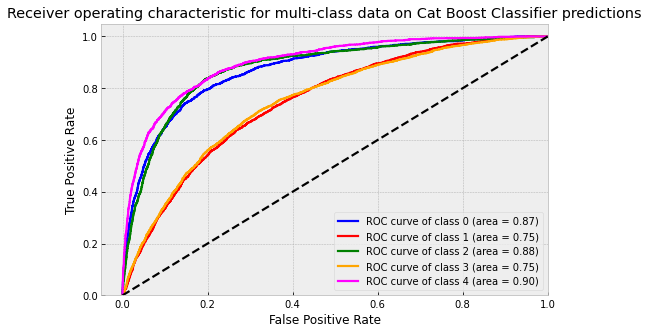

In [137]:
from itertools import cycle
fpr = dict()
tpr = dict()
roc_auc = dict()
plt.figure(figsize=(8,5))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(cat_y1_test[:,i], cat_pred_proba2[:, i],)
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green','orange','magenta'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2.2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2.2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data on Cat Boost Classifier predictions')
plt.legend(loc="lower right")
plt.show()

In [196]:
print('Average Precision score of CatBoost Classifier: ',average_precision_score(cat_y1_test,cat_pred2))

Average Precision score of CatBoost Classifier:  0.09694233187551406


In [198]:
print('Average Recall score of CatBoost Classifier :' ,recall_score(cat_y_test,cat_pred2,average='macro'))

Average Recall score of CatBoost Classifier : 0.5620643071831279


In [139]:
print('F1 score for CatBoost classifier: ',f1_score(cat_y_test,cat_pred2,average='macro'))

F1 score for CatBoost classifier:  0.5486594471034187


In [140]:
print('Accuracy score for Catboost Classifier: ',accuracy_score(cat_y_test,cat_pred2))

Accuracy score for Catboost Classifier:  0.5459993521218011


In [201]:
print('Balanced accuracy score for CatBoost considering all class labels: ',balanced_accuracy_score(cat_y_test,cat_pred2))

Balanced accuracy score for CatBoost considering all class labels:  0.5620643071831279


In [141]:
print('CatBoost Classifier ROC score with class weight balance,defining cat,text features and hyperparameter tuning:',round(cat_roc_score2,4))

CatBoost Classifier ROC score with class weight balance,defining cat,text features and hyperparameter tuning: 0.8351


In [98]:
cat_model2.feature_names_

['Location', 'Year', 'Month', 'length', 'cleaned_tweet']

In [99]:
cat_model2.feature_importances_

array([ 0.        ,  0.        ,  0.36917745,  8.19652255, 91.43430001])

In [154]:
cat_model2.tree_count_

2074

In [104]:
features1=pd.DataFrame()
features1['Features']=cat_x_train.columns
features1['Support']=cat_model2.feature_importances_
features1.sort_values('Support',ascending=False,inplace=True)
features1.set_index('Features',inplace=True)

In [105]:
features1

Support
Features                
cleaned_tweet  91.434300
length          8.196523
Month           0.369177
Location        0.000000
Year            0.000000

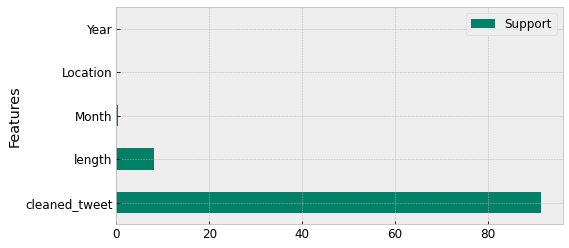

In [147]:
features1.plot(kind='barh',colormap='summer');
plt.rcParams['figure.figsize']=[8,4];
plt.show();

In [ ]:
#3000,lr-0.564,depth=3,srrtbalncd-0.833026,0.8287
#3000,lr-0.36,depth=3,srrtbalncd-0.83477, 0.83436(0.8327)
#3000,lr-0.24512,depth=3,srrtbalncd-0.83756,0.8351        lr-0.25,-0.835096
#1000,lr-0.24512,depth=7,srrtbalncd-0.82274
#1000,lr-0.24512,depth=5,srrtbalncd-8327871
#5000,lr-0.2,depth=3,srrtbalncd-0.000,0.834677
#5000,lr-0.2,depth=3,srrtbalncd-0.000,0.8354         -1
#5000,lr-0.156,depth=3,srrtbalncd-0.83856,0.8343     

In [70]:
cat_model3=CatBoostClassifier(loss_function='MultiClass',n_estimators=5000,\
                              auto_class_weights='SqrtBalanced',\
                              early_stopping_rounds=30,learning_rate=0.24,depth=4)  #5000
cat_model3.fit(cat_df_train,eval_set=cat_df_test,)

0:	learn: 1.5698777	test: 1.5726103	best: 1.5726103 (0)	total: 321ms	remaining: 26m 45s
1:	learn: 1.5385850	test: 1.5416263	best: 1.5416263 (1)	total: 497ms	remaining: 20m 42s
2:	learn: 1.5208666	test: 1.5263976	best: 1.5263976 (2)	total: 676ms	remaining: 18m 46s
3:	learn: 1.5084859	test: 1.5142450	best: 1.5142450 (3)	total: 883ms	remaining: 18m 23s
4:	learn: 1.4953302	test: 1.4994049	best: 1.4994049 (4)	total: 1.05s	remaining: 17m 32s
5:	learn: 1.4811151	test: 1.4860299	best: 1.4860299 (5)	total: 1.2s	remaining: 16m 41s
6:	learn: 1.4737940	test: 1.4798253	best: 1.4798253 (6)	total: 1.36s	remaining: 16m 12s
7:	learn: 1.4732422	test: 1.4789176	best: 1.4789176 (7)	total: 1.56s	remaining: 16m 12s
8:	learn: 1.4728419	test: 1.4786231	best: 1.4786231 (8)	total: 1.77s	remaining: 16m 22s
9:	learn: 1.4651503	test: 1.4712706	best: 1.4712706 (9)	total: 1.95s	remaining: 16m 13s
10:	learn: 1.4568164	test: 1.4640084	best: 1.4640084 (10)	total: 2.13s	remaining: 16m 5s
11:	learn: 1.4522268	test: 1.459

93:	learn: 1.2701092	test: 1.2937242	best: 1.2937242 (93)	total: 17.5s	remaining: 15m 13s
94:	learn: 1.2686220	test: 1.2926034	best: 1.2926034 (94)	total: 17.7s	remaining: 15m 11s
95:	learn: 1.2673013	test: 1.2914319	best: 1.2914319 (95)	total: 17.8s	remaining: 15m 11s
96:	learn: 1.2667887	test: 1.2910158	best: 1.2910158 (96)	total: 18s	remaining: 15m 10s
97:	learn: 1.2652407	test: 1.2894367	best: 1.2894367 (97)	total: 18.2s	remaining: 15m 8s
98:	learn: 1.2640004	test: 1.2886934	best: 1.2886934 (98)	total: 18.3s	remaining: 15m 7s
99:	learn: 1.2624168	test: 1.2873930	best: 1.2873930 (99)	total: 18.5s	remaining: 15m 6s
100:	learn: 1.2614117	test: 1.2867300	best: 1.2867300 (100)	total: 18.7s	remaining: 15m 5s
101:	learn: 1.2607870	test: 1.2863442	best: 1.2863442 (101)	total: 18.8s	remaining: 15m 4s
102:	learn: 1.2594844	test: 1.2851628	best: 1.2851628 (102)	total: 19s	remaining: 15m 3s
103:	learn: 1.2590959	test: 1.2847902	best: 1.2847902 (103)	total: 19.2s	remaining: 15m 2s
104:	learn: 1

183:	learn: 1.1982842	test: 1.2368571	best: 1.2368571 (183)	total: 36.5s	remaining: 15m 56s
184:	learn: 1.1975536	test: 1.2362618	best: 1.2362618 (184)	total: 36.7s	remaining: 15m 56s
185:	learn: 1.1970616	test: 1.2358840	best: 1.2358840 (185)	total: 37s	remaining: 15m 56s
186:	learn: 1.1961722	test: 1.2353278	best: 1.2353278 (186)	total: 37.1s	remaining: 15m 56s
187:	learn: 1.1953305	test: 1.2344613	best: 1.2344613 (187)	total: 37.4s	remaining: 15m 56s
188:	learn: 1.1946429	test: 1.2338274	best: 1.2338274 (188)	total: 37.6s	remaining: 15m 56s
189:	learn: 1.1940516	test: 1.2334774	best: 1.2334774 (189)	total: 37.8s	remaining: 15m 56s
190:	learn: 1.1938942	test: 1.2335011	best: 1.2334774 (189)	total: 38s	remaining: 15m 56s
191:	learn: 1.1934901	test: 1.2332322	best: 1.2332322 (191)	total: 38.2s	remaining: 15m 56s
192:	learn: 1.1929062	test: 1.2327833	best: 1.2327833 (192)	total: 38.4s	remaining: 15m 55s
193:	learn: 1.1922220	test: 1.2322647	best: 1.2322647 (193)	total: 38.6s	remaining: 

274:	learn: 1.1547149	test: 1.2053800	best: 1.2053800 (274)	total: 55.5s	remaining: 15m 53s
275:	learn: 1.1542614	test: 1.2049621	best: 1.2049621 (275)	total: 55.7s	remaining: 15m 53s
276:	learn: 1.1537381	test: 1.2046987	best: 1.2046987 (276)	total: 55.9s	remaining: 15m 52s
277:	learn: 1.1535690	test: 1.2045141	best: 1.2045141 (277)	total: 56.1s	remaining: 15m 52s
278:	learn: 1.1530149	test: 1.2040772	best: 1.2040772 (278)	total: 56.3s	remaining: 15m 52s
279:	learn: 1.1525275	test: 1.2038770	best: 1.2038770 (279)	total: 56.5s	remaining: 15m 52s
280:	learn: 1.1523192	test: 1.2040844	best: 1.2038770 (279)	total: 56.7s	remaining: 15m 52s
281:	learn: 1.1519496	test: 1.2040654	best: 1.2038770 (279)	total: 56.9s	remaining: 15m 51s
282:	learn: 1.1513771	test: 1.2035354	best: 1.2035354 (282)	total: 57.1s	remaining: 15m 51s
283:	learn: 1.1513075	test: 1.2035336	best: 1.2035336 (283)	total: 57.3s	remaining: 15m 51s
284:	learn: 1.1507729	test: 1.2031894	best: 1.2031894 (284)	total: 57.5s	remaini

365:	learn: 1.1243493	test: 1.1878319	best: 1.1878319 (365)	total: 1m 14s	remaining: 15m 38s
366:	learn: 1.1239974	test: 1.1877209	best: 1.1877209 (366)	total: 1m 14s	remaining: 15m 38s
367:	learn: 1.1239175	test: 1.1877156	best: 1.1877156 (367)	total: 1m 14s	remaining: 15m 37s
368:	learn: 1.1234107	test: 1.1875647	best: 1.1875647 (368)	total: 1m 14s	remaining: 15m 37s
369:	learn: 1.1231607	test: 1.1873932	best: 1.1873932 (369)	total: 1m 14s	remaining: 15m 37s
370:	learn: 1.1228771	test: 1.1871631	best: 1.1871631 (370)	total: 1m 15s	remaining: 15m 37s
371:	learn: 1.1227945	test: 1.1871858	best: 1.1871631 (370)	total: 1m 15s	remaining: 15m 37s
372:	learn: 1.1225618	test: 1.1870258	best: 1.1870258 (372)	total: 1m 15s	remaining: 15m 37s
373:	learn: 1.1224273	test: 1.1869203	best: 1.1869203 (373)	total: 1m 15s	remaining: 15m 37s
374:	learn: 1.1220889	test: 1.1868321	best: 1.1868321 (374)	total: 1m 15s	remaining: 15m 36s
375:	learn: 1.1217752	test: 1.1865826	best: 1.1865826 (375)	total: 1m 

454:	learn: 1.1023262	test: 1.1781230	best: 1.1781230 (454)	total: 1m 31s	remaining: 15m 17s
455:	learn: 1.1020621	test: 1.1778832	best: 1.1778832 (455)	total: 1m 32s	remaining: 15m 17s
456:	learn: 1.1018577	test: 1.1778926	best: 1.1778832 (455)	total: 1m 32s	remaining: 15m 17s
457:	learn: 1.1017766	test: 1.1779681	best: 1.1778832 (455)	total: 1m 32s	remaining: 15m 16s
458:	learn: 1.1015488	test: 1.1779088	best: 1.1778832 (455)	total: 1m 32s	remaining: 15m 16s
459:	learn: 1.1014238	test: 1.1778002	best: 1.1778002 (459)	total: 1m 32s	remaining: 15m 16s
460:	learn: 1.1011890	test: 1.1777332	best: 1.1777332 (460)	total: 1m 33s	remaining: 15m 16s
461:	learn: 1.1010083	test: 1.1777656	best: 1.1777332 (460)	total: 1m 33s	remaining: 15m 16s
462:	learn: 1.1008967	test: 1.1776656	best: 1.1776656 (462)	total: 1m 33s	remaining: 15m 15s
463:	learn: 1.1005631	test: 1.1774067	best: 1.1774067 (463)	total: 1m 33s	remaining: 15m 15s
464:	learn: 1.1001996	test: 1.1772568	best: 1.1772568 (464)	total: 1m 

543:	learn: 1.0822443	test: 1.1681929	best: 1.1681929 (543)	total: 1m 49s	remaining: 14m 57s
544:	learn: 1.0820465	test: 1.1680666	best: 1.1680666 (544)	total: 1m 49s	remaining: 14m 57s
545:	learn: 1.0818260	test: 1.1679119	best: 1.1679119 (545)	total: 1m 50s	remaining: 14m 57s
546:	learn: 1.0815339	test: 1.1676544	best: 1.1676544 (546)	total: 1m 50s	remaining: 14m 57s
547:	learn: 1.0813228	test: 1.1676357	best: 1.1676357 (547)	total: 1m 50s	remaining: 14m 57s
548:	learn: 1.0811812	test: 1.1674381	best: 1.1674381 (548)	total: 1m 50s	remaining: 14m 57s
549:	learn: 1.0809909	test: 1.1674710	best: 1.1674381 (548)	total: 1m 50s	remaining: 14m 56s
550:	learn: 1.0808538	test: 1.1674360	best: 1.1674360 (550)	total: 1m 51s	remaining: 14m 56s
551:	learn: 1.0806843	test: 1.1673601	best: 1.1673601 (551)	total: 1m 51s	remaining: 14m 56s
552:	learn: 1.0804612	test: 1.1672696	best: 1.1672696 (552)	total: 1m 51s	remaining: 14m 56s
553:	learn: 1.0800391	test: 1.1671110	best: 1.1671110 (553)	total: 1m 

632:	learn: 1.0648444	test: 1.1610564	best: 1.1610564 (632)	total: 2m 10s	remaining: 15m 1s
633:	learn: 1.0647647	test: 1.1610929	best: 1.1610564 (632)	total: 2m 10s	remaining: 15m 1s
634:	learn: 1.0646439	test: 1.1608400	best: 1.1608400 (634)	total: 2m 11s	remaining: 15m 1s
635:	learn: 1.0645219	test: 1.1607716	best: 1.1607716 (635)	total: 2m 11s	remaining: 15m 1s
636:	learn: 1.0643288	test: 1.1607684	best: 1.1607684 (636)	total: 2m 11s	remaining: 15m 1s
637:	learn: 1.0641873	test: 1.1607250	best: 1.1607250 (637)	total: 2m 11s	remaining: 15m 1s
638:	learn: 1.0638859	test: 1.1605308	best: 1.1605308 (638)	total: 2m 12s	remaining: 15m 1s
639:	learn: 1.0635699	test: 1.1602494	best: 1.1602494 (639)	total: 2m 12s	remaining: 15m 1s
640:	learn: 1.0634311	test: 1.1602375	best: 1.1602375 (640)	total: 2m 12s	remaining: 15m 1s
641:	learn: 1.0633290	test: 1.1602791	best: 1.1602375 (640)	total: 2m 12s	remaining: 15m 1s
642:	learn: 1.0631079	test: 1.1601796	best: 1.1601796 (642)	total: 2m 13s	remain

721:	learn: 1.0503841	test: 1.1565595	best: 1.1565595 (721)	total: 2m 34s	remaining: 15m 17s
722:	learn: 1.0503003	test: 1.1565937	best: 1.1565595 (721)	total: 2m 35s	remaining: 15m 17s
723:	learn: 1.0502378	test: 1.1564617	best: 1.1564617 (723)	total: 2m 35s	remaining: 15m 18s
724:	learn: 1.0499421	test: 1.1565326	best: 1.1564617 (723)	total: 2m 35s	remaining: 15m 18s
725:	learn: 1.0498234	test: 1.1564807	best: 1.1564617 (723)	total: 2m 36s	remaining: 15m 18s
726:	learn: 1.0496675	test: 1.1563490	best: 1.1563490 (726)	total: 2m 36s	remaining: 15m 18s
727:	learn: 1.0494737	test: 1.1562755	best: 1.1562755 (727)	total: 2m 36s	remaining: 15m 19s
728:	learn: 1.0494308	test: 1.1561451	best: 1.1561451 (728)	total: 2m 36s	remaining: 15m 19s
729:	learn: 1.0493182	test: 1.1559866	best: 1.1559866 (729)	total: 2m 37s	remaining: 15m 19s
730:	learn: 1.0492109	test: 1.1561433	best: 1.1559866 (729)	total: 2m 37s	remaining: 15m 19s
731:	learn: 1.0490624	test: 1.1561603	best: 1.1559866 (729)	total: 2m 

810:	learn: 1.0364182	test: 1.1504843	best: 1.1504843 (810)	total: 3m 8s	remaining: 16m 15s
811:	learn: 1.0363505	test: 1.1504675	best: 1.1504675 (811)	total: 3m 9s	remaining: 16m 15s
812:	learn: 1.0362029	test: 1.1504256	best: 1.1504256 (812)	total: 3m 9s	remaining: 16m 15s
813:	learn: 1.0360586	test: 1.1503869	best: 1.1503869 (813)	total: 3m 9s	remaining: 16m 16s
814:	learn: 1.0359501	test: 1.1503163	best: 1.1503163 (814)	total: 3m 10s	remaining: 16m 16s
815:	learn: 1.0357251	test: 1.1503261	best: 1.1503163 (814)	total: 3m 10s	remaining: 16m 17s
816:	learn: 1.0356287	test: 1.1503751	best: 1.1503163 (814)	total: 3m 10s	remaining: 16m 17s
817:	learn: 1.0354639	test: 1.1503306	best: 1.1503163 (814)	total: 3m 11s	remaining: 16m 18s
818:	learn: 1.0354208	test: 1.1503422	best: 1.1503163 (814)	total: 3m 11s	remaining: 16m 18s
819:	learn: 1.0352738	test: 1.1502441	best: 1.1502441 (819)	total: 3m 12s	remaining: 16m 18s
820:	learn: 1.0351042	test: 1.1502587	best: 1.1502441 (819)	total: 3m 12s	

899:	learn: 1.0244261	test: 1.1470747	best: 1.1470375 (898)	total: 3m 36s	remaining: 16m 27s
900:	learn: 1.0242504	test: 1.1470856	best: 1.1470375 (898)	total: 3m 36s	remaining: 16m 27s
901:	learn: 1.0240446	test: 1.1469321	best: 1.1469321 (901)	total: 3m 37s	remaining: 16m 27s
902:	learn: 1.0239780	test: 1.1468857	best: 1.1468857 (902)	total: 3m 37s	remaining: 16m 27s
903:	learn: 1.0236619	test: 1.1466779	best: 1.1466779 (903)	total: 3m 37s	remaining: 16m 27s
904:	learn: 1.0235490	test: 1.1465843	best: 1.1465843 (904)	total: 3m 38s	remaining: 16m 27s
905:	learn: 1.0234288	test: 1.1465087	best: 1.1465087 (905)	total: 3m 38s	remaining: 16m 27s
906:	learn: 1.0232365	test: 1.1464437	best: 1.1464437 (906)	total: 3m 38s	remaining: 16m 27s
907:	learn: 1.0230600	test: 1.1461643	best: 1.1461643 (907)	total: 3m 39s	remaining: 16m 28s
908:	learn: 1.0230132	test: 1.1461334	best: 1.1461334 (908)	total: 3m 39s	remaining: 16m 28s
909:	learn: 1.0228367	test: 1.1460431	best: 1.1460431 (909)	total: 3m 

988:	learn: 1.0130932	test: 1.1432441	best: 1.1432441 (988)	total: 4m 2s	remaining: 16m 24s
989:	learn: 1.0130051	test: 1.1433927	best: 1.1432441 (988)	total: 4m 3s	remaining: 16m 24s
990:	learn: 1.0129416	test: 1.1433819	best: 1.1432441 (988)	total: 4m 3s	remaining: 16m 24s
991:	learn: 1.0128629	test: 1.1433430	best: 1.1432441 (988)	total: 4m 3s	remaining: 16m 24s
992:	learn: 1.0126812	test: 1.1435293	best: 1.1432441 (988)	total: 4m 3s	remaining: 16m 24s
993:	learn: 1.0125136	test: 1.1434901	best: 1.1432441 (988)	total: 4m 4s	remaining: 16m 24s
994:	learn: 1.0123970	test: 1.1434854	best: 1.1432441 (988)	total: 4m 4s	remaining: 16m 24s
995:	learn: 1.0122940	test: 1.1434495	best: 1.1432441 (988)	total: 4m 4s	remaining: 16m 23s
996:	learn: 1.0121263	test: 1.1433976	best: 1.1432441 (988)	total: 4m 4s	remaining: 16m 23s
997:	learn: 1.0119263	test: 1.1433595	best: 1.1432441 (988)	total: 4m 5s	remaining: 16m 23s
998:	learn: 1.0118120	test: 1.1433964	best: 1.1432441 (988)	total: 4m 5s	remaini

1075:	learn: 1.0017403	test: 1.1414774	best: 1.1414774 (1075)	total: 4m 24s	remaining: 16m 6s
1076:	learn: 1.0016697	test: 1.1414587	best: 1.1414587 (1076)	total: 4m 25s	remaining: 16m 5s
1077:	learn: 1.0015243	test: 1.1413843	best: 1.1413843 (1077)	total: 4m 25s	remaining: 16m 5s
1078:	learn: 1.0014406	test: 1.1414027	best: 1.1413843 (1077)	total: 4m 25s	remaining: 16m 5s
1079:	learn: 1.0012857	test: 1.1413277	best: 1.1413277 (1079)	total: 4m 25s	remaining: 16m 5s
1080:	learn: 1.0012397	test: 1.1413270	best: 1.1413270 (1080)	total: 4m 26s	remaining: 16m 4s
1081:	learn: 1.0011701	test: 1.1412684	best: 1.1412684 (1081)	total: 4m 26s	remaining: 16m 4s
1082:	learn: 1.0010857	test: 1.1412018	best: 1.1412018 (1082)	total: 4m 26s	remaining: 16m 4s
1083:	learn: 1.0010229	test: 1.1411683	best: 1.1411683 (1083)	total: 4m 26s	remaining: 16m 3s
1084:	learn: 1.0009374	test: 1.1410858	best: 1.1410858 (1084)	total: 4m 27s	remaining: 16m 3s
1085:	learn: 1.0008430	test: 1.1413992	best: 1.1410858 (1084

1162:	learn: 0.9909281	test: 1.1382220	best: 1.1382220 (1162)	total: 4m 47s	remaining: 15m 48s
1163:	learn: 0.9908136	test: 1.1382722	best: 1.1382220 (1162)	total: 4m 47s	remaining: 15m 48s
1164:	learn: 0.9906972	test: 1.1382526	best: 1.1382220 (1162)	total: 4m 48s	remaining: 15m 48s
1165:	learn: 0.9905289	test: 1.1381570	best: 1.1381570 (1165)	total: 4m 48s	remaining: 15m 48s
1166:	learn: 0.9904014	test: 1.1379852	best: 1.1379852 (1166)	total: 4m 48s	remaining: 15m 48s
1167:	learn: 0.9902828	test: 1.1378872	best: 1.1378872 (1167)	total: 4m 49s	remaining: 15m 48s
1168:	learn: 0.9901665	test: 1.1380083	best: 1.1378872 (1167)	total: 4m 49s	remaining: 15m 48s
1169:	learn: 0.9900329	test: 1.1379188	best: 1.1378872 (1167)	total: 4m 49s	remaining: 15m 48s
1170:	learn: 0.9898949	test: 1.1378605	best: 1.1378605 (1170)	total: 4m 49s	remaining: 15m 48s
1171:	learn: 0.9897469	test: 1.1378799	best: 1.1378605 (1170)	total: 4m 50s	remaining: 15m 47s
1172:	learn: 0.9895984	test: 1.1377846	best: 1.137

1249:	learn: 0.9810228	test: 1.1348135	best: 1.1348129 (1248)	total: 5m 15s	remaining: 15m 45s
1250:	learn: 0.9809456	test: 1.1348796	best: 1.1348129 (1248)	total: 5m 15s	remaining: 15m 45s
1251:	learn: 0.9808464	test: 1.1348155	best: 1.1348129 (1248)	total: 5m 15s	remaining: 15m 45s
1252:	learn: 0.9807823	test: 1.1347047	best: 1.1347047 (1252)	total: 5m 16s	remaining: 15m 45s
1253:	learn: 0.9807125	test: 1.1346924	best: 1.1346924 (1253)	total: 5m 16s	remaining: 15m 45s
1254:	learn: 0.9806303	test: 1.1346790	best: 1.1346790 (1254)	total: 5m 16s	remaining: 15m 45s
1255:	learn: 0.9805723	test: 1.1347148	best: 1.1346790 (1254)	total: 5m 17s	remaining: 15m 45s
1256:	learn: 0.9803664	test: 1.1346478	best: 1.1346478 (1256)	total: 5m 17s	remaining: 15m 44s
1257:	learn: 0.9802487	test: 1.1346657	best: 1.1346478 (1256)	total: 5m 17s	remaining: 15m 44s
1258:	learn: 0.9801258	test: 1.1345872	best: 1.1345872 (1258)	total: 5m 17s	remaining: 15m 44s
1259:	learn: 0.9800304	test: 1.1345444	best: 1.134

1336:	learn: 0.9714304	test: 1.1335583	best: 1.1332765 (1334)	total: 5m 45s	remaining: 15m 47s
1337:	learn: 0.9713796	test: 1.1335554	best: 1.1332765 (1334)	total: 5m 46s	remaining: 15m 47s
1338:	learn: 0.9712253	test: 1.1336499	best: 1.1332765 (1334)	total: 5m 46s	remaining: 15m 47s
1339:	learn: 0.9711008	test: 1.1336448	best: 1.1332765 (1334)	total: 5m 47s	remaining: 15m 47s
1340:	learn: 0.9709150	test: 1.1335083	best: 1.1332765 (1334)	total: 5m 47s	remaining: 15m 47s
1341:	learn: 0.9708351	test: 1.1334860	best: 1.1332765 (1334)	total: 5m 47s	remaining: 15m 47s
1342:	learn: 0.9707201	test: 1.1335245	best: 1.1332765 (1334)	total: 5m 48s	remaining: 15m 47s
1343:	learn: 0.9706351	test: 1.1335228	best: 1.1332765 (1334)	total: 5m 48s	remaining: 15m 47s
1344:	learn: 0.9705828	test: 1.1334794	best: 1.1332765 (1334)	total: 5m 48s	remaining: 15m 47s
1345:	learn: 0.9704761	test: 1.1335054	best: 1.1332765 (1334)	total: 5m 49s	remaining: 15m 47s
1346:	learn: 0.9704350	test: 1.1335115	best: 1.133

1423:	learn: 0.9625731	test: 1.1316951	best: 1.1316951 (1423)	total: 6m 12s	remaining: 15m 35s
1424:	learn: 0.9625521	test: 1.1317233	best: 1.1316951 (1423)	total: 6m 12s	remaining: 15m 34s
1425:	learn: 0.9624473	test: 1.1316002	best: 1.1316002 (1425)	total: 6m 12s	remaining: 15m 34s
1426:	learn: 0.9624040	test: 1.1315756	best: 1.1315756 (1426)	total: 6m 13s	remaining: 15m 34s
1427:	learn: 0.9623571	test: 1.1315767	best: 1.1315756 (1426)	total: 6m 13s	remaining: 15m 34s
1428:	learn: 0.9622663	test: 1.1316125	best: 1.1315756 (1426)	total: 6m 13s	remaining: 15m 33s
1429:	learn: 0.9621882	test: 1.1317462	best: 1.1315756 (1426)	total: 6m 14s	remaining: 15m 33s
1430:	learn: 0.9620231	test: 1.1316880	best: 1.1315756 (1426)	total: 6m 14s	remaining: 15m 33s
1431:	learn: 0.9619717	test: 1.1317092	best: 1.1315756 (1426)	total: 6m 14s	remaining: 15m 33s
1432:	learn: 0.9619208	test: 1.1317021	best: 1.1315756 (1426)	total: 6m 14s	remaining: 15m 33s
1433:	learn: 0.9617891	test: 1.1316789	best: 1.131

1510:	learn: 0.9537088	test: 1.1295832	best: 1.1295832 (1510)	total: 6m 33s	remaining: 15m 8s
1511:	learn: 0.9536082	test: 1.1295338	best: 1.1295338 (1511)	total: 6m 33s	remaining: 15m 8s
1512:	learn: 0.9535230	test: 1.1295340	best: 1.1295338 (1511)	total: 6m 34s	remaining: 15m 8s
1513:	learn: 0.9534594	test: 1.1293786	best: 1.1293786 (1513)	total: 6m 34s	remaining: 15m 8s
1514:	learn: 0.9533538	test: 1.1293641	best: 1.1293641 (1514)	total: 6m 34s	remaining: 15m 7s
1515:	learn: 0.9533028	test: 1.1293427	best: 1.1293427 (1515)	total: 6m 34s	remaining: 15m 7s
1516:	learn: 0.9531999	test: 1.1293304	best: 1.1293304 (1516)	total: 6m 35s	remaining: 15m 7s
1517:	learn: 0.9531185	test: 1.1292968	best: 1.1292968 (1517)	total: 6m 35s	remaining: 15m 6s
1518:	learn: 0.9530622	test: 1.1292409	best: 1.1292409 (1518)	total: 6m 35s	remaining: 15m 6s
1519:	learn: 0.9529417	test: 1.1292353	best: 1.1292353 (1519)	total: 6m 35s	remaining: 15m 6s
1520:	learn: 0.9528935	test: 1.1292643	best: 1.1292353 (1519

In [71]:
cat_pred3=cat_model3.predict(cat_x_test)
cat_pred_proba3=cat_model3.predict_proba(cat_x_test)

In [72]:
print(cat_pred3)
print(cat_pred_proba3)

[[2]
 [1]
 [4]
 ...
 [0]
 [4]
 [3]]
[[0.04987156 0.22187241 0.49063172 0.19013099 0.04749333]
 [0.10463803 0.32284388 0.23168744 0.2184464  0.12238425]
 [0.00659232 0.04614219 0.00657395 0.14351382 0.79717772]
 ...
 [0.58314402 0.22586081 0.01957497 0.12161792 0.04980227]
 [0.02160103 0.06824652 0.0359434  0.26505039 0.60915866]
 [0.09379848 0.23980216 0.09040102 0.29395981 0.28203853]]


In [73]:
#Confusion matrix:-
cm_cat3=confusion_matrix(cat_y_test,cat_pred3.reshape(-1))
cm_cat3=pd.crosstab(cat_y_test,cat_pred3.reshape(-1))
#ROC_AUC SCORE:-
cat_roc_score3=roc_auc_score(cat_y_test,cat_pred_proba3,multi_class='ovo',average='macro')
print('Cat Boost Classifier ROC score:',cat_roc_score3)

Cat Boost Classifier ROC score: 0.8332769600888088


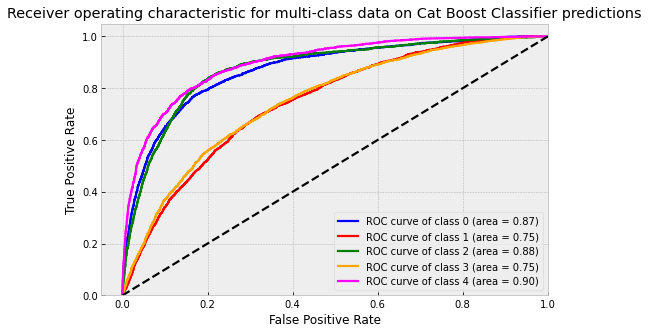

In [179]:
from itertools import cycle
fpr = dict()
tpr = dict()
roc_auc = dict()
plt.figure(figsize=(8,5))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(cat_y1_test[:,i], cat_pred_proba3[:, i],)
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green','orange','magenta'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2.2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2.2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data on Cat Boost Classifier predictions')
plt.legend(loc="lower right")
plt.show()

In [93]:
cat_model3.feature_importances_

array([ 0.        ,  0.        ,  0.52653155,  9.01225413, 90.46121432])

### Results:

In [178]:
results=pd.DataFrame(columns=['Models','Accuracy','Roc_auc_score','Avg_precision','F1_score'],)
results

Empty DataFrame
Columns: [Models, Accuracy, Roc_auc_score, Avg_precision, F1_score]
Index: []

In [179]:
results['Models']=['Decision Tree','Random Forest','Multinomial Naive Bayes','KNN','XGB','Catboost']
results

Models Accuracy Roc_auc_score Avg_precision F1_score
0            Decision Tree      NaN           NaN           NaN      NaN
1            Random Forest      NaN           NaN           NaN      NaN
2  Multinomial Naive Bayes      NaN           NaN           NaN      NaN
3                      KNN      NaN           NaN           NaN      NaN
4                      XGB      NaN           NaN           NaN      NaN
5                 Catboost      NaN           NaN           NaN      NaN

In [180]:
results['Accuracy']=[accuracy_score(tweety_test,dt_spred),accuracy_score(tweety_test,rf_spred),accuracy_score(tweety_test,\
    nb_spred),accuracy_score(tweety_test,knn_pred),accuracy_score(tweety_test,xgb_pred),accuracy_score(tweety_test,\
                                                                                                       cat_pred)]
results['Roc_auc_score']=[dt_sroc_score,rf_sroc_score,nb_sroc_score,knn_roc_score,xgb_roc_score,cat_roc_score]
results['Avg_precision']=[average_precision_score(y1_test,dt_spred.reshape(-1,1)),average_precision_score(y1_test,rf_spred.reshape(-1,1)),\
        average_precision_score(y1_test,nb_spred.reshape(-1,1)),average_precision_score(y1_test,knn_pred.reshape(-1,1)),\
    average_precision_score(y1_test,xgb_pred.reshape(-1,1)),average_precision_score(y1_test,cat_pred)]
results['F1_score']=[f1_score(tweety_test,dt_spred,average='macro'),f1_score(tweety_test,rf_spred,average='macro'),f1_score(tweety_test,nb_spred,average='macro'),\
            f1_score(tweety_test,knn_pred,average='macro'),f1_score(tweety_test,xgb_pred,average='macro'),f1_score(tweety_test,cat_pred,average='macro')]

In [181]:
results

Models  Accuracy  Roc_auc_score  Avg_precision  F1_score
0            Decision Tree  0.404519       0.630663       0.187193  0.408390
1            Random Forest  0.516926       0.823481       0.211746  0.523336
2  Multinomial Naive Bayes  0.469307       0.793574       0.199421  0.477305
3                      KNN  0.214448       0.555297       0.189209  0.201310
4                      XGB  0.536605       0.829632       0.214075  0.542512
5                 Catboost  0.573858       0.857449       0.224384  0.577548

### Final results after tuning and improving the cat boost features

In [186]:
results1=pd.DataFrame(columns=['Models','Accuracy','Roc_auc_score','Avg_precision','F1_score'])
results1

Empty DataFrame
Columns: [Models, Accuracy, Roc_auc_score, Avg_precision, F1_score]
Index: []

In [187]:
results1['Models']=['Decision Tree','Random Forest','Multinomial Naive Bayes','KNN','XGB','Catboost']
results1

Models Accuracy Roc_auc_score Avg_precision F1_score
0            Decision Tree      NaN           NaN           NaN      NaN
1            Random Forest      NaN           NaN           NaN      NaN
2  Multinomial Naive Bayes      NaN           NaN           NaN      NaN
3                      KNN      NaN           NaN           NaN      NaN
4                      XGB      NaN           NaN           NaN      NaN
5                 Catboost      NaN           NaN           NaN      NaN

In [188]:
results1['Accuracy']=[0.404519,0.516926,0.469307,0.21448,0.536605,0.5459993]
results1['Roc_auc_score']=[0.630663,0.823481,0.793574,0.555297,0.829632,0.8351]
results1['Avg_precision']=[0.187193,0.211746,0.199421,0.189209,0.214075,0.0969423]
results1['F1_score']=[0.408390,0.523336,0.477305,0.201310,0.542512,0.54866]

In [189]:
results1

Models  Accuracy  Roc_auc_score  Avg_precision  F1_score
0            Decision Tree  0.404519       0.630663       0.187193  0.408390
1            Random Forest  0.516926       0.823481       0.211746  0.523336
2  Multinomial Naive Bayes  0.469307       0.793574       0.199421  0.477305
3                      KNN  0.214480       0.555297       0.189209  0.201310
4                      XGB  0.536605       0.829632       0.214075  0.542512
5                 Catboost  0.545999       0.835100       0.096942  0.548660

- As the dataset is imbalanced with multi-class classification. It is good to consider Roc-auc and F1 score as the evaluation metric than accuracy. Accuracy is not a good metric when dealing with imbalanced dataset.
- The results from different models are displayed above, from which Catboost, Random Forest and XGB boost are comparitively best to be considered for making predictions on this dataset.
- I found Cat Boost and XGB Boost are performing good for this dataset in classifying the Sentiment of the twitter users with some other independent variables.
- Eventhough there are models which are getting closer to Catboost I still consider CatBoost to be the best algorithm/model for making predictions and to be considered as final model chosen for solving this problem.
- I have chosen CatBoost as best model because when you see the roc_auc graph the differences between the models can be easily seen that CatBoost has shown better results on all the classes whereas other models have only improved only few classes leaving behind the other classes below the acceptable mark.

### Case studies

In [130]:
cat_df1.head()

UserName  ScreenName                    Location    TweetAt  \
0      3799       48751                      London 2020-03-16   
1      3800       48752                          UK 2020-03-16   
2      3801       48753                   Vagabonds 2020-03-16   
3      3802       48754  Not disclosed/Not provided 2020-03-16   
4      3803       48755  Not disclosed/Not provided 2020-03-16   

            Sentiment  Year  Month  Day  length  \
0             Neutral  2020      3   16     111   
1            Positive  2020      3   16     237   
2            Positive  2020      3   16     131   
3            Positive  2020      3   16     306   
4  Extremely Negative  2020      3   16     310   

                                       cleaned_tweet  
0  MeNyrbie PhilGahan Chrisitv httpstcoiFz9FAn2Pa...  
1  advice Talk neighbours family exchange phone n...  
2  Coronavirus Australia Woolworths give elderly ...  
3  food stock one empty PLEASE dont panic ENOUGH ...  
4  ready go supermarket COVID19 outbreak Im paran...

In [132]:
#1. Finding the tweets which are positive from Canada location as they are highest from the sample findings
locCnSenP=cat_df1[(cat_df1['Location']=='Canada')&(cat_df1['Sentiment']=='Positive')]
locCnSenP

UserName  ScreenName Location    TweetAt Sentiment  Year  Month  Day  \
37         3836       48788   Canada 2020-03-16  Positive  2020      3   16   
1282       5081       50033   Canada 2020-03-17  Positive  2020      3   17   
1480       5279       50231   Canada 2020-03-17  Positive  2020      3   17   
3990       7789       52741   Canada 2020-03-18  Positive  2020      3   18   
7733      11532       56484   Canada 2020-03-19  Positive  2020      3   19   
7851      11650       56602   Canada 2020-03-19  Positive  2020      3   19   
8907      12706       57658   Canada 2020-03-20  Positive  2020      3   20   
9679      13478       58430   Canada 2020-03-20  Positive  2020      3   20   
9782      13581       58533   Canada 2020-03-20  Positive  2020      3   20   
10046     13845       58797   Canada 2020-03-20  Positive  2020      3   20   
10378     14177       59129   Canada 2020-03-20  Positive  2020      3   20   
11201     15000       59952   Canada 2020-03-20  Positive  2020      3   20   
11731     15530       60482   Canada 2020-03-20  Positive  2020      3   20   
12120     15919       60871   Canada 2020-03-21  Positive  2020      3   21   
12790     16589       61541   Canada 2020-03-21  Positive  2020      3   21   
14470     18269       63221   Canada 2020-03-21  Positive  2020      3   21   
16291     20090       65042   Canada 2020-03-22  Positive  2020      3   22   
16393     20192       65144   Canada 2020-03-22  Positive  2020      3   22   
16986     20785       65737   Canada 2020-03-23  Positive  2020      3   23   
19551     23350       68302   Canada 2020-03-24  Positive  2020      3   24   
20035     23834       68786   Canada 2020-03-24  Positive  2020      3   24   
20157     23956       68908   Canada 2020-03-24  Positive  2020      3   24   
20260     24059       69011   Canada 2020-03-24  Positive  2020      3   24   
20672     24471       69423   Canada 2020-03-25  Positive  2020      3   25   
21820     25619       70571   Canada 2020-03-25  Positive  2020      3   25   
22879     26678       71630   Canada 2020-03-25  Positive  2020      3   25   
23117     26916       71868   Canada 2020-03-25  Positive  2020      3   25   
23613     27412       72364   Canada 2020-03-26  Positive  2020      3   26   
24828     28627       73579   Canada 2020-03-27  Positive  2020      3   27   
25795     29594       74546   Canada 2020-01-04  Positive  2020      1    4   
26885     30684       75636   Canada 2020-02-04  Positive  2020      2    4   
28581     32380       77332   Canada 2020-04-04  Positive  2020      4    4   
28582     32381       77333   Canada 2020-04-04  Positive  2020      4    4   
29788     33587       78539   Canada 2020-05-04  Positive  2020      5    4   
30799     34598       79550   Canada 2020-06-04  Positive  2020      6    4   
31842     35641       80593   Canada 2020-07-04  Positive  2020      7    4   
32196     35995       80947   Canada 2020-07-04  Positive  2020      7    4   
33900     37699       82651   Canada 2020-08-04  Positive  2020      8    4   
34389     38188       83140   Canada 2020-08-04  Positive  2020      8    4   
34517     38316       83268   Canada 2020-08-04  Positive  2020      8    4   
34698     38497       83449   Canada 2020-08-04  Positive  2020      8    4   
34886     38685       83637   Canada 2020-08-04  Positive  2020      8    4   
35265     39064       84016   Canada 2020-09-04  Positive  2020      9    4   
35522     39321       84273   Canada 2020-09-04  Positive  2020      9    4   
35970     39769       84721   Canada 2020-09-04  Positive  2020      9    4   
36446     40245       85197   Canada 2020-09-04  Positive  2020      9    4   
36669     40468       85420   Canada 2020-09-04  Positive  2020      9    4   
38853     42652       87604   Canada 2020-12-04  Positive  2020     12    4   
38971     42770       87722   Canada 2020-12-04  Positive  2020     12    4   
40302     44101       89053   Canada 2020-04-13  Positive

In [133]:
locCnSenP.shape

(51, 10)

In [134]:
locCnSenP['cleaned_tweet'].tolist()[5:10]

['MelanieMoore6 Youre welcome Melanie Keep eye httpstcoz4joiwVLi3 rotating available selections also check httpstcobTXzPMqLPb updates supporting customers difficult',
 'Gym Closed Instead driving go long walk grocery store Great workout legs butt also work back arms shoulders carrying grocery bags fitness SocialDistancing Covid19',
 'grocery store amp pharmacy employees essential workers get paid like Many minimum wage workers Ontario government subsidizing substantial temporary raise workers Ontario coronavirus fordnation',
 'YoniFreedhoff mattgurney need Teachersunions easily teach virtuallypost lessons onlineeven give feedback students know work home paid Time step leave grocery store',
 'business international markets webinar show navigate today exporting challenges rising commodity prices due COVID 19 virus WEBINAR Managing coronavirus impact global supply chains']

<AxesSubplot:xlabel='length', ylabel='Density'>

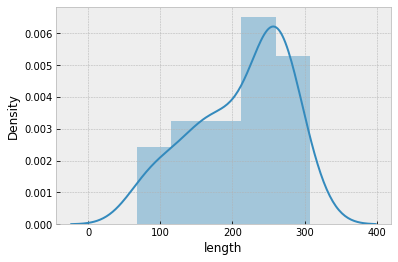

In [135]:
sns.distplot(locCnSenP['length'])

- There are a total of 51 rows with Location Canada and with Positive Sentiment.
- Some of 5 positive sentiment tweets can be seen above.

In [136]:
#2. Find the tweets where the length of tweets are greater than 300 and Sentiment is negative from the month of March
case2=cat_df1[(cat_df1['length']>300)&(cat_df1['Sentiment']=='Negative')&(cat_df1['Month']==3)]
case2

UserName  ScreenName                        Location    TweetAt  \
204        4003       48955                        Malaysia 2020-03-16   
298        4097       49049                Washington, D.C. 2020-03-16   
578        4377       49329                    New York, NY 2020-03-16   
601        4400       49352                          London 2020-03-16   
671        4470       49422  Joburg and wherever life takes 2020-03-17   
...         ...         ...                             ...        ...   
27428     31227       76179                  Abuja, Nigeria 2020-03-04   
27500     31299       76251                    Savannah, GA 2020-03-04   
27544     31343       76295      Not disclosed/Not provided 2020-03-04   
27726     31525       76477                ????, ?????????? 2020-03-04   
27855     31654       76606                      Vienna, VA 2020-03-04   

      Sentiment  Year  Month  Day  length  \
204    Negative  2020      3   16     303   
298    Negative  2020      3   16     301   
578    Negative  2020      3   16     307   
601    Negative  2020      3   16     312   
671    Negative  2020      3   17     304   
...         ...   ...    ...  ...     ...   
27428  Negative  2020      3    4     301   
27500  Negative  2020      3    4     308   
27544  Negative  2020      3    4     312   
27726  Negative  2020      3    4     304   
27855  Negative  2020      3    4     301   

                                           cleaned_tweet  
204    Panic buying Malaysia escalated today followin...  
298    Anthony Fauci said people may perceive new cor...  
578    Since January YouGov gathering data different ...  
601    covid19 gonethere humanity left us Im helping ...  
671    Untransformed SA Supermarket Chain Retailers c...  
...                                                  ...  
27428  Weakening demand falling oil prices due global...  
27500  Governor Kemps statewide shelterinplace order ...  
27544  1986only seasonal roadmap close 2020 oilprice ...  
27726  Due coronavirus many farmers suffering many pr...  
27855  Zakatify charities respond Coronavirus Halftab...  

[244 rows x 10 columns]

In [137]:
case2['cleaned_tweet'].tolist()[34:39]

['Russia could limit food exports Coronavirus caused shortage Also report Ukraine President told government limit food exports according list 2010 wheat prices exploded part due complete embargo imposed Russia Ukraine httpstcod4IefiDEma',
 'addition multiple waves CoronaVirus outbreak next 18 months requiring severe lockdown suppression Federal Government assumptions Supply chain impacts result significant shortages government private sector individual consumers httpstcolT26lllNC4 httpstcoq5LeNkznFk',
 'bneEditorsPicks Kazakh tenge plunges record low world oil prices flounder Kaz tenge sank 66 v USD httpstcoMbXE23gNx6 bne business coronavirus Kazakhstan FX see sample httpstcoqdLjDVOmX2 sign httpstcofx29M7iuZu httpstco3VX7iXAE3l',
 'video English subtitled Turkeys President Erdogan talking benefits Coronavirus pandemic amp country would take advantage production demand low cost finances oil prices urged patience amp prayer overcome crisis via abdbozkurt BREAKING httpstco45KNtwEeaE',
 'v

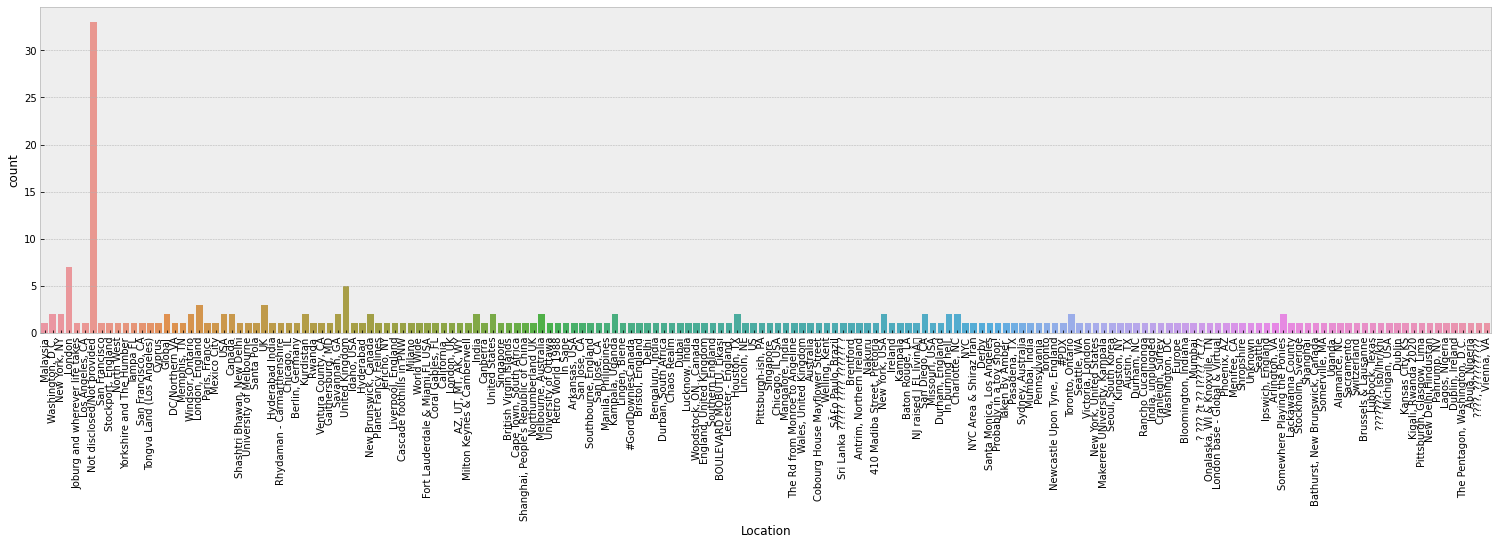

In [150]:
plt.figure(figsize=(26,6))
sns.countplot(x='Location',data=case2);
plt.xticks(rotation='vertical');

- There are 244 such rows matching the crieria mentioned.
- I have also display some of the negative tweets in the data where the tweet is greater than 300 and from the month of March. 
- 	It can also be observed from the above plot that the negative tweets are more from London location then United Kingdom and their states followed by USA, Canada, Germany …etc

In [158]:
#3. The number of tweets from last month and last day of the year 2020 and the length of the tweet be >300
case3=cat_df1[(cat_df1['Month']==12)&(cat_df1['Day']>1)&(cat_df1['length']>300)]
case3

UserName  ScreenName                     Location    TweetAt  \
38679     42478       87430   Not disclosed/Not provided 2020-12-04   
38683     42482       87434   Not disclosed/Not provided 2020-12-04   
38696     42495       87447                   Inglis, FL 2020-12-04   
38813     42612       87564                 New York, NY 2020-12-04   
38814     42613       87565                 New York, NY 2020-12-04   
38815     42614       87566                 New York, NY 2020-12-04   
38817     42616       87568                 New York, NY 2020-12-04   
38844     42643       87595               Gujarat, India 2020-12-04   
38877     42676       87628                       Cyprus 2020-12-04   
38890     42689       87641   Not disclosed/Not provided 2020-12-04   
38934     42733       87685             Central Coast CA 2020-12-04   
38995     42794       87746   Not disclosed/Not provided 2020-12-04   
39004     42803       87755   People's Republic of China 2020-12-04   
39009     42808       87760    facebook.com/FoodBankCENC 2020-12-04   
39038     42837       87789   Not disclosed/Not provided 2020-12-04   
39042     42841       87793       Friedberg, Deutschland 2020-12-04   
39064     42863       87815                Kyiv, Ukraine 2020-12-04   
39071     42870       87822          Warrington, England 2020-12-04   
39109     42908       87860                   Boston, MA 2020-12-04   
39153     42952       87904                Lazio, Italia 2020-12-04   
39200     42999       87951             Dodoma, Tanzania 2020-12-04   
39220     43019       87971      England, United Kingdom 2020-12-04   
39243     43042       87994                United States 2020-12-04   
39245     43044       87996   People's Republic of China 2020-12-04   
39248     43047       87999                United States 2020-12-04   
39254     43053       88005   Not disclosed/Not provided 2020-12-04   
39297     43096       88048                      Chicago 2020-12-04   
39307     43106       88058             Oconto Falls, WI 2020-12-04   
39320     43119       88071                        India 2020-12-04   
39352     43151       88103               Fort Worth, TX 2020-12-04   
39392     43191       88143  Bowie, MD & Springfield, VA 2020-12-04   
39424     43223       88175             Japan and France 2020-12-04   
39436     43235       88187                       Mumbai 2020-12-04   
39437     43236       88188                       Mumbai 2020-12-04   
39438     43237       88189                     Florida  2020-12-04   

                Sentiment  Year  Month  Day  length  \
38679  Extremely Negative  2020     12    4     306   
38683            Negative  2020     12    4     318   
38696  Extremely Negative  2020     12    4     310   
38813  Extremely Positive  2020     12    4     303   
38814  Extremely Positive  2020     12    4     304   
38815  Extremely Positive  2020     12    4     302   
38817  Extremely Positive  2020     12    4     311   
38844  Extremely Positive  2020     12    4     311   
38877             Neutral  2020     12    4     303   
38890  Extremely Positive  2020     12    4     302   
38934            Negative  2020     12    4     323   
38995             Neutral  2020     12    4     308   
39004  Extremely Positive  2020     12    4     305   
39009            Negative  2020     12    4     306   
39038             Neutral  2020     12    4     304   
39042            Positive  2020     12    4     304   
39064            Positive  2020     12    4     315   
39071  Extremely Positive  2020     12    4     306   
39109            Positive  2020     12    4     318   
39153  Extremely Positive  2020     12    4     304   
39200  Extremely Positive  2020     12    4     306   
39220  Extremely Positive  2020     12    4     303   
39243            Positive  2020     12    4     307   
39245            Positive  2020     12    4     309   
39248            Positive  2020     12    4     305   
39254            Neg

In [159]:
case3.shape

(35, 10)

In [160]:
case3['Sentiment'].value_counts()

Extremely Positive    14
Positive               9
Negative               5
Neutral                4
Extremely Negative     3
Name: Sentiment, dtype: int64

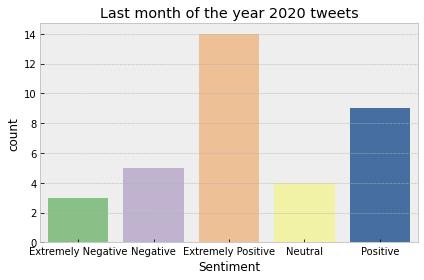

In [166]:
sns.countplot(case3['Sentiment'],palette='Accent');
plt.title('Last month of the year 2020 tweets');
plt.tight_layout()
plt.show();

- It can be seen from there are 35 rows of data which are tweeted on last month of the year 2020 ie.., in December.
- There are more extremely positive tweets in the last month than any other.
- It can also be observed that the negative tweets have been decreased a lot and positive tweets have been raised.
- It can be observed from above plot that users are good after receiving some year end benefits and so on.

In [174]:
#4. Find the tweets which are from Hyderabad or India as the Location 
case4=cat_df1[(cat_df1['Location']=='India')|(cat_df1['Location']=='Hyderabad, India')]
case4

UserName  ScreenName Location    TweetAt           Sentiment  Year  \
185        3984       48936    India 2020-03-16  Extremely Positive  2020   
436        4235       49187    India 2020-03-16            Positive  2020   
782        4581       49533    India 2020-03-17             Neutral  2020   
848        4647       49599    India 2020-03-17             Neutral  2020   
1371       5170       50122    India 2020-03-17             Neutral  2020   
...         ...         ...      ...        ...                 ...   ...   
40731     44530       89482    India 2020-04-13             Neutral  2020   
40880     44679       89631    India 2020-04-14            Positive  2020   
40881     44680       89632    India 2020-04-14  Extremely Positive  2020   
40932     44731       89683    India 2020-04-14            Positive  2020   
41141     44940       89892    India 2020-04-14             Neutral  2020   

       Month  Day  length                                      cleaned_tweet  
185        3   16     299  Stock market corrections Currency rate correct...  
436        3   16     101  People Avoiding Online Shopping Portals China ...  
782        3   17     162  iamuditt PiyushGoyal RailMinIndia Steep rise p...  
848        3   17     224  Lav Aggarwal Joint Secretary Union Health Mini...  
1371       3   17     166  Coronavirus spooks commodity market Heres pric...  
...      ...  ...     ...                                                ...  
40731      4   13     317  Buy Home Cleaning Starting Rs5 Valid till Stoc...  
40880      4   14     113  property prices increase post 19 want sell lan...  
40881      4   14     187  following questions Planning buy independant v...  
40932      4   14     173  PM Modi says Daily wage earners top priority 1...  
41141      4   14     218  Coronavirus narendramodi ATCard StayHome Lockd...  

[299 rows x 10 columns]

In [177]:
case4.shape

(299, 10)

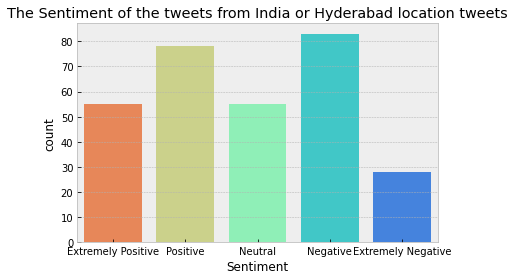

In [179]:
sns.countplot(case4['Sentiment'],palette='rainbow_r');
plt.title('The Sentiment of the tweets from India or Hyderabad location tweets');
plt.tight_layout()
plt.show();

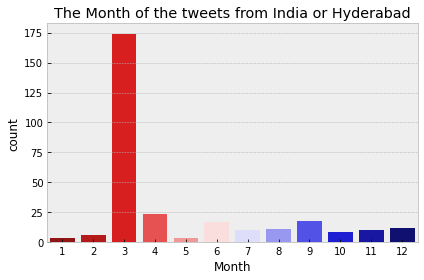

In [183]:
sns.countplot(case4['Month'],palette='seismic_r');
plt.title('The Month of the tweets from India or Hyderabad');
plt.tight_layout()
plt.show();

- After analyzing the tweets which come from India or Hyderabad location, it can be seen that there are more negative tweets than the positive sentiment tweets.
- There are a total of 299 rows which are from India or Hyderabad location from which India(country) location tweet are greater than one city Hyderabad tweets.😂
- There are high number of tweets in the month of March than any other month in a year.

## 😊🥳🎭🕊